### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN"],inplace=True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
#Change datatypes ASK_AMT
application_df['ASK_AMT'] = application_df['ASK_AMT'].astype(str)
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [6]:
# Look at APPLICATION_TYPE value counts for binning
ap= application_df.APPLICATION_TYPE.value_counts()

<AxesSubplot:ylabel='Density'>

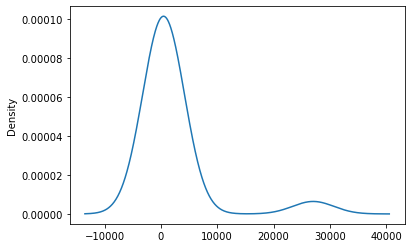

In [7]:
# Visualize the value counts of APPLICATION_TYPE
ap.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(ap[ap < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
clas = application_df["CLASSIFICATION"].value_counts()
clas

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

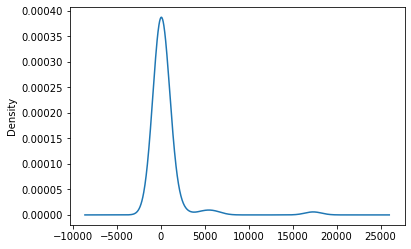

In [10]:
# Visualize the value counts of CLASSIFICATION
clas.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(clas[clas < 300].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [12]:
# Look at NAME value counts for binning
application_df.NAME.value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

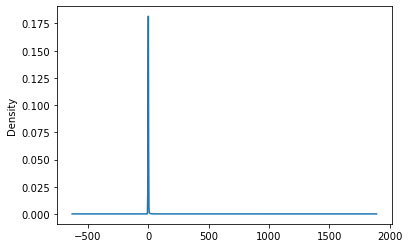

In [13]:
# Visualize the value counts of NAME
name = application_df.NAME.value_counts()
name.plot.density()

In [14]:
# Determine which values to replace if counts are less than ...?
replace_name = list(name[name < 50].index)

# Replace in dataframe
for app in replace_name:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [15]:
# Look at ASK_AMT value counts for binning
application_df.ASK_AMT.value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

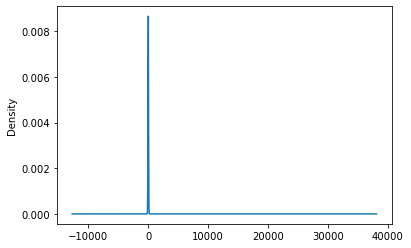

In [16]:
# Visualize the value counts of ASK_AMT
askamt = application_df.ASK_AMT.value_counts()
askamt.plot.density()

In [17]:
# Determine which values to replace if counts are less than ...?
replace_askamt = list(askamt[askamt < 3].index)

# Replace in dataframe
for app in replace_askamt:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()


5000     25398
Other     8889
15583        3
6725         3
10478        3
63981        3
Name: ASK_AMT, dtype: int64

In [18]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_DEMOLAY INTERNATIONAL,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_10478,ASK_AMT_15583,ASK_AMT_5000,ASK_AMT_63981,ASK_AMT_6725,ASK_AMT_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/Users/omaralmashhadani/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_10478,ASK_AMT_15583,ASK_AMT_5000,ASK_AMT_63981,ASK_AMT_6725,ASK_AMT_Other
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/omaralmashhadani/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  200
hidden_nodes_layer2 = 90
#hidden_nodes_layer3 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               20400     
_________________________________________________________________
dense_1 (Dense)              (None, 90)                18090     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 91        
Total params: 38,581
Trainable params: 38,581
Non-trainable params: 0
_________________________________________________________________


2022-07-07 13:03:37.899864: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-07 13:03:37.900595: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [24]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [25]:
# Compile the model
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/500
  832/25724 [..............................] - ETA: 21s - loss: 0.5971 - accuracy: 0.6779
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1664/25724 [>.............................] - ETA: 11s - loss: 0.5628 - accuracy: 0.7169
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2944/25724 [==>...........................] - ETA: 7s - loss: 0.5423 - accuracy: 0.7306
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3808/25724 [===>..........................] - ETA: 6s - loss: 0.5298 - accuracy: 0.7384
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4832/25724 [====>.........................] - ETA: 5s - loss: 0.5237 - accuracy: 0.7419
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6048/25724 [======>.......................] - ETA: 4s - loss: 0.5167 - accuracy: 0.7459
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6944/25724 [=======>......................] - ETA: 4s - loss: 0.5173 - accuracy: 0.746

 4832/25724 [====>.........................] - ETA: 2s - loss: 0.4772 - accuracy: 0.7678
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5856/25724 [=====>........................] - ETA: 2s - loss: 0.4766 - accuracy: 0.7669
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6784/25724 [======>.......................] - ETA: 2s - loss: 0.4771 - accuracy: 0.7656
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7776/25724 [========>.....................] - ETA: 1s - loss: 0.4741 - accuracy: 0.7667
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8800/25724 [=========>....................] - ETA: 1s - loss: 0.4713 - accuracy: 0.7683
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9728/25724 [==========>...................] - ETA: 1s - loss: 0.4707 - accuracy: 0.7692
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10656/25724 [===========>..................] - ETA: 1s - loss: 0.4696 - accuracy: 0.7702
Epoch 00003: saving model to checkp

 9344/25724 [=========>....................] - ETA: 1s - loss: 0.4655 - accuracy: 0.7722
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10336/25724 [===========>..................] - ETA: 1s - loss: 0.4664 - accuracy: 0.7716
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11328/25724 [============>.................] - ETA: 1s - loss: 0.4654 - accuracy: 0.7730
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12288/25724 [=============>................] - ETA: 1s - loss: 0.4665 - accuracy: 0.7723
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13312/25724 [==============>...............] - ETA: 1s - loss: 0.4689 - accuracy: 0.7701
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14336/25724 [===============>..............] - ETA: 1s - loss: 0.4689 - accuracy: 0.7700
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15360/25724 [================>.............] - ETA: 1s - loss: 0.4686 - accuracy: 0.7693
Epoch 00005: saving model to checkp

14240/25724 [===============>..............] - ETA: 1s - loss: 0.4725 - accuracy: 0.7651
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15264/25724 [================>.............] - ETA: 1s - loss: 0.4703 - accuracy: 0.7667
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.4715 - accuracy: 0.7662
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17568/25724 [===================>..........] - ETA: 0s - loss: 0.4729 - accuracy: 0.7655
Epoch 00007: saving model to checkpoints/weights.07.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.4727 - accuracy: 0.7659
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19232/25724 [=====================>........] - ETA: 0s - loss: 0.4736 - accuracy: 0.7654
Epoch 00007: saving model to checkpoints/weights.07.hdf5
20704/25724 [=======================>......] - ETA: 0s - loss: 0.4738 - accuracy: 0.7657
Epoch 00007: saving model to checkp

19168/25724 [=====================>........] - ETA: 0s - loss: 0.4681 - accuracy: 0.7701
Epoch 00009: saving model to checkpoints/weights.09.hdf5
20000/25724 [======================>.......] - ETA: 0s - loss: 0.4697 - accuracy: 0.7690
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 0.4689 - accuracy: 0.7696
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22432/25724 [=========================>....] - ETA: 0s - loss: 0.4694 - accuracy: 0.7692
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.4685 - accuracy: 0.7706
Epoch 00009: saving model to checkpoints/weights.09.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.4689 - accuracy: 0.7706
Epoch 00009: saving model to checkpoints/weights.09.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.4683 - accuracy: 0.7709
Epoch 00009: saving model to checkp

24000/25724 [==========================>...] - ETA: 0s - loss: 0.4678 - accuracy: 0.7712
Epoch 00011: saving model to checkpoints/weights.11.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.4666 - accuracy: 0.7720
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 3s 111us/sample - loss: 0.4671 - accuracy: 0.7717
Epoch 12/500
  544/25724 [..............................] - ETA: 2s - loss: 0.4518 - accuracy: 0.7739
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1536/25724 [>.............................] - ETA: 2s - loss: 0.4567 - accuracy: 0.7715
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2560/25724 [=>............................] - ETA: 2s - loss: 0.4525 - accuracy: 0.7785
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3488/25724 [===>..........................] - ETA: 2s - loss: 0.4514 - accuracy: 0.7792
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4256/25724 [=

 2368/25724 [=>............................] - ETA: 2s - loss: 0.4462 - accuracy: 0.7943
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3392/25724 [==>...........................] - ETA: 2s - loss: 0.4517 - accuracy: 0.7889
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4384/25724 [====>.........................] - ETA: 2s - loss: 0.4569 - accuracy: 0.7831
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5216/25724 [=====>........................] - ETA: 2s - loss: 0.4602 - accuracy: 0.7805
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6112/25724 [======>.......................] - ETA: 2s - loss: 0.4606 - accuracy: 0.7808
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7072/25724 [=======>......................] - ETA: 2s - loss: 0.4613 - accuracy: 0.7810
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8096/25724 [========>.....................] - ETA: 1s - loss: 0.4628 - accuracy: 0.7795
Epoch 00014: saving model to checkp

 7232/25724 [=======>......................] - ETA: 2s - loss: 0.4674 - accuracy: 0.7673
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8096/25724 [========>.....................] - ETA: 2s - loss: 0.4648 - accuracy: 0.7688
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9088/25724 [=========>....................] - ETA: 1s - loss: 0.4632 - accuracy: 0.7715
Epoch 00016: saving model to checkpoints/weights.16.hdf5
10112/25724 [==========>...................] - ETA: 1s - loss: 0.4637 - accuracy: 0.7711
Epoch 00016: saving model to checkpoints/weights.16.hdf5
11104/25724 [===========>..................] - ETA: 1s - loss: 0.4645 - accuracy: 0.7713
Epoch 00016: saving model to checkpoints/weights.16.hdf5
12064/25724 [=============>................] - ETA: 1s - loss: 0.4643 - accuracy: 0.7717
Epoch 00016: saving model to checkpoints/weights.16.hdf5
13056/25724 [==============>...............] - ETA: 1s - loss: 0.4638 - accuracy: 0.7735
Epoch 00016: saving model to checkp

11904/25724 [============>.................] - ETA: 1s - loss: 0.4610 - accuracy: 0.7749
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12800/25724 [=============>................] - ETA: 1s - loss: 0.4605 - accuracy: 0.7745
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13728/25724 [===============>..............] - ETA: 1s - loss: 0.4612 - accuracy: 0.7739
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15200/25724 [================>.............] - ETA: 1s - loss: 0.4619 - accuracy: 0.7728
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16032/25724 [=================>............] - ETA: 1s - loss: 0.4614 - accuracy: 0.7731
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16928/25724 [==================>...........] - ETA: 0s - loss: 0.4623 - accuracy: 0.7729
Epoch 00018: saving model to checkpoints/weights.18.hdf5
17952/25724 [===================>..........] - ETA: 0s - loss: 0.4617 - accuracy: 0.7732
Epoch 00018: saving model to checkp

16512/25724 [==================>...........] - ETA: 0s - loss: 0.4631 - accuracy: 0.7712
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17568/25724 [===================>..........] - ETA: 0s - loss: 0.4620 - accuracy: 0.7723
Epoch 00020: saving model to checkpoints/weights.20.hdf5
18592/25724 [====================>.........] - ETA: 0s - loss: 0.4635 - accuracy: 0.7718
Epoch 00020: saving model to checkpoints/weights.20.hdf5
20064/25724 [======================>.......] - ETA: 0s - loss: 0.4638 - accuracy: 0.7717
Epoch 00020: saving model to checkpoints/weights.20.hdf5
21056/25724 [=======================>......] - ETA: 0s - loss: 0.4634 - accuracy: 0.7715
Epoch 00020: saving model to checkpoints/weights.20.hdf5
22080/25724 [========================>.....] - ETA: 0s - loss: 0.4626 - accuracy: 0.7726
Epoch 00020: saving model to checkpoints/weights.20.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.4632 - accuracy: 0.7727
Epoch 00020: saving model to checkp

21472/25724 [========================>.....] - ETA: 0s - loss: 0.4607 - accuracy: 0.7753
Epoch 00022: saving model to checkpoints/weights.22.hdf5
22496/25724 [=========================>....] - ETA: 0s - loss: 0.4623 - accuracy: 0.7742
Epoch 00022: saving model to checkpoints/weights.22.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.4627 - accuracy: 0.7739
Epoch 00022: saving model to checkpoints/weights.22.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.4624 - accuracy: 0.7737
Epoch 00022: saving model to checkpoints/weights.22.hdf5
25724/25724 [==============================] - 3s 108us/sample - loss: 0.4624 - accuracy: 0.7742
Epoch 23/500
   32/25724 [..............................] - ETA: 3s - loss: 0.4693 - accuracy: 0.8125
Epoch 00023: saving model to checkpoints/weights.23.hdf5
  992/25724 [>.............................] - ETA: 2s - loss: 0.4714 - accuracy: 0.7641
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 2016/25724 [=

25216/25724 [============================>.] - ETA: 0s - loss: 0.4603 - accuracy: 0.7747
Epoch 00024: saving model to checkpoints/weights.24.hdf5
25724/25724 [==============================] - 5s 207us/sample - loss: 0.4612 - accuracy: 0.7745
Epoch 25/500
  512/25724 [..............................] - ETA: 2s - loss: 0.4384 - accuracy: 0.7949
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1536/25724 [>.............................] - ETA: 2s - loss: 0.4246 - accuracy: 0.8040
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2976/25724 [==>...........................] - ETA: 2s - loss: 0.4411 - accuracy: 0.7960
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 3936/25724 [===>..........................] - ETA: 2s - loss: 0.4468 - accuracy: 0.7896
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 4928/25724 [====>.........................] - ETA: 2s - loss: 0.4544 - accuracy: 0.7817
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5920/25724 [=

 3360/25724 [==>...........................] - ETA: 2s - loss: 0.4692 - accuracy: 0.7670
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 4832/25724 [====>.........................] - ETA: 2s - loss: 0.4686 - accuracy: 0.7682
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5664/25724 [=====>........................] - ETA: 2s - loss: 0.4664 - accuracy: 0.7691
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 6560/25724 [======>.......................] - ETA: 2s - loss: 0.4663 - accuracy: 0.7701
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 7872/25724 [========>.....................] - ETA: 2s - loss: 0.4628 - accuracy: 0.7721
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8864/25724 [=========>....................] - ETA: 2s - loss: 0.4617 - accuracy: 0.7729
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 9696/25724 [==========>...................] - ETA: 2s - loss: 0.4606 - accuracy: 0.7742
Epoch 00027: saving model to checkp

 8608/25724 [=========>....................] - ETA: 2s - loss: 0.4583 - accuracy: 0.7763
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 9504/25724 [==========>...................] - ETA: 1s - loss: 0.4576 - accuracy: 0.7762
Epoch 00029: saving model to checkpoints/weights.29.hdf5
10368/25724 [===========>..................] - ETA: 1s - loss: 0.4601 - accuracy: 0.7752
Epoch 00029: saving model to checkpoints/weights.29.hdf5
11744/25724 [============>.................] - ETA: 1s - loss: 0.4600 - accuracy: 0.7752
Epoch 00029: saving model to checkpoints/weights.29.hdf5
12672/25724 [=============>................] - ETA: 1s - loss: 0.4613 - accuracy: 0.7740
Epoch 00029: saving model to checkpoints/weights.29.hdf5
13536/25724 [==============>...............] - ETA: 1s - loss: 0.4621 - accuracy: 0.7736
Epoch 00029: saving model to checkpoints/weights.29.hdf5
14432/25724 [===============>..............] - ETA: 1s - loss: 0.4625 - accuracy: 0.7739
Epoch 00029: saving model to checkp

13088/25724 [==============>...............] - ETA: 1s - loss: 0.4483 - accuracy: 0.7819
Epoch 00031: saving model to checkpoints/weights.31.hdf5
14080/25724 [===============>..............] - ETA: 1s - loss: 0.4490 - accuracy: 0.7807
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15136/25724 [================>.............] - ETA: 1s - loss: 0.4506 - accuracy: 0.7796
Epoch 00031: saving model to checkpoints/weights.31.hdf5
16544/25724 [==================>...........] - ETA: 0s - loss: 0.4545 - accuracy: 0.7777
Epoch 00031: saving model to checkpoints/weights.31.hdf5
17504/25724 [===================>..........] - ETA: 0s - loss: 0.4559 - accuracy: 0.7769
Epoch 00031: saving model to checkpoints/weights.31.hdf5
18528/25724 [====================>.........] - ETA: 0s - loss: 0.4554 - accuracy: 0.7776
Epoch 00031: saving model to checkpoints/weights.31.hdf5
19520/25724 [=====================>........] - ETA: 0s - loss: 0.4553 - accuracy: 0.7770
Epoch 00031: saving model to checkp

17952/25724 [===================>..........] - ETA: 0s - loss: 0.4612 - accuracy: 0.7748
Epoch 00033: saving model to checkpoints/weights.33.hdf5
18976/25724 [=====================>........] - ETA: 0s - loss: 0.4612 - accuracy: 0.7754
Epoch 00033: saving model to checkpoints/weights.33.hdf5
20000/25724 [======================>.......] - ETA: 0s - loss: 0.4608 - accuracy: 0.7754
Epoch 00033: saving model to checkpoints/weights.33.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.4598 - accuracy: 0.7755
Epoch 00033: saving model to checkpoints/weights.33.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.4595 - accuracy: 0.7761
Epoch 00033: saving model to checkpoints/weights.33.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.4591 - accuracy: 0.7755
Epoch 00033: saving model to checkpoints/weights.33.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4585 - accuracy: 0.7758
Epoch 00033: saving model to checkp

23040/25724 [=========================>....] - ETA: 0s - loss: 0.4570 - accuracy: 0.7767
Epoch 00035: saving model to checkpoints/weights.35.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4580 - accuracy: 0.7759
Epoch 00035: saving model to checkpoints/weights.35.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.4581 - accuracy: 0.7764
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 3s 114us/sample - loss: 0.4584 - accuracy: 0.7759
Epoch 36/500
  544/25724 [..............................] - ETA: 2s - loss: 0.4414 - accuracy: 0.7923
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1536/25724 [>.............................] - ETA: 2s - loss: 0.4468 - accuracy: 0.7858
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2560/25724 [=>............................] - ETA: 2s - loss: 0.4497 - accuracy: 0.7820
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 3584/25724 [=

 1056/25724 [>.............................] - ETA: 2s - loss: 0.4519 - accuracy: 0.7746
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 2400/25724 [=>............................] - ETA: 2s - loss: 0.4594 - accuracy: 0.7742
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3392/25724 [==>...........................] - ETA: 2s - loss: 0.4499 - accuracy: 0.7795
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 4384/25724 [====>.........................] - ETA: 2s - loss: 0.4522 - accuracy: 0.7801
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 5408/25724 [=====>........................] - ETA: 2s - loss: 0.4568 - accuracy: 0.7774
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6464/25724 [======>.......................] - ETA: 2s - loss: 0.4558 - accuracy: 0.7771
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 7392/25724 [=======>......................] - ETA: 2s - loss: 0.4536 - accuracy: 0.7796
Epoch 00038: saving model to checkp

 5984/25724 [=====>........................] - ETA: 2s - loss: 0.4525 - accuracy: 0.7759
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 6976/25724 [=======>......................] - ETA: 1s - loss: 0.4544 - accuracy: 0.7738
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 8256/25724 [========>.....................] - ETA: 1s - loss: 0.4567 - accuracy: 0.7728
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 9056/25724 [=========>....................] - ETA: 1s - loss: 0.4570 - accuracy: 0.7741
Epoch 00040: saving model to checkpoints/weights.40.hdf5
10336/25724 [===========>..................] - ETA: 1s - loss: 0.4601 - accuracy: 0.7712
Epoch 00040: saving model to checkpoints/weights.40.hdf5
11104/25724 [===========>..................] - ETA: 1s - loss: 0.4607 - accuracy: 0.7707
Epoch 00040: saving model to checkpoints/weights.40.hdf5
12352/25724 [=============>................] - ETA: 1s - loss: 0.4591 - accuracy: 0.7726
Epoch 00040: saving model to checkp

10848/25724 [===========>..................] - ETA: 1s - loss: 0.4548 - accuracy: 0.7766
Epoch 00042: saving model to checkpoints/weights.42.hdf5
11840/25724 [============>.................] - ETA: 1s - loss: 0.4552 - accuracy: 0.7752
Epoch 00042: saving model to checkpoints/weights.42.hdf5
12800/25724 [=============>................] - ETA: 1s - loss: 0.4572 - accuracy: 0.7733
Epoch 00042: saving model to checkpoints/weights.42.hdf5
13696/25724 [==============>...............] - ETA: 1s - loss: 0.4580 - accuracy: 0.7729
Epoch 00042: saving model to checkpoints/weights.42.hdf5
15136/25724 [================>.............] - ETA: 1s - loss: 0.4600 - accuracy: 0.7721
Epoch 00042: saving model to checkpoints/weights.42.hdf5
16096/25724 [=================>............] - ETA: 1s - loss: 0.4595 - accuracy: 0.7722
Epoch 00042: saving model to checkpoints/weights.42.hdf5
17088/25724 [==================>...........] - ETA: 0s - loss: 0.4597 - accuracy: 0.7728
Epoch 00042: saving model to checkp

15872/25724 [=================>............] - ETA: 1s - loss: 0.4563 - accuracy: 0.7758
Epoch 00044: saving model to checkpoints/weights.44.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.4560 - accuracy: 0.7766
Epoch 00044: saving model to checkpoints/weights.44.hdf5
17760/25724 [===================>..........] - ETA: 0s - loss: 0.4565 - accuracy: 0.7765
Epoch 00044: saving model to checkpoints/weights.44.hdf5
18720/25724 [====================>.........] - ETA: 0s - loss: 0.4579 - accuracy: 0.7753
Epoch 00044: saving model to checkpoints/weights.44.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.4583 - accuracy: 0.7747
Epoch 00044: saving model to checkpoints/weights.44.hdf5
20768/25724 [=======================>......] - ETA: 0s - loss: 0.4591 - accuracy: 0.7744
Epoch 00044: saving model to checkpoints/weights.44.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.4585 - accuracy: 0.7749
Epoch 00044: saving model to checkp

20672/25724 [=======================>......] - ETA: 0s - loss: 0.4598 - accuracy: 0.7740
Epoch 00046: saving model to checkpoints/weights.46.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.4578 - accuracy: 0.7759
Epoch 00046: saving model to checkpoints/weights.46.hdf5
22496/25724 [=========================>....] - ETA: 0s - loss: 0.4573 - accuracy: 0.7764
Epoch 00046: saving model to checkpoints/weights.46.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.4573 - accuracy: 0.7761
Epoch 00046: saving model to checkpoints/weights.46.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.4575 - accuracy: 0.7762
Epoch 00046: saving model to checkpoints/weights.46.hdf5
25724/25724 [==============================] - 3s 115us/sample - loss: 0.4573 - accuracy: 0.7764
Epoch 47/500
   32/25724 [..............................] - ETA: 3s - loss: 0.4408 - accuracy: 0.7188
Epoch 00047: saving model to checkpoints/weights.47.hdf5
  992/25724 [>

25440/25724 [============================>.] - ETA: 0s - loss: 0.4563 - accuracy: 0.7765
Epoch 00048: saving model to checkpoints/weights.48.hdf5
25724/25724 [==============================] - 3s 108us/sample - loss: 0.4564 - accuracy: 0.7766
Epoch 49/500
  544/25724 [..............................] - ETA: 2s - loss: 0.4416 - accuracy: 0.7923
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1568/25724 [>.............................] - ETA: 2s - loss: 0.4606 - accuracy: 0.7736
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2592/25724 [==>...........................] - ETA: 2s - loss: 0.4618 - accuracy: 0.7712
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 4032/25724 [===>..........................] - ETA: 2s - loss: 0.4600 - accuracy: 0.7758
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5056/25724 [====>.........................] - ETA: 2s - loss: 0.4587 - accuracy: 0.7747
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 6016/25724 [=

 3776/25724 [===>..........................] - ETA: 2s - loss: 0.4527 - accuracy: 0.7730
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 4512/25724 [====>.........................] - ETA: 2s - loss: 0.4515 - accuracy: 0.7753
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 5824/25724 [=====>........................] - ETA: 2s - loss: 0.4467 - accuracy: 0.7825
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 6560/25724 [======>.......................] - ETA: 2s - loss: 0.4465 - accuracy: 0.7828
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7520/25724 [=======>......................] - ETA: 2s - loss: 0.4505 - accuracy: 0.7801
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 8768/25724 [=========>....................] - ETA: 2s - loss: 0.4487 - accuracy: 0.7812
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 9792/25724 [==========>...................] - ETA: 1s - loss: 0.4491 - accuracy: 0.7803
Epoch 00051: saving model to checkp

 8352/25724 [========>.....................] - ETA: 1s - loss: 0.4571 - accuracy: 0.7766
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 9312/25724 [=========>....................] - ETA: 1s - loss: 0.4576 - accuracy: 0.7760
Epoch 00053: saving model to checkpoints/weights.53.hdf5
10336/25724 [===========>..................] - ETA: 1s - loss: 0.4588 - accuracy: 0.7748
Epoch 00053: saving model to checkpoints/weights.53.hdf5
11744/25724 [============>.................] - ETA: 1s - loss: 0.4602 - accuracy: 0.7742
Epoch 00053: saving model to checkpoints/weights.53.hdf5
12736/25724 [=============>................] - ETA: 1s - loss: 0.4602 - accuracy: 0.7743
Epoch 00053: saving model to checkpoints/weights.53.hdf5
13760/25724 [===============>..............] - ETA: 1s - loss: 0.4594 - accuracy: 0.7743
Epoch 00053: saving model to checkpoints/weights.53.hdf5
14752/25724 [================>.............] - ETA: 1s - loss: 0.4594 - accuracy: 0.7743
Epoch 00053: saving model to checkp

12192/25724 [=============>................] - ETA: 1s - loss: 0.4519 - accuracy: 0.7761
Epoch 00055: saving model to checkpoints/weights.55.hdf5
13184/25724 [==============>...............] - ETA: 1s - loss: 0.4525 - accuracy: 0.7769
Epoch 00055: saving model to checkpoints/weights.55.hdf5
14144/25724 [===============>..............] - ETA: 1s - loss: 0.4536 - accuracy: 0.7770
Epoch 00055: saving model to checkpoints/weights.55.hdf5
15104/25724 [================>.............] - ETA: 1s - loss: 0.4537 - accuracy: 0.7767
Epoch 00055: saving model to checkpoints/weights.55.hdf5
16160/25724 [=================>............] - ETA: 1s - loss: 0.4531 - accuracy: 0.7775
Epoch 00055: saving model to checkpoints/weights.55.hdf5
17184/25724 [===================>..........] - ETA: 1s - loss: 0.4526 - accuracy: 0.7783
Epoch 00055: saving model to checkpoints/weights.55.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.4540 - accuracy: 0.7776
Epoch 00055: saving model to checkp

17024/25724 [==================>...........] - ETA: 1s - loss: 0.4574 - accuracy: 0.7751
Epoch 00057: saving model to checkpoints/weights.57.hdf5
18112/25724 [====================>.........] - ETA: 1s - loss: 0.4560 - accuracy: 0.7766
Epoch 00057: saving model to checkpoints/weights.57.hdf5
19264/25724 [=====================>........] - ETA: 0s - loss: 0.4551 - accuracy: 0.7773
Epoch 00057: saving model to checkpoints/weights.57.hdf5
20160/25724 [======================>.......] - ETA: 0s - loss: 0.4548 - accuracy: 0.7774
Epoch 00057: saving model to checkpoints/weights.57.hdf5
21184/25724 [=======================>......] - ETA: 0s - loss: 0.4559 - accuracy: 0.7766
Epoch 00057: saving model to checkpoints/weights.57.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.4565 - accuracy: 0.7763
Epoch 00057: saving model to checkpoints/weights.57.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.4554 - accuracy: 0.7770
Epoch 00057: saving model to checkp

22144/25724 [========================>.....] - ETA: 0s - loss: 0.4545 - accuracy: 0.7769
Epoch 00059: saving model to checkpoints/weights.59.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.4542 - accuracy: 0.7775
Epoch 00059: saving model to checkpoints/weights.59.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.4550 - accuracy: 0.7768
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.4556 - accuracy: 0.7768
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25724/25724 [==============================] - 3s 122us/sample - loss: 0.4552 - accuracy: 0.7767
Epoch 60/500
  544/25724 [..............................] - ETA: 2s - loss: 0.4393 - accuracy: 0.7886
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 1376/25724 [>.............................] - ETA: 2s - loss: 0.4380 - accuracy: 0.7863
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2272/25724 [=

Epoch 62/500
  160/25724 [..............................] - ETA: 11s - loss: 0.4463 - accuracy: 0.7500
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 1024/25724 [>.............................] - ETA: 5s - loss: 0.4738 - accuracy: 0.7441
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2240/25724 [=>............................] - ETA: 4s - loss: 0.4780 - accuracy: 0.7549
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 3232/25724 [==>...........................] - ETA: 3s - loss: 0.4730 - accuracy: 0.7540
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 4256/25724 [===>..........................] - ETA: 3s - loss: 0.4703 - accuracy: 0.7589
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5408/25724 [=====>........................] - ETA: 3s - loss: 0.4676 - accuracy: 0.7628
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 6176/25724 [======>.......................] - ETA: 3s - loss: 0.4672 - accuracy: 0.7641
Epoch 00062: saving m

 3936/25724 [===>..........................] - ETA: 4s - loss: 0.4564 - accuracy: 0.7790
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 4960/25724 [====>.........................] - ETA: 3s - loss: 0.4557 - accuracy: 0.7788
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 6016/25724 [======>.......................] - ETA: 3s - loss: 0.4550 - accuracy: 0.7808
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 7136/25724 [=======>......................] - ETA: 3s - loss: 0.4532 - accuracy: 0.7808
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 7968/25724 [========>.....................] - ETA: 3s - loss: 0.4533 - accuracy: 0.7787
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 9312/25724 [=========>....................] - ETA: 2s - loss: 0.4535 - accuracy: 0.7793
Epoch 00064: saving model to checkpoints/weights.64.hdf5
10176/25724 [==========>...................] - ETA: 2s - loss: 0.4558 - accuracy: 0.7784
Epoch 00064: saving model to checkp

 8608/25724 [=========>....................] - ETA: 3s - loss: 0.4513 - accuracy: 0.7786
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 9952/25724 [==========>...................] - ETA: 3s - loss: 0.4517 - accuracy: 0.7791
Epoch 00066: saving model to checkpoints/weights.66.hdf5
11072/25724 [===========>..................] - ETA: 2s - loss: 0.4508 - accuracy: 0.7794
Epoch 00066: saving model to checkpoints/weights.66.hdf5
11776/25724 [============>.................] - ETA: 2s - loss: 0.4514 - accuracy: 0.7796
Epoch 00066: saving model to checkpoints/weights.66.hdf5
13152/25724 [==============>...............] - ETA: 2s - loss: 0.4509 - accuracy: 0.7797
Epoch 00066: saving model to checkpoints/weights.66.hdf5
14144/25724 [===============>..............] - ETA: 2s - loss: 0.4542 - accuracy: 0.7771
Epoch 00066: saving model to checkpoints/weights.66.hdf5
15008/25724 [================>.............] - ETA: 1s - loss: 0.4556 - accuracy: 0.7761
Epoch 00066: saving model to checkp

13728/25724 [===============>..............] - ETA: 1s - loss: 0.4503 - accuracy: 0.7810
Epoch 00068: saving model to checkpoints/weights.68.hdf5
14720/25724 [================>.............] - ETA: 1s - loss: 0.4496 - accuracy: 0.7816
Epoch 00068: saving model to checkpoints/weights.68.hdf5
15648/25724 [=================>............] - ETA: 1s - loss: 0.4498 - accuracy: 0.7814
Epoch 00068: saving model to checkpoints/weights.68.hdf5
16640/25724 [==================>...........] - ETA: 1s - loss: 0.4500 - accuracy: 0.7812
Epoch 00068: saving model to checkpoints/weights.68.hdf5
17632/25724 [===================>..........] - ETA: 0s - loss: 0.4500 - accuracy: 0.7818
Epoch 00068: saving model to checkpoints/weights.68.hdf5
18624/25724 [====================>.........] - ETA: 0s - loss: 0.4492 - accuracy: 0.7825
Epoch 00068: saving model to checkpoints/weights.68.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.4519 - accuracy: 0.7805
Epoch 00068: saving model to checkp

18496/25724 [====================>.........] - ETA: 1s - loss: 0.4502 - accuracy: 0.7798
Epoch 00070: saving model to checkpoints/weights.70.hdf5
19584/25724 [=====================>........] - ETA: 1s - loss: 0.4515 - accuracy: 0.7797
Epoch 00070: saving model to checkpoints/weights.70.hdf5
20672/25724 [=======================>......] - ETA: 1s - loss: 0.4519 - accuracy: 0.7797
Epoch 00070: saving model to checkpoints/weights.70.hdf5
21664/25724 [========================>.....] - ETA: 0s - loss: 0.4534 - accuracy: 0.7792
Epoch 00070: saving model to checkpoints/weights.70.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.4529 - accuracy: 0.7794
Epoch 00070: saving model to checkpoints/weights.70.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.4524 - accuracy: 0.7797
Epoch 00070: saving model to checkpoints/weights.70.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.4527 - accuracy: 0.7791
Epoch 00070: saving model to checkp

22208/25724 [========================>.....] - ETA: 0s - loss: 0.4530 - accuracy: 0.7783
Epoch 00072: saving model to checkpoints/weights.72.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.4537 - accuracy: 0.7779
Epoch 00072: saving model to checkpoints/weights.72.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4537 - accuracy: 0.7779
Epoch 00072: saving model to checkpoints/weights.72.hdf5
25696/25724 [============================>.] - ETA: 0s - loss: 0.4533 - accuracy: 0.7779
Epoch 00072: saving model to checkpoints/weights.72.hdf5
25724/25724 [==============================] - 3s 129us/sample - loss: 0.4533 - accuracy: 0.7779
Epoch 73/500
  896/25724 [>.............................] - ETA: 3s - loss: 0.4332 - accuracy: 0.7879
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1696/25724 [>.............................] - ETA: 3s - loss: 0.4528 - accuracy: 0.7748
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 3008/25724 [=

Epoch 75/500
  416/25724 [..............................] - ETA: 6s - loss: 0.4521 - accuracy: 0.7981
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 1664/25724 [>.............................] - ETA: 5s - loss: 0.4514 - accuracy: 0.7800
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 2784/25724 [==>...........................] - ETA: 5s - loss: 0.4661 - accuracy: 0.7680
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 3744/25724 [===>..........................] - ETA: 5s - loss: 0.4611 - accuracy: 0.7714
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4608/25724 [====>.........................] - ETA: 5s - loss: 0.4523 - accuracy: 0.7756
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 5728/25724 [=====>........................] - ETA: 5s - loss: 0.4502 - accuracy: 0.7765
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 6656/25724 [======>.......................] - ETA: 4s - loss: 0.4521 - accuracy: 0.7749
Epoch 00075: saving mo

 4192/25724 [===>..........................] - ETA: 2s - loss: 0.4503 - accuracy: 0.7808
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 5152/25724 [=====>........................] - ETA: 2s - loss: 0.4495 - accuracy: 0.7791
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 6336/25724 [======>.......................] - ETA: 2s - loss: 0.4534 - accuracy: 0.7753
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 7520/25724 [=======>......................] - ETA: 2s - loss: 0.4553 - accuracy: 0.7735
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 8416/25724 [========>.....................] - ETA: 2s - loss: 0.4538 - accuracy: 0.7755
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 9312/25724 [=========>....................] - ETA: 1s - loss: 0.4548 - accuracy: 0.7762
Epoch 00077: saving model to checkpoints/weights.77.hdf5
10272/25724 [==========>...................] - ETA: 1s - loss: 0.4534 - accuracy: 0.7767
Epoch 00077: saving model to checkp

 9152/25724 [=========>....................] - ETA: 1s - loss: 0.4531 - accuracy: 0.7774
Epoch 00079: saving model to checkpoints/weights.79.hdf5
10464/25724 [===========>..................] - ETA: 1s - loss: 0.4535 - accuracy: 0.7779
Epoch 00079: saving model to checkpoints/weights.79.hdf5
11392/25724 [============>.................] - ETA: 1s - loss: 0.4551 - accuracy: 0.7769
Epoch 00079: saving model to checkpoints/weights.79.hdf5
12352/25724 [=============>................] - ETA: 1s - loss: 0.4534 - accuracy: 0.7777
Epoch 00079: saving model to checkpoints/weights.79.hdf5
13216/25724 [==============>...............] - ETA: 1s - loss: 0.4549 - accuracy: 0.7772
Epoch 00079: saving model to checkpoints/weights.79.hdf5
14528/25724 [===============>..............] - ETA: 1s - loss: 0.4549 - accuracy: 0.7758
Epoch 00079: saving model to checkpoints/weights.79.hdf5
15328/25724 [================>.............] - ETA: 1s - loss: 0.4537 - accuracy: 0.7771
Epoch 00079: saving model to checkp

13888/25724 [===============>..............] - ETA: 3s - loss: 0.4502 - accuracy: 0.7818
Epoch 00081: saving model to checkpoints/weights.81.hdf5
14976/25724 [================>.............] - ETA: 2s - loss: 0.4490 - accuracy: 0.7830
Epoch 00081: saving model to checkpoints/weights.81.hdf5
16288/25724 [=================>............] - ETA: 2s - loss: 0.4508 - accuracy: 0.7807
Epoch 00081: saving model to checkpoints/weights.81.hdf5
17216/25724 [===================>..........] - ETA: 2s - loss: 0.4497 - accuracy: 0.7809
Epoch 00081: saving model to checkpoints/weights.81.hdf5
18368/25724 [====================>.........] - ETA: 1s - loss: 0.4515 - accuracy: 0.7793
Epoch 00081: saving model to checkpoints/weights.81.hdf5
19232/25724 [=====================>........] - ETA: 1s - loss: 0.4520 - accuracy: 0.7787
Epoch 00081: saving model to checkpoints/weights.81.hdf5
20192/25724 [======================>.......] - ETA: 1s - loss: 0.4531 - accuracy: 0.7779
Epoch 00081: saving model to checkp

18816/25724 [====================>.........] - ETA: 1s - loss: 0.4522 - accuracy: 0.7786
Epoch 00083: saving model to checkpoints/weights.83.hdf5
19808/25724 [======================>.......] - ETA: 1s - loss: 0.4526 - accuracy: 0.7783
Epoch 00083: saving model to checkpoints/weights.83.hdf5
20800/25724 [=======================>......] - ETA: 1s - loss: 0.4528 - accuracy: 0.7779
Epoch 00083: saving model to checkpoints/weights.83.hdf5
21792/25724 [========================>.....] - ETA: 0s - loss: 0.4535 - accuracy: 0.7772
Epoch 00083: saving model to checkpoints/weights.83.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.4540 - accuracy: 0.7763
Epoch 00083: saving model to checkpoints/weights.83.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.4537 - accuracy: 0.7767
Epoch 00083: saving model to checkpoints/weights.83.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.4525 - accuracy: 0.7772
Epoch 00083: saving model to checkp

23552/25724 [==========================>...] - ETA: 0s - loss: 0.4532 - accuracy: 0.7786
Epoch 00085: saving model to checkpoints/weights.85.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4522 - accuracy: 0.7790
Epoch 00085: saving model to checkpoints/weights.85.hdf5
25724/25724 [==============================] - 3s 114us/sample - loss: 0.4527 - accuracy: 0.7785
Epoch 86/500
   32/25724 [..............................] - ETA: 3s - loss: 0.4599 - accuracy: 0.8125
Epoch 00086: saving model to checkpoints/weights.86.hdf5
  960/25724 [>.............................] - ETA: 2s - loss: 0.4282 - accuracy: 0.7979
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 2304/25724 [=>............................] - ETA: 2s - loss: 0.4471 - accuracy: 0.7886
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 3232/25724 [==>...........................] - ETA: 2s - loss: 0.4440 - accuracy: 0.7908
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 4192/25724 [=

 2016/25724 [=>............................] - ETA: 5s - loss: 0.4429 - accuracy: 0.7892
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 2912/25724 [==>...........................] - ETA: 5s - loss: 0.4474 - accuracy: 0.7826
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 4160/25724 [===>..........................] - ETA: 4s - loss: 0.4478 - accuracy: 0.7841
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 5120/25724 [====>.........................] - ETA: 4s - loss: 0.4468 - accuracy: 0.7830
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 6240/25724 [======>.......................] - ETA: 4s - loss: 0.4468 - accuracy: 0.7853
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 7264/25724 [=======>......................] - ETA: 4s - loss: 0.4461 - accuracy: 0.7850
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 8192/25724 [========>.....................] - ETA: 3s - loss: 0.4472 - accuracy: 0.7850
Epoch 00088: saving model to checkp

 6720/25724 [======>.......................] - ETA: 2s - loss: 0.4508 - accuracy: 0.7766
Epoch 00090: saving model to checkpoints/weights.90.hdf5
 7648/25724 [=======>......................] - ETA: 2s - loss: 0.4505 - accuracy: 0.7785
Epoch 00090: saving model to checkpoints/weights.90.hdf5
 9056/25724 [=========>....................] - ETA: 2s - loss: 0.4479 - accuracy: 0.7803
Epoch 00090: saving model to checkpoints/weights.90.hdf5
 9920/25724 [==========>...................] - ETA: 2s - loss: 0.4482 - accuracy: 0.7791
Epoch 00090: saving model to checkpoints/weights.90.hdf5
10816/25724 [===========>..................] - ETA: 1s - loss: 0.4503 - accuracy: 0.7783
Epoch 00090: saving model to checkpoints/weights.90.hdf5
11744/25724 [============>.................] - ETA: 1s - loss: 0.4511 - accuracy: 0.7771
Epoch 00090: saving model to checkpoints/weights.90.hdf5
13088/25724 [==============>...............] - ETA: 1s - loss: 0.4522 - accuracy: 0.7757
Epoch 00090: saving model to checkp

11520/25724 [============>.................] - ETA: 2s - loss: 0.4534 - accuracy: 0.7742
Epoch 00092: saving model to checkpoints/weights.92.hdf5
12480/25724 [=============>................] - ETA: 2s - loss: 0.4550 - accuracy: 0.7740
Epoch 00092: saving model to checkpoints/weights.92.hdf5
13472/25724 [==============>...............] - ETA: 2s - loss: 0.4540 - accuracy: 0.7748
Epoch 00092: saving model to checkpoints/weights.92.hdf5
14464/25724 [===============>..............] - ETA: 1s - loss: 0.4538 - accuracy: 0.7743
Epoch 00092: saving model to checkpoints/weights.92.hdf5
15488/25724 [=================>............] - ETA: 1s - loss: 0.4516 - accuracy: 0.7759
Epoch 00092: saving model to checkpoints/weights.92.hdf5
16512/25724 [==================>...........] - ETA: 1s - loss: 0.4512 - accuracy: 0.7767
Epoch 00092: saving model to checkpoints/weights.92.hdf5
17536/25724 [===================>..........] - ETA: 1s - loss: 0.4530 - accuracy: 0.7764
Epoch 00092: saving model to checkp

16736/25724 [==================>...........] - ETA: 1s - loss: 0.4473 - accuracy: 0.7820
Epoch 00094: saving model to checkpoints/weights.94.hdf5
17536/25724 [===================>..........] - ETA: 1s - loss: 0.4488 - accuracy: 0.7808
Epoch 00094: saving model to checkpoints/weights.94.hdf5
18624/25724 [====================>.........] - ETA: 1s - loss: 0.4509 - accuracy: 0.7790
Epoch 00094: saving model to checkpoints/weights.94.hdf5
19616/25724 [=====================>........] - ETA: 1s - loss: 0.4519 - accuracy: 0.7785
Epoch 00094: saving model to checkpoints/weights.94.hdf5
20608/25724 [=======================>......] - ETA: 1s - loss: 0.4519 - accuracy: 0.7781
Epoch 00094: saving model to checkpoints/weights.94.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.4515 - accuracy: 0.7787
Epoch 00094: saving model to checkpoints/weights.94.hdf5
22880/25724 [=========================>....] - ETA: 0s - loss: 0.4525 - accuracy: 0.7780
Epoch 00094: saving model to checkp

20576/25724 [======================>.......] - ETA: 0s - loss: 0.4474 - accuracy: 0.7809
Epoch 00096: saving model to checkpoints/weights.96.hdf5
21536/25724 [========================>.....] - ETA: 0s - loss: 0.4481 - accuracy: 0.7808
Epoch 00096: saving model to checkpoints/weights.96.hdf5
22560/25724 [=========================>....] - ETA: 0s - loss: 0.4490 - accuracy: 0.7800
Epoch 00096: saving model to checkpoints/weights.96.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.4501 - accuracy: 0.7791
Epoch 00096: saving model to checkpoints/weights.96.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.4500 - accuracy: 0.7792
Epoch 00096: saving model to checkpoints/weights.96.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.4515 - accuracy: 0.7783
Epoch 00096: saving model to checkpoints/weights.96.hdf5
25724/25724 [==============================] - 3s 121us/sample - loss: 0.4521 - accuracy: 0.7776
Epoch 97/500
  544/25724 [.

25408/25724 [============================>.] - ETA: 0s - loss: 0.4528 - accuracy: 0.7793
Epoch 00098: saving model to checkpoints/weights.98.hdf5
25724/25724 [==============================] - 3s 120us/sample - loss: 0.4527 - accuracy: 0.7791
Epoch 99/500
  512/25724 [..............................] - ETA: 2s - loss: 0.4824 - accuracy: 0.7539
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 1376/25724 [>.............................] - ETA: 2s - loss: 0.4519 - accuracy: 0.7769
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 2720/25724 [==>...........................] - ETA: 2s - loss: 0.4490 - accuracy: 0.7805
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 3584/25724 [===>..........................] - ETA: 2s - loss: 0.4511 - accuracy: 0.7799
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4832/25724 [====>.........................] - ETA: 2s - loss: 0.4551 - accuracy: 0.7777
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 5792/25724 [=

 3424/25724 [==>...........................] - ETA: 6s - loss: 0.4487 - accuracy: 0.7719
Epoch 00101: saving model to checkpoints/weights.101.hdf5
 4480/25724 [====>.........................] - ETA: 5s - loss: 0.4461 - accuracy: 0.7768
Epoch 00101: saving model to checkpoints/weights.101.hdf5
 5568/25724 [=====>........................] - ETA: 5s - loss: 0.4496 - accuracy: 0.7741
Epoch 00101: saving model to checkpoints/weights.101.hdf5
 6368/25724 [======>.......................] - ETA: 4s - loss: 0.4480 - accuracy: 0.7772
Epoch 00101: saving model to checkpoints/weights.101.hdf5
 7424/25724 [=======>......................] - ETA: 4s - loss: 0.4459 - accuracy: 0.7784
Epoch 00101: saving model to checkpoints/weights.101.hdf5
 8608/25724 [=========>....................] - ETA: 4s - loss: 0.4464 - accuracy: 0.7794
Epoch 00101: saving model to checkpoints/weights.101.hdf5
 9472/25724 [==========>...................] - ETA: 4s - loss: 0.4474 - accuracy: 0.7785
Epoch 00101: saving model to 

 7360/25724 [=======>......................] - ETA: 2s - loss: 0.4530 - accuracy: 0.7785
Epoch 00103: saving model to checkpoints/weights.103.hdf5
 8256/25724 [========>.....................] - ETA: 2s - loss: 0.4541 - accuracy: 0.7769
Epoch 00103: saving model to checkpoints/weights.103.hdf5
 9184/25724 [=========>....................] - ETA: 1s - loss: 0.4533 - accuracy: 0.7775
Epoch 00103: saving model to checkpoints/weights.103.hdf5
10080/25724 [==========>...................] - ETA: 1s - loss: 0.4520 - accuracy: 0.7796
Epoch 00103: saving model to checkpoints/weights.103.hdf5
11328/25724 [============>.................] - ETA: 1s - loss: 0.4495 - accuracy: 0.7805
Epoch 00103: saving model to checkpoints/weights.103.hdf5
12192/25724 [=============>................] - ETA: 1s - loss: 0.4482 - accuracy: 0.7811
Epoch 00103: saving model to checkpoints/weights.103.hdf5
13536/25724 [==============>...............] - ETA: 1s - loss: 0.4495 - accuracy: 0.7796
Epoch 00103: saving model to 

10752/25724 [===========>..................] - ETA: 1s - loss: 0.4484 - accuracy: 0.7805
Epoch 00105: saving model to checkpoints/weights.105.hdf5
12256/25724 [=============>................] - ETA: 1s - loss: 0.4501 - accuracy: 0.7786
Epoch 00105: saving model to checkpoints/weights.105.hdf5
13152/25724 [==============>...............] - ETA: 1s - loss: 0.4503 - accuracy: 0.7780
Epoch 00105: saving model to checkpoints/weights.105.hdf5
13920/25724 [===============>..............] - ETA: 1s - loss: 0.4508 - accuracy: 0.7782
Epoch 00105: saving model to checkpoints/weights.105.hdf5
15328/25724 [================>.............] - ETA: 1s - loss: 0.4487 - accuracy: 0.7801
Epoch 00105: saving model to checkpoints/weights.105.hdf5
16160/25724 [=================>............] - ETA: 1s - loss: 0.4486 - accuracy: 0.7805
Epoch 00105: saving model to checkpoints/weights.105.hdf5
17056/25724 [==================>...........] - ETA: 1s - loss: 0.4511 - accuracy: 0.7789
Epoch 00105: saving model to 

14784/25724 [================>.............] - ETA: 1s - loss: 0.4531 - accuracy: 0.7784
Epoch 00107: saving model to checkpoints/weights.107.hdf5
16032/25724 [=================>............] - ETA: 1s - loss: 0.4529 - accuracy: 0.7792
Epoch 00107: saving model to checkpoints/weights.107.hdf5
16896/25724 [==================>...........] - ETA: 1s - loss: 0.4530 - accuracy: 0.7788
Epoch 00107: saving model to checkpoints/weights.107.hdf5
17888/25724 [===================>..........] - ETA: 1s - loss: 0.4518 - accuracy: 0.7797
Epoch 00107: saving model to checkpoints/weights.107.hdf5
18880/25724 [=====================>........] - ETA: 1s - loss: 0.4518 - accuracy: 0.7799
Epoch 00107: saving model to checkpoints/weights.107.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.4525 - accuracy: 0.7796
Epoch 00107: saving model to checkpoints/weights.107.hdf5
20768/25724 [=======================>......] - ETA: 0s - loss: 0.4535 - accuracy: 0.7787
Epoch 00107: saving model to 

18592/25724 [====================>.........] - ETA: 0s - loss: 0.4518 - accuracy: 0.7772
Epoch 00109: saving model to checkpoints/weights.109.hdf5
19552/25724 [=====================>........] - ETA: 0s - loss: 0.4536 - accuracy: 0.7773
Epoch 00109: saving model to checkpoints/weights.109.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.4526 - accuracy: 0.7774
Epoch 00109: saving model to checkpoints/weights.109.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.4524 - accuracy: 0.7778
Epoch 00109: saving model to checkpoints/weights.109.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.4521 - accuracy: 0.7781
Epoch 00109: saving model to checkpoints/weights.109.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.4521 - accuracy: 0.7790
Epoch 00109: saving model to checkpoints/weights.109.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.4517 - accuracy: 0.7786
Epoch 00109: saving model to 

22560/25724 [=========================>....] - ETA: 0s - loss: 0.4501 - accuracy: 0.7787
Epoch 00111: saving model to checkpoints/weights.111.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.4504 - accuracy: 0.7786
Epoch 00111: saving model to checkpoints/weights.111.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.4505 - accuracy: 0.7783
Epoch 00111: saving model to checkpoints/weights.111.hdf5
25724/25724 [==============================] - 3s 121us/sample - loss: 0.4512 - accuracy: 0.7781
Epoch 112/500
   32/25724 [..............................] - ETA: 4s - loss: 0.4576 - accuracy: 0.7812
Epoch 00112: saving model to checkpoints/weights.112.hdf5
 1024/25724 [>.............................] - ETA: 3s - loss: 0.4781 - accuracy: 0.7617
Epoch 00112: saving model to checkpoints/weights.112.hdf5
 2144/25724 [=>............................] - ETA: 3s - loss: 0.4599 - accuracy: 0.7687
Epoch 00112: saving model to checkpoints/weights.112.hdf5
 2784/2

Epoch 114/500
  512/25724 [..............................] - ETA: 2s - loss: 0.4522 - accuracy: 0.7852
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 1440/25724 [>.............................] - ETA: 2s - loss: 0.4403 - accuracy: 0.7778
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 2848/25724 [==>...........................] - ETA: 2s - loss: 0.4492 - accuracy: 0.7721
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 3744/25724 [===>..........................] - ETA: 2s - loss: 0.4528 - accuracy: 0.7716
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 4736/25724 [====>.........................] - ETA: 2s - loss: 0.4531 - accuracy: 0.7747
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 5664/25724 [=====>........................] - ETA: 2s - loss: 0.4544 - accuracy: 0.7728
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 6560/25724 [======>.......................] - ETA: 2s - loss: 0.4568 - accuracy: 0.7723
Epoch 00114: sa

 4640/25724 [====>.........................] - ETA: 2s - loss: 0.4456 - accuracy: 0.7830
Epoch 00116: saving model to checkpoints/weights.116.hdf5
 5600/25724 [=====>........................] - ETA: 2s - loss: 0.4459 - accuracy: 0.7846
Epoch 00116: saving model to checkpoints/weights.116.hdf5
 6720/25724 [======>.......................] - ETA: 2s - loss: 0.4443 - accuracy: 0.7854
Epoch 00116: saving model to checkpoints/weights.116.hdf5
 7616/25724 [=======>......................] - ETA: 2s - loss: 0.4460 - accuracy: 0.7840
Epoch 00116: saving model to checkpoints/weights.116.hdf5
 8416/25724 [========>.....................] - ETA: 2s - loss: 0.4451 - accuracy: 0.7842
Epoch 00116: saving model to checkpoints/weights.116.hdf5
 9792/25724 [==========>...................] - ETA: 2s - loss: 0.4496 - accuracy: 0.7804
Epoch 00116: saving model to checkpoints/weights.116.hdf5
10528/25724 [===========>..................] - ETA: 2s - loss: 0.4495 - accuracy: 0.7805
Epoch 00116: saving model to 

 8384/25724 [========>.....................] - ETA: 1s - loss: 0.4489 - accuracy: 0.7809
Epoch 00118: saving model to checkpoints/weights.118.hdf5
 9312/25724 [=========>....................] - ETA: 1s - loss: 0.4468 - accuracy: 0.7838
Epoch 00118: saving model to checkpoints/weights.118.hdf5
10560/25724 [===========>..................] - ETA: 1s - loss: 0.4481 - accuracy: 0.7822
Epoch 00118: saving model to checkpoints/weights.118.hdf5
11488/25724 [============>.................] - ETA: 1s - loss: 0.4476 - accuracy: 0.7825
Epoch 00118: saving model to checkpoints/weights.118.hdf5
12416/25724 [=============>................] - ETA: 1s - loss: 0.4477 - accuracy: 0.7830
Epoch 00118: saving model to checkpoints/weights.118.hdf5
13280/25724 [==============>...............] - ETA: 1s - loss: 0.4470 - accuracy: 0.7832
Epoch 00118: saving model to checkpoints/weights.118.hdf5
14656/25724 [================>.............] - ETA: 1s - loss: 0.4484 - accuracy: 0.7819
Epoch 00118: saving model to 

12224/25724 [=============>................] - ETA: 2s - loss: 0.4531 - accuracy: 0.7750
Epoch 00120: saving model to checkpoints/weights.120.hdf5
13152/25724 [==============>...............] - ETA: 1s - loss: 0.4517 - accuracy: 0.7759
Epoch 00120: saving model to checkpoints/weights.120.hdf5
14112/25724 [===============>..............] - ETA: 1s - loss: 0.4516 - accuracy: 0.7771
Epoch 00120: saving model to checkpoints/weights.120.hdf5
15104/25724 [================>.............] - ETA: 1s - loss: 0.4507 - accuracy: 0.7781
Epoch 00120: saving model to checkpoints/weights.120.hdf5
16064/25724 [=================>............] - ETA: 1s - loss: 0.4504 - accuracy: 0.7781
Epoch 00120: saving model to checkpoints/weights.120.hdf5
17504/25724 [===================>..........] - ETA: 1s - loss: 0.4514 - accuracy: 0.7783
Epoch 00120: saving model to checkpoints/weights.120.hdf5
18432/25724 [====================>.........] - ETA: 1s - loss: 0.4510 - accuracy: 0.7786
Epoch 00120: saving model to 

16096/25724 [=================>............] - ETA: 1s - loss: 0.4504 - accuracy: 0.7797
Epoch 00122: saving model to checkpoints/weights.122.hdf5
16992/25724 [==================>...........] - ETA: 0s - loss: 0.4499 - accuracy: 0.7795
Epoch 00122: saving model to checkpoints/weights.122.hdf5
17952/25724 [===================>..........] - ETA: 0s - loss: 0.4497 - accuracy: 0.7795
Epoch 00122: saving model to checkpoints/weights.122.hdf5
18880/25724 [=====================>........] - ETA: 0s - loss: 0.4492 - accuracy: 0.7794
Epoch 00122: saving model to checkpoints/weights.122.hdf5
20320/25724 [======================>.......] - ETA: 0s - loss: 0.4497 - accuracy: 0.7792
Epoch 00122: saving model to checkpoints/weights.122.hdf5
21280/25724 [=======================>......] - ETA: 0s - loss: 0.4483 - accuracy: 0.7804
Epoch 00122: saving model to checkpoints/weights.122.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.4494 - accuracy: 0.7798
Epoch 00122: saving model to 

19872/25724 [======================>.......] - ETA: 0s - loss: 0.4515 - accuracy: 0.7769
Epoch 00124: saving model to checkpoints/weights.124.hdf5
20640/25724 [=======================>......] - ETA: 0s - loss: 0.4524 - accuracy: 0.7760
Epoch 00124: saving model to checkpoints/weights.124.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.4517 - accuracy: 0.7774
Epoch 00124: saving model to checkpoints/weights.124.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.4512 - accuracy: 0.7779
Epoch 00124: saving model to checkpoints/weights.124.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.4521 - accuracy: 0.7778
Epoch 00124: saving model to checkpoints/weights.124.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.7786
Epoch 00124: saving model to checkpoints/weights.124.hdf5
25724/25724 [==============================] - 3s 134us/sample - loss: 0.4504 - accuracy: 0.7790
Epoch 125/500
  352/2

23520/25724 [==========================>...] - ETA: 0s - loss: 0.4511 - accuracy: 0.7785
Epoch 00126: saving model to checkpoints/weights.126.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.7785
Epoch 00126: saving model to checkpoints/weights.126.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.4509 - accuracy: 0.7783
Epoch 127/500
   32/25724 [..............................] - ETA: 7s - loss: 0.4832 - accuracy: 0.8125
Epoch 00127: saving model to checkpoints/weights.127.hdf5
  960/25724 [>.............................] - ETA: 2s - loss: 0.4465 - accuracy: 0.7875
Epoch 00127: saving model to checkpoints/weights.127.hdf5
 1824/25724 [=>............................] - ETA: 2s - loss: 0.4572 - accuracy: 0.7714
Epoch 00127: saving model to checkpoints/weights.127.hdf5
 3296/25724 [==>...........................] - ETA: 2s - loss: 0.4449 - accuracy: 0.7822
Epoch 00127: saving model to checkpoints/weights.127.hdf5
 4192/2

  704/25724 [..............................] - ETA: 10s - loss: 0.4342 - accuracy: 0.7898
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 1824/25724 [=>............................] - ETA: 8s - loss: 0.4404 - accuracy: 0.7878
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 2976/25724 [==>...........................] - ETA: 7s - loss: 0.4382 - accuracy: 0.7860
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 4064/25724 [===>..........................] - ETA: 7s - loss: 0.4330 - accuracy: 0.7867
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 5088/25724 [====>.........................] - ETA: 6s - loss: 0.4348 - accuracy: 0.7848
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 5824/25724 [=====>........................] - ETA: 7s - loss: 0.4337 - accuracy: 0.7866
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 6944/25724 [=======>......................] - ETA: 6s - loss: 0.4375 - accuracy: 0.7838
Epoch 00129: saving model to

 4768/25724 [====>.........................] - ETA: 2s - loss: 0.4567 - accuracy: 0.7750
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 5696/25724 [=====>........................] - ETA: 2s - loss: 0.4510 - accuracy: 0.7795
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 6656/25724 [======>.......................] - ETA: 2s - loss: 0.4519 - accuracy: 0.7796
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.4507 - accuracy: 0.7791
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 8768/25724 [=========>....................] - ETA: 1s - loss: 0.4540 - accuracy: 0.7761
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 9728/25724 [==========>...................] - ETA: 1s - loss: 0.4542 - accuracy: 0.7774
Epoch 00131: saving model to checkpoints/weights.131.hdf5
10688/25724 [===========>..................] - ETA: 1s - loss: 0.4545 - accuracy: 0.7777
Epoch 00131: saving model to 

 8320/25724 [========>.....................] - ETA: 2s - loss: 0.4495 - accuracy: 0.7826
Epoch 00133: saving model to checkpoints/weights.133.hdf5
 9280/25724 [=========>....................] - ETA: 2s - loss: 0.4467 - accuracy: 0.7844
Epoch 00133: saving model to checkpoints/weights.133.hdf5
10720/25724 [===========>..................] - ETA: 1s - loss: 0.4479 - accuracy: 0.7836
Epoch 00133: saving model to checkpoints/weights.133.hdf5
11488/25724 [============>.................] - ETA: 1s - loss: 0.4474 - accuracy: 0.7829
Epoch 00133: saving model to checkpoints/weights.133.hdf5
12416/25724 [=============>................] - ETA: 1s - loss: 0.4488 - accuracy: 0.7817
Epoch 00133: saving model to checkpoints/weights.133.hdf5
13344/25724 [==============>...............] - ETA: 1s - loss: 0.4473 - accuracy: 0.7827
Epoch 00133: saving model to checkpoints/weights.133.hdf5
14752/25724 [================>.............] - ETA: 1s - loss: 0.4478 - accuracy: 0.7823
Epoch 00133: saving model to 

12032/25724 [=============>................] - ETA: 1s - loss: 0.4508 - accuracy: 0.7762
Epoch 00135: saving model to checkpoints/weights.135.hdf5
13536/25724 [==============>...............] - ETA: 1s - loss: 0.4512 - accuracy: 0.7764
Epoch 00135: saving model to checkpoints/weights.135.hdf5
14496/25724 [===============>..............] - ETA: 1s - loss: 0.4504 - accuracy: 0.7777
Epoch 00135: saving model to checkpoints/weights.135.hdf5
15424/25724 [================>.............] - ETA: 1s - loss: 0.4497 - accuracy: 0.7786
Epoch 00135: saving model to checkpoints/weights.135.hdf5
16448/25724 [==================>...........] - ETA: 1s - loss: 0.4499 - accuracy: 0.7790
Epoch 00135: saving model to checkpoints/weights.135.hdf5
17376/25724 [===================>..........] - ETA: 0s - loss: 0.4492 - accuracy: 0.7797
Epoch 00135: saving model to checkpoints/weights.135.hdf5
18336/25724 [====================>.........] - ETA: 0s - loss: 0.4506 - accuracy: 0.7786
Epoch 00135: saving model to 

16224/25724 [=================>............] - ETA: 1s - loss: 0.4507 - accuracy: 0.7785
Epoch 00137: saving model to checkpoints/weights.137.hdf5
17376/25724 [===================>..........] - ETA: 1s - loss: 0.4520 - accuracy: 0.7780
Epoch 00137: saving model to checkpoints/weights.137.hdf5
18176/25724 [====================>.........] - ETA: 1s - loss: 0.4525 - accuracy: 0.7784
Epoch 00137: saving model to checkpoints/weights.137.hdf5
19072/25724 [=====================>........] - ETA: 1s - loss: 0.4523 - accuracy: 0.7786
Epoch 00137: saving model to checkpoints/weights.137.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.4524 - accuracy: 0.7791
Epoch 00137: saving model to checkpoints/weights.137.hdf5
21280/25724 [=======================>......] - ETA: 0s - loss: 0.4525 - accuracy: 0.7784
Epoch 00137: saving model to checkpoints/weights.137.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.4525 - accuracy: 0.7783
Epoch 00137: saving model to 

19840/25724 [======================>.......] - ETA: 0s - loss: 0.4506 - accuracy: 0.7795
Epoch 00139: saving model to checkpoints/weights.139.hdf5
20768/25724 [=======================>......] - ETA: 0s - loss: 0.4490 - accuracy: 0.7805
Epoch 00139: saving model to checkpoints/weights.139.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.4484 - accuracy: 0.7803
Epoch 00139: saving model to checkpoints/weights.139.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.4506 - accuracy: 0.7785
Epoch 00139: saving model to checkpoints/weights.139.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4500 - accuracy: 0.7791
Epoch 00139: saving model to checkpoints/weights.139.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.4503 - accuracy: 0.7785
Epoch 00139: saving model to checkpoints/weights.139.hdf5
25724/25724 [==============================] - 3s 131us/sample - loss: 0.4509 - accuracy: 0.7785
Epoch 140/500
  480/2

23904/25724 [==========================>...] - ETA: 0s - loss: 0.4509 - accuracy: 0.7776
Epoch 00141: saving model to checkpoints/weights.141.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.4507 - accuracy: 0.7777
Epoch 00141: saving model to checkpoints/weights.141.hdf5
25724/25724 [==============================] - 4s 138us/sample - loss: 0.4511 - accuracy: 0.7779
Epoch 142/500
   32/25724 [..............................] - ETA: 9s - loss: 0.5666 - accuracy: 0.6562
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 1152/25724 [>.............................] - ETA: 3s - loss: 0.4363 - accuracy: 0.7934
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 2336/25724 [=>............................] - ETA: 3s - loss: 0.4376 - accuracy: 0.7932
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 3424/25724 [==>...........................] - ETA: 3s - loss: 0.4406 - accuracy: 0.7941
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 4416/2

 1056/25724 [>.............................] - ETA: 7s - loss: 0.4449 - accuracy: 0.7765 
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 1952/25724 [=>............................] - ETA: 5s - loss: 0.4428 - accuracy: 0.7782
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 3008/25724 [==>...........................] - ETA: 5s - loss: 0.4442 - accuracy: 0.7793
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 3936/25724 [===>..........................] - ETA: 4s - loss: 0.4451 - accuracy: 0.7802
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 5120/25724 [====>.........................] - ETA: 4s - loss: 0.4438 - accuracy: 0.7809
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 6016/25724 [======>.......................] - ETA: 4s - loss: 0.4476 - accuracy: 0.7798
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 7264/25724 [=======>......................] - ETA: 4s - loss: 0.4491 - accuracy: 0.7793
Epoch 00144: saving model to

 4768/25724 [====>.........................] - ETA: 2s - loss: 0.4458 - accuracy: 0.7787
Epoch 00146: saving model to checkpoints/weights.146.hdf5
 5792/25724 [=====>........................] - ETA: 2s - loss: 0.4447 - accuracy: 0.7794
Epoch 00146: saving model to checkpoints/weights.146.hdf5
 6624/25724 [======>.......................] - ETA: 2s - loss: 0.4451 - accuracy: 0.7790
Epoch 00146: saving model to checkpoints/weights.146.hdf5
 7584/25724 [=======>......................] - ETA: 2s - loss: 0.4483 - accuracy: 0.7783
Epoch 00146: saving model to checkpoints/weights.146.hdf5
 9024/25724 [=========>....................] - ETA: 1s - loss: 0.4496 - accuracy: 0.7776
Epoch 00146: saving model to checkpoints/weights.146.hdf5
 9856/25724 [==========>...................] - ETA: 1s - loss: 0.4500 - accuracy: 0.7776
Epoch 00146: saving model to checkpoints/weights.146.hdf5
10752/25724 [===========>..................] - ETA: 1s - loss: 0.4519 - accuracy: 0.7770
Epoch 00146: saving model to 

 8704/25724 [=========>....................] - ETA: 2s - loss: 0.4448 - accuracy: 0.7811
Epoch 00148: saving model to checkpoints/weights.148.hdf5
 9568/25724 [==========>...................] - ETA: 1s - loss: 0.4465 - accuracy: 0.7806
Epoch 00148: saving model to checkpoints/weights.148.hdf5
10752/25724 [===========>..................] - ETA: 1s - loss: 0.4480 - accuracy: 0.7788
Epoch 00148: saving model to checkpoints/weights.148.hdf5
11712/25724 [============>.................] - ETA: 1s - loss: 0.4476 - accuracy: 0.7787
Epoch 00148: saving model to checkpoints/weights.148.hdf5
12576/25724 [=============>................] - ETA: 1s - loss: 0.4483 - accuracy: 0.7789
Epoch 00148: saving model to checkpoints/weights.148.hdf5
13504/25724 [==============>...............] - ETA: 1s - loss: 0.4477 - accuracy: 0.7803
Epoch 00148: saving model to checkpoints/weights.148.hdf5
14464/25724 [===============>..............] - ETA: 1s - loss: 0.4478 - accuracy: 0.7801
Epoch 00148: saving model to 

12352/25724 [=============>................] - ETA: 3s - loss: 0.4547 - accuracy: 0.7774
Epoch 00150: saving model to checkpoints/weights.150.hdf5
13312/25724 [==============>...............] - ETA: 3s - loss: 0.4542 - accuracy: 0.7783
Epoch 00150: saving model to checkpoints/weights.150.hdf5
14272/25724 [===============>..............] - ETA: 3s - loss: 0.4548 - accuracy: 0.7777
Epoch 00150: saving model to checkpoints/weights.150.hdf5
15616/25724 [=================>............] - ETA: 2s - loss: 0.4552 - accuracy: 0.7776
Epoch 00150: saving model to checkpoints/weights.150.hdf5
16704/25724 [==================>...........] - ETA: 2s - loss: 0.4549 - accuracy: 0.7777
Epoch 00150: saving model to checkpoints/weights.150.hdf5
17664/25724 [===================>..........] - ETA: 2s - loss: 0.4545 - accuracy: 0.7779
Epoch 00150: saving model to checkpoints/weights.150.hdf5
18464/25724 [====================>.........] - ETA: 1s - loss: 0.4552 - accuracy: 0.7775
Epoch 00150: saving model to 

16320/25724 [==================>...........] - ETA: 1s - loss: 0.4504 - accuracy: 0.7787
Epoch 00152: saving model to checkpoints/weights.152.hdf5
17216/25724 [===================>..........] - ETA: 1s - loss: 0.4511 - accuracy: 0.7785
Epoch 00152: saving model to checkpoints/weights.152.hdf5
18112/25724 [====================>.........] - ETA: 1s - loss: 0.4516 - accuracy: 0.7781
Epoch 00152: saving model to checkpoints/weights.152.hdf5
19552/25724 [=====================>........] - ETA: 0s - loss: 0.4518 - accuracy: 0.7778
Epoch 00152: saving model to checkpoints/weights.152.hdf5
20544/25724 [======================>.......] - ETA: 0s - loss: 0.4530 - accuracy: 0.7772
Epoch 00152: saving model to checkpoints/weights.152.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 0.4532 - accuracy: 0.7770
Epoch 00152: saving model to checkpoints/weights.152.hdf5
22592/25724 [=========================>....] - ETA: 0s - loss: 0.4530 - accuracy: 0.7775
Epoch 00152: saving model to 

20128/25724 [======================>.......] - ETA: 0s - loss: 0.4510 - accuracy: 0.7783
Epoch 00154: saving model to checkpoints/weights.154.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.4512 - accuracy: 0.7781
Epoch 00154: saving model to checkpoints/weights.154.hdf5
22176/25724 [========================>.....] - ETA: 0s - loss: 0.4500 - accuracy: 0.7793
Epoch 00154: saving model to checkpoints/weights.154.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.4501 - accuracy: 0.7793
Epoch 00154: saving model to checkpoints/weights.154.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.4508 - accuracy: 0.7782
Epoch 00154: saving model to checkpoints/weights.154.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.4503 - accuracy: 0.7781
Epoch 00154: saving model to checkpoints/weights.154.hdf5
25724/25724 [==============================] - 3s 120us/sample - loss: 0.4505 - accuracy: 0.7781
Epoch 155/500
  480/2

24160/25724 [===========================>..] - ETA: 0s - loss: 0.4518 - accuracy: 0.7785
Epoch 00156: saving model to checkpoints/weights.156.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.4515 - accuracy: 0.7786
Epoch 00156: saving model to checkpoints/weights.156.hdf5
25724/25724 [==============================] - 4s 172us/sample - loss: 0.4506 - accuracy: 0.7790
Epoch 157/500
  384/25724 [..............................] - ETA: 3s - loss: 0.4368 - accuracy: 0.7995
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 1088/25724 [>.............................] - ETA: 3s - loss: 0.4373 - accuracy: 0.7886
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 2304/25724 [=>............................] - ETA: 3s - loss: 0.4386 - accuracy: 0.7895
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 3264/25724 [==>...........................] - ETA: 3s - loss: 0.4451 - accuracy: 0.7812
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 4256/2

 1248/25724 [>.............................] - ETA: 6s - loss: 0.4309 - accuracy: 0.7925
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 2144/25724 [=>............................] - ETA: 6s - loss: 0.4405 - accuracy: 0.7845
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 3200/25724 [==>...........................] - ETA: 5s - loss: 0.4425 - accuracy: 0.7816
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 4320/25724 [====>.........................] - ETA: 4s - loss: 0.4410 - accuracy: 0.7870
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 5248/25724 [=====>........................] - ETA: 4s - loss: 0.4432 - accuracy: 0.7843
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 6272/25724 [======>.......................] - ETA: 4s - loss: 0.4451 - accuracy: 0.7832
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 7200/25724 [=======>......................] - ETA: 3s - loss: 0.4476 - accuracy: 0.7797
Epoch 00159: saving model to 

 4992/25724 [====>.........................] - ETA: 3s - loss: 0.4527 - accuracy: 0.7786
Epoch 00161: saving model to checkpoints/weights.161.hdf5
 5792/25724 [=====>........................] - ETA: 3s - loss: 0.4504 - accuracy: 0.7806
Epoch 00161: saving model to checkpoints/weights.161.hdf5
 6848/25724 [======>.......................] - ETA: 3s - loss: 0.4510 - accuracy: 0.7830
Epoch 00161: saving model to checkpoints/weights.161.hdf5
 8064/25724 [========>.....................] - ETA: 2s - loss: 0.4487 - accuracy: 0.7840
Epoch 00161: saving model to checkpoints/weights.161.hdf5
 8928/25724 [=========>....................] - ETA: 2s - loss: 0.4445 - accuracy: 0.7855
Epoch 00161: saving model to checkpoints/weights.161.hdf5
 9792/25724 [==========>...................] - ETA: 2s - loss: 0.4459 - accuracy: 0.7841
Epoch 00161: saving model to checkpoints/weights.161.hdf5
11232/25724 [============>.................] - ETA: 2s - loss: 0.4479 - accuracy: 0.7837
Epoch 00161: saving model to 

 8736/25724 [=========>....................] - ETA: 2s - loss: 0.4529 - accuracy: 0.7761
Epoch 00163: saving model to checkpoints/weights.163.hdf5
 9856/25724 [==========>...................] - ETA: 2s - loss: 0.4524 - accuracy: 0.7757
Epoch 00163: saving model to checkpoints/weights.163.hdf5
10976/25724 [===========>..................] - ETA: 2s - loss: 0.4519 - accuracy: 0.7755
Epoch 00163: saving model to checkpoints/weights.163.hdf5
11968/25724 [============>.................] - ETA: 2s - loss: 0.4515 - accuracy: 0.7760
Epoch 00163: saving model to checkpoints/weights.163.hdf5
12864/25724 [==============>...............] - ETA: 1s - loss: 0.4504 - accuracy: 0.7774
Epoch 00163: saving model to checkpoints/weights.163.hdf5
13920/25724 [===============>..............] - ETA: 1s - loss: 0.4515 - accuracy: 0.7769
Epoch 00163: saving model to checkpoints/weights.163.hdf5
14752/25724 [================>.............] - ETA: 1s - loss: 0.4525 - accuracy: 0.7761
Epoch 00163: saving model to 

12480/25724 [=============>................] - ETA: 2s - loss: 0.4416 - accuracy: 0.7841
Epoch 00165: saving model to checkpoints/weights.165.hdf5
13664/25724 [==============>...............] - ETA: 1s - loss: 0.4451 - accuracy: 0.7815
Epoch 00165: saving model to checkpoints/weights.165.hdf5
14752/25724 [================>.............] - ETA: 1s - loss: 0.4460 - accuracy: 0.7812
Epoch 00165: saving model to checkpoints/weights.165.hdf5
15776/25724 [=================>............] - ETA: 1s - loss: 0.4480 - accuracy: 0.7800
Epoch 00165: saving model to checkpoints/weights.165.hdf5
16864/25724 [==================>...........] - ETA: 1s - loss: 0.4486 - accuracy: 0.7798
Epoch 00165: saving model to checkpoints/weights.165.hdf5
17888/25724 [===================>..........] - ETA: 1s - loss: 0.4504 - accuracy: 0.7787
Epoch 00165: saving model to checkpoints/weights.165.hdf5
18784/25724 [====================>.........] - ETA: 1s - loss: 0.4502 - accuracy: 0.7784
Epoch 00165: saving model to 

16352/25724 [==================>...........] - ETA: 1s - loss: 0.4478 - accuracy: 0.7809
Epoch 00167: saving model to checkpoints/weights.167.hdf5
17472/25724 [===================>..........] - ETA: 1s - loss: 0.4486 - accuracy: 0.7803
Epoch 00167: saving model to checkpoints/weights.167.hdf5
18592/25724 [====================>.........] - ETA: 1s - loss: 0.4500 - accuracy: 0.7794
Epoch 00167: saving model to checkpoints/weights.167.hdf5
19584/25724 [=====================>........] - ETA: 1s - loss: 0.4508 - accuracy: 0.7787
Epoch 00167: saving model to checkpoints/weights.167.hdf5
20544/25724 [======================>.......] - ETA: 0s - loss: 0.4514 - accuracy: 0.7779
Epoch 00167: saving model to checkpoints/weights.167.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 0.4510 - accuracy: 0.7779
Epoch 00167: saving model to checkpoints/weights.167.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.4512 - accuracy: 0.7779
Epoch 00167: saving model to 

20384/25724 [======================>.......] - ETA: 0s - loss: 0.4505 - accuracy: 0.7774
Epoch 00169: saving model to checkpoints/weights.169.hdf5
21184/25724 [=======================>......] - ETA: 0s - loss: 0.4503 - accuracy: 0.7774
Epoch 00169: saving model to checkpoints/weights.169.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.4506 - accuracy: 0.7779
Epoch 00169: saving model to checkpoints/weights.169.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.4515 - accuracy: 0.7776
Epoch 00169: saving model to checkpoints/weights.169.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.4506 - accuracy: 0.7785
Epoch 00169: saving model to checkpoints/weights.169.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.4507 - accuracy: 0.7788
Epoch 00169: saving model to checkpoints/weights.169.hdf5
25724/25724 [==============================] - 4s 158us/sample - loss: 0.4510 - accuracy: 0.7787
Epoch 170/500
  736/2

24096/25724 [===========================>..] - ETA: 0s - loss: 0.4546 - accuracy: 0.7786
Epoch 00171: saving model to checkpoints/weights.171.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.4545 - accuracy: 0.7786
Epoch 00171: saving model to checkpoints/weights.171.hdf5
25724/25724 [==============================] - 5s 196us/sample - loss: 0.4547 - accuracy: 0.7785
Epoch 172/500
  352/25724 [..............................] - ETA: 4s - loss: 0.4692 - accuracy: 0.7784 
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 1408/25724 [>.............................] - ETA: 4s - loss: 0.4549 - accuracy: 0.7827
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 2592/25724 [==>...........................] - ETA: 4s - loss: 0.4450 - accuracy: 0.7894
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 3680/25724 [===>..........................] - ETA: 5s - loss: 0.4516 - accuracy: 0.7793
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 4576/

 1344/25724 [>.............................] - ETA: 3s - loss: 0.4375 - accuracy: 0.7820
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 2208/25724 [=>............................] - ETA: 3s - loss: 0.4382 - accuracy: 0.7853
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 3136/25724 [==>...........................] - ETA: 2s - loss: 0.4473 - accuracy: 0.7765
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 4096/25724 [===>..........................] - ETA: 2s - loss: 0.4476 - accuracy: 0.7754
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 5408/25724 [=====>........................] - ETA: 2s - loss: 0.4464 - accuracy: 0.7764
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 6176/25724 [======>.......................] - ETA: 2s - loss: 0.4419 - accuracy: 0.7824
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 7136/25724 [=======>......................] - ETA: 2s - loss: 0.4465 - accuracy: 0.7791
Epoch 00174: saving model to 

 4832/25724 [====>.........................] - ETA: 3s - loss: 0.4613 - accuracy: 0.7686
Epoch 00176: saving model to checkpoints/weights.176.hdf5
 6016/25724 [======>.......................] - ETA: 3s - loss: 0.4555 - accuracy: 0.7739
Epoch 00176: saving model to checkpoints/weights.176.hdf5
 7040/25724 [=======>......................] - ETA: 3s - loss: 0.4536 - accuracy: 0.7768
Epoch 00176: saving model to checkpoints/weights.176.hdf5
 7840/25724 [========>.....................] - ETA: 2s - loss: 0.4566 - accuracy: 0.7746
Epoch 00176: saving model to checkpoints/weights.176.hdf5
 9088/25724 [=========>....................] - ETA: 2s - loss: 0.4568 - accuracy: 0.7743
Epoch 00176: saving model to checkpoints/weights.176.hdf5
10240/25724 [==========>...................] - ETA: 2s - loss: 0.4573 - accuracy: 0.7730
Epoch 00176: saving model to checkpoints/weights.176.hdf5
11360/25724 [============>.................] - ETA: 2s - loss: 0.4561 - accuracy: 0.7726
Epoch 00176: saving model to 

 8800/25724 [=========>....................] - ETA: 2s - loss: 0.4461 - accuracy: 0.7825
Epoch 00178: saving model to checkpoints/weights.178.hdf5
10048/25724 [==========>...................] - ETA: 2s - loss: 0.4453 - accuracy: 0.7823
Epoch 00178: saving model to checkpoints/weights.178.hdf5
10816/25724 [===========>..................] - ETA: 2s - loss: 0.4456 - accuracy: 0.7817
Epoch 00178: saving model to checkpoints/weights.178.hdf5
12000/25724 [============>.................] - ETA: 2s - loss: 0.4454 - accuracy: 0.7823
Epoch 00178: saving model to checkpoints/weights.178.hdf5
12832/25724 [=============>................] - ETA: 2s - loss: 0.4467 - accuracy: 0.7809
Epoch 00178: saving model to checkpoints/weights.178.hdf5
14048/25724 [===============>..............] - ETA: 1s - loss: 0.4462 - accuracy: 0.7815
Epoch 00178: saving model to checkpoints/weights.178.hdf5
15072/25724 [================>.............] - ETA: 1s - loss: 0.4472 - accuracy: 0.7803
Epoch 00178: saving model to 

12800/25724 [=============>................] - ETA: 2s - loss: 0.4537 - accuracy: 0.7768
Epoch 00180: saving model to checkpoints/weights.180.hdf5
13824/25724 [===============>..............] - ETA: 2s - loss: 0.4526 - accuracy: 0.7765
Epoch 00180: saving model to checkpoints/weights.180.hdf5
14688/25724 [================>.............] - ETA: 2s - loss: 0.4525 - accuracy: 0.7772
Epoch 00180: saving model to checkpoints/weights.180.hdf5
15776/25724 [=================>............] - ETA: 1s - loss: 0.4521 - accuracy: 0.7778
Epoch 00180: saving model to checkpoints/weights.180.hdf5
16640/25724 [==================>...........] - ETA: 1s - loss: 0.4512 - accuracy: 0.7796
Epoch 00180: saving model to checkpoints/weights.180.hdf5
17792/25724 [===================>..........] - ETA: 1s - loss: 0.4504 - accuracy: 0.7799
Epoch 00180: saving model to checkpoints/weights.180.hdf5
19040/25724 [=====================>........] - ETA: 1s - loss: 0.4492 - accuracy: 0.7807
Epoch 00180: saving model to 

16448/25724 [==================>...........] - ETA: 6s - loss: 0.4517 - accuracy: 0.7774
Epoch 00182: saving model to checkpoints/weights.182.hdf5
17408/25724 [===================>..........] - ETA: 5s - loss: 0.4517 - accuracy: 0.7779
Epoch 00182: saving model to checkpoints/weights.182.hdf5
18368/25724 [====================>.........] - ETA: 4s - loss: 0.4517 - accuracy: 0.7777
Epoch 00182: saving model to checkpoints/weights.182.hdf5
19360/25724 [=====================>........] - ETA: 3s - loss: 0.4516 - accuracy: 0.7775
Epoch 00182: saving model to checkpoints/weights.182.hdf5
20352/25724 [======================>.......] - ETA: 3s - loss: 0.4516 - accuracy: 0.7779
Epoch 00182: saving model to checkpoints/weights.182.hdf5
21376/25724 [=======================>......] - ETA: 2s - loss: 0.4507 - accuracy: 0.7780
Epoch 00182: saving model to checkpoints/weights.182.hdf5
22400/25724 [=========================>....] - ETA: 1s - loss: 0.4505 - accuracy: 0.7784
Epoch 00182: saving model to 

20544/25724 [======================>.......] - ETA: 0s - loss: 0.4485 - accuracy: 0.7803
Epoch 00184: saving model to checkpoints/weights.184.hdf5
21440/25724 [========================>.....] - ETA: 0s - loss: 0.4486 - accuracy: 0.7799
Epoch 00184: saving model to checkpoints/weights.184.hdf5
22496/25724 [=========================>....] - ETA: 0s - loss: 0.4490 - accuracy: 0.7793
Epoch 00184: saving model to checkpoints/weights.184.hdf5
23616/25724 [==========================>...] - ETA: 0s - loss: 0.4498 - accuracy: 0.7787
Epoch 00184: saving model to checkpoints/weights.184.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.4503 - accuracy: 0.7782
Epoch 00184: saving model to checkpoints/weights.184.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.4500 - accuracy: 0.7786
Epoch 00184: saving model to checkpoints/weights.184.hdf5
25724/25724 [==============================] - 5s 212us/sample - loss: 0.4501 - accuracy: 0.7784
Epoch 185/500
  960/2

24224/25724 [===========================>..] - ETA: 0s - loss: 0.4515 - accuracy: 0.7779
Epoch 00186: saving model to checkpoints/weights.186.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.4500 - accuracy: 0.7791
Epoch 00186: saving model to checkpoints/weights.186.hdf5
25724/25724 [==============================] - 4s 153us/sample - loss: 0.4503 - accuracy: 0.7790
Epoch 187/500
  704/25724 [..............................] - ETA: 4s - loss: 0.4605 - accuracy: 0.7628
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 1632/25724 [>.............................] - ETA: 5s - loss: 0.4711 - accuracy: 0.7543
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 2720/25724 [==>...........................] - ETA: 5s - loss: 0.4697 - accuracy: 0.7632
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 3456/25724 [===>..........................] - ETA: 4s - loss: 0.4641 - accuracy: 0.7662
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 4608/2

 1472/25724 [>.............................] - ETA: 16s - loss: 0.4279 - accuracy: 0.7962
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 2528/25724 [=>............................] - ETA: 15s - loss: 0.4366 - accuracy: 0.7848
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 3488/25724 [===>..........................] - ETA: 15s - loss: 0.4320 - accuracy: 0.7893
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 4544/25724 [====>.........................] - ETA: 14s - loss: 0.4325 - accuracy: 0.7901
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 5600/25724 [=====>........................] - ETA: 14s - loss: 0.4327 - accuracy: 0.7923
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 6592/25724 [======>.......................] - ETA: 13s - loss: 0.4347 - accuracy: 0.7919
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 7648/25724 [=======>......................] - ETA: 12s - loss: 0.4374 - accuracy: 0.7899
Epoch 00189: saving mo

 5280/25724 [=====>........................] - ETA: 35s - loss: 0.4630 - accuracy: 0.7723
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 6272/25724 [======>.......................] - ETA: 31s - loss: 0.4612 - accuracy: 0.7707
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 7264/25724 [=======>......................] - ETA: 30s - loss: 0.4569 - accuracy: 0.7738
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 8416/25724 [========>.....................] - ETA: 27s - loss: 0.4545 - accuracy: 0.7770
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 9376/25724 [=========>....................] - ETA: 24s - loss: 0.4541 - accuracy: 0.7782
Epoch 00191: saving model to checkpoints/weights.191.hdf5
10432/25724 [===========>..................] - ETA: 22s - loss: 0.4535 - accuracy: 0.7781
Epoch 00191: saving model to checkpoints/weights.191.hdf5
11424/25724 [============>.................] - ETA: 20s - loss: 0.4534 - accuracy: 0.7790
Epoch 00191: saving mo

 8960/25724 [=========>....................] - ETA: 3s - loss: 0.4443 - accuracy: 0.7830
Epoch 00193: saving model to checkpoints/weights.193.hdf5
 9984/25724 [==========>...................] - ETA: 2s - loss: 0.4447 - accuracy: 0.7819
Epoch 00193: saving model to checkpoints/weights.193.hdf5
10944/25724 [===========>..................] - ETA: 2s - loss: 0.4451 - accuracy: 0.7808
Epoch 00193: saving model to checkpoints/weights.193.hdf5
12256/25724 [=============>................] - ETA: 2s - loss: 0.4477 - accuracy: 0.7781
Epoch 00193: saving model to checkpoints/weights.193.hdf5
12960/25724 [==============>...............] - ETA: 2s - loss: 0.4473 - accuracy: 0.7785
Epoch 00193: saving model to checkpoints/weights.193.hdf5
14208/25724 [===============>..............] - ETA: 2s - loss: 0.4480 - accuracy: 0.7790
Epoch 00193: saving model to checkpoints/weights.193.hdf5
15072/25724 [================>.............] - ETA: 1s - loss: 0.4499 - accuracy: 0.7777
Epoch 00193: saving model to 

12832/25724 [=============>................] - ETA: 2s - loss: 0.4482 - accuracy: 0.7809
Epoch 00195: saving model to checkpoints/weights.195.hdf5
13920/25724 [===============>..............] - ETA: 1s - loss: 0.4487 - accuracy: 0.7808
Epoch 00195: saving model to checkpoints/weights.195.hdf5
15040/25724 [================>.............] - ETA: 1s - loss: 0.4486 - accuracy: 0.7810
Epoch 00195: saving model to checkpoints/weights.195.hdf5
15936/25724 [=================>............] - ETA: 1s - loss: 0.4483 - accuracy: 0.7809
Epoch 00195: saving model to checkpoints/weights.195.hdf5
16800/25724 [==================>...........] - ETA: 1s - loss: 0.4489 - accuracy: 0.7804
Epoch 00195: saving model to checkpoints/weights.195.hdf5
18048/25724 [====================>.........] - ETA: 1s - loss: 0.4492 - accuracy: 0.7793
Epoch 00195: saving model to checkpoints/weights.195.hdf5
19040/25724 [=====================>........] - ETA: 1s - loss: 0.4508 - accuracy: 0.7781
Epoch 00195: saving model to 

16832/25724 [==================>...........] - ETA: 1s - loss: 0.4476 - accuracy: 0.7820
Epoch 00197: saving model to checkpoints/weights.197.hdf5
17728/25724 [===================>..........] - ETA: 1s - loss: 0.4479 - accuracy: 0.7816
Epoch 00197: saving model to checkpoints/weights.197.hdf5
18528/25724 [====================>.........] - ETA: 1s - loss: 0.4480 - accuracy: 0.7812
Epoch 00197: saving model to checkpoints/weights.197.hdf5
19776/25724 [======================>.......] - ETA: 1s - loss: 0.4482 - accuracy: 0.7808
Epoch 00197: saving model to checkpoints/weights.197.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.4483 - accuracy: 0.7799
Epoch 00197: saving model to checkpoints/weights.197.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.4484 - accuracy: 0.7795
Epoch 00197: saving model to checkpoints/weights.197.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.4485 - accuracy: 0.7796
Epoch 00197: saving model to 

20544/25724 [======================>.......] - ETA: 0s - loss: 0.4515 - accuracy: 0.7779
Epoch 00199: saving model to checkpoints/weights.199.hdf5
21536/25724 [========================>.....] - ETA: 0s - loss: 0.4517 - accuracy: 0.7780
Epoch 00199: saving model to checkpoints/weights.199.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.4505 - accuracy: 0.7789
Epoch 00199: saving model to checkpoints/weights.199.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.4506 - accuracy: 0.7787
Epoch 00199: saving model to checkpoints/weights.199.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.4503 - accuracy: 0.7787
Epoch 00199: saving model to checkpoints/weights.199.hdf5
25724/25724 [==============================] - 5s 189us/sample - loss: 0.4505 - accuracy: 0.7787
Epoch 200/500
   32/25724 [..............................] - ETA: 3s - loss: 0.3267 - accuracy: 0.9375
Epoch 00200: saving model to checkpoints/weights.200.hdf5
  864/2

24512/25724 [===========================>..] - ETA: 0s - loss: 0.4496 - accuracy: 0.7786
Epoch 00201: saving model to checkpoints/weights.201.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.4500 - accuracy: 0.7787
Epoch 00201: saving model to checkpoints/weights.201.hdf5
25724/25724 [==============================] - 5s 183us/sample - loss: 0.4498 - accuracy: 0.7788
Epoch 202/500
  736/25724 [..............................] - ETA: 3s - loss: 0.4816 - accuracy: 0.7554
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 1664/25724 [>.............................] - ETA: 3s - loss: 0.4498 - accuracy: 0.7782
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 2848/25724 [==>...........................] - ETA: 3s - loss: 0.4596 - accuracy: 0.7697
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 3744/25724 [===>..........................] - ETA: 3s - loss: 0.4555 - accuracy: 0.7706
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 4704/2

 1600/25724 [>.............................] - ETA: 5s - loss: 0.4453 - accuracy: 0.7912
Epoch 00204: saving model to checkpoints/weights.204.hdf5
 2560/25724 [=>............................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7863
Epoch 00204: saving model to checkpoints/weights.204.hdf5
 3680/25724 [===>..........................] - ETA: 4s - loss: 0.4380 - accuracy: 0.7918
Epoch 00204: saving model to checkpoints/weights.204.hdf5
 4640/25724 [====>.........................] - ETA: 4s - loss: 0.4403 - accuracy: 0.7879
Epoch 00204: saving model to checkpoints/weights.204.hdf5
 5376/25724 [=====>........................] - ETA: 4s - loss: 0.4459 - accuracy: 0.7840
Epoch 00204: saving model to checkpoints/weights.204.hdf5
 6688/25724 [======>.......................] - ETA: 3s - loss: 0.4520 - accuracy: 0.7795
Epoch 00204: saving model to checkpoints/weights.204.hdf5
 7424/25724 [=======>......................] - ETA: 3s - loss: 0.4529 - accuracy: 0.7782
Epoch 00204: saving model to 

 5472/25724 [=====>........................] - ETA: 3s - loss: 0.4501 - accuracy: 0.7802
Epoch 00206: saving model to checkpoints/weights.206.hdf5
 6240/25724 [======>.......................] - ETA: 3s - loss: 0.4508 - accuracy: 0.7798
Epoch 00206: saving model to checkpoints/weights.206.hdf5
 7360/25724 [=======>......................] - ETA: 3s - loss: 0.4536 - accuracy: 0.7757
Epoch 00206: saving model to checkpoints/weights.206.hdf5
 8160/25724 [========>.....................] - ETA: 2s - loss: 0.4522 - accuracy: 0.7770
Epoch 00206: saving model to checkpoints/weights.206.hdf5
 9408/25724 [=========>....................] - ETA: 2s - loss: 0.4504 - accuracy: 0.7774
Epoch 00206: saving model to checkpoints/weights.206.hdf5
10368/25724 [===========>..................] - ETA: 2s - loss: 0.4496 - accuracy: 0.7781
Epoch 00206: saving model to checkpoints/weights.206.hdf5
11584/25724 [============>.................] - ETA: 2s - loss: 0.4482 - accuracy: 0.7788
Epoch 00206: saving model to 

 9280/25724 [=========>....................] - ETA: 2s - loss: 0.4482 - accuracy: 0.7772
Epoch 00208: saving model to checkpoints/weights.208.hdf5
10304/25724 [===========>..................] - ETA: 2s - loss: 0.4504 - accuracy: 0.7754
Epoch 00208: saving model to checkpoints/weights.208.hdf5
11072/25724 [===========>..................] - ETA: 2s - loss: 0.4489 - accuracy: 0.7779
Epoch 00208: saving model to checkpoints/weights.208.hdf5
12320/25724 [=============>................] - ETA: 2s - loss: 0.4492 - accuracy: 0.7775
Epoch 00208: saving model to checkpoints/weights.208.hdf5
13088/25724 [==============>...............] - ETA: 1s - loss: 0.4497 - accuracy: 0.7774
Epoch 00208: saving model to checkpoints/weights.208.hdf5
14432/25724 [===============>..............] - ETA: 1s - loss: 0.4485 - accuracy: 0.7779
Epoch 00208: saving model to checkpoints/weights.208.hdf5
15136/25724 [================>.............] - ETA: 1s - loss: 0.4483 - accuracy: 0.7781
Epoch 00208: saving model to 

12896/25724 [==============>...............] - ETA: 2s - loss: 0.4407 - accuracy: 0.7830
Epoch 00210: saving model to checkpoints/weights.210.hdf5
14080/25724 [===============>..............] - ETA: 1s - loss: 0.4427 - accuracy: 0.7815
Epoch 00210: saving model to checkpoints/weights.210.hdf5
14976/25724 [================>.............] - ETA: 1s - loss: 0.4438 - accuracy: 0.7808
Epoch 00210: saving model to checkpoints/weights.210.hdf5
16224/25724 [=================>............] - ETA: 1s - loss: 0.4455 - accuracy: 0.7797
Epoch 00210: saving model to checkpoints/weights.210.hdf5
17184/25724 [===================>..........] - ETA: 1s - loss: 0.4451 - accuracy: 0.7801
Epoch 00210: saving model to checkpoints/weights.210.hdf5
18144/25724 [====================>.........] - ETA: 1s - loss: 0.4471 - accuracy: 0.7783
Epoch 00210: saving model to checkpoints/weights.210.hdf5
18944/25724 [=====================>........] - ETA: 1s - loss: 0.4465 - accuracy: 0.7789
Epoch 00210: saving model to 

16864/25724 [==================>...........] - ETA: 1s - loss: 0.4464 - accuracy: 0.7828
Epoch 00212: saving model to checkpoints/weights.212.hdf5
17952/25724 [===================>..........] - ETA: 1s - loss: 0.4470 - accuracy: 0.7825
Epoch 00212: saving model to checkpoints/weights.212.hdf5
19008/25724 [=====================>........] - ETA: 1s - loss: 0.4478 - accuracy: 0.7823
Epoch 00212: saving model to checkpoints/weights.212.hdf5
19904/25724 [======================>.......] - ETA: 0s - loss: 0.4473 - accuracy: 0.7834
Epoch 00212: saving model to checkpoints/weights.212.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.4478 - accuracy: 0.7832
Epoch 00212: saving model to checkpoints/weights.212.hdf5
22080/25724 [========================>.....] - ETA: 0s - loss: 0.4480 - accuracy: 0.7830
Epoch 00212: saving model to checkpoints/weights.212.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.4491 - accuracy: 0.7823
Epoch 00212: saving model to 

20608/25724 [=======================>......] - ETA: 0s - loss: 0.4487 - accuracy: 0.7796
Epoch 00214: saving model to checkpoints/weights.214.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.4488 - accuracy: 0.7797
Epoch 00214: saving model to checkpoints/weights.214.hdf5
22592/25724 [=========================>....] - ETA: 0s - loss: 0.4491 - accuracy: 0.7791
Epoch 00214: saving model to checkpoints/weights.214.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.4484 - accuracy: 0.7796
Epoch 00214: saving model to checkpoints/weights.214.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.4492 - accuracy: 0.7792
Epoch 00214: saving model to checkpoints/weights.214.hdf5
25724/25724 [==============================] - 4s 161us/sample - loss: 0.4497 - accuracy: 0.7788
Epoch 215/500
   32/25724 [..............................] - ETA: 4s - loss: 0.4781 - accuracy: 0.7812
Epoch 00215: saving model to checkpoints/weights.215.hdf5
  992/2

24224/25724 [===========================>..] - ETA: 0s - loss: 0.4486 - accuracy: 0.7802
Epoch 00216: saving model to checkpoints/weights.216.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.4498 - accuracy: 0.7794
Epoch 00216: saving model to checkpoints/weights.216.hdf5
25724/25724 [==============================] - 3s 112us/sample - loss: 0.4502 - accuracy: 0.7791
Epoch 217/500
  512/25724 [..............................] - ETA: 2s - loss: 0.4699 - accuracy: 0.7480
Epoch 00217: saving model to checkpoints/weights.217.hdf5
 1984/25724 [=>............................] - ETA: 2s - loss: 0.4508 - accuracy: 0.7707
Epoch 00217: saving model to checkpoints/weights.217.hdf5
 2880/25724 [==>...........................] - ETA: 2s - loss: 0.4488 - accuracy: 0.7767
Epoch 00217: saving model to checkpoints/weights.217.hdf5
 3712/25724 [===>..........................] - ETA: 2s - loss: 0.4464 - accuracy: 0.7818
Epoch 00217: saving model to checkpoints/weights.217.hdf5
 4704/2

 1440/25724 [>.............................] - ETA: 6s - loss: 0.4524 - accuracy: 0.7715
Epoch 00219: saving model to checkpoints/weights.219.hdf5
 2368/25724 [=>............................] - ETA: 5s - loss: 0.4606 - accuracy: 0.7682
Epoch 00219: saving model to checkpoints/weights.219.hdf5
 3776/25724 [===>..........................] - ETA: 4s - loss: 0.4525 - accuracy: 0.7730
Epoch 00219: saving model to checkpoints/weights.219.hdf5
 4480/25724 [====>.........................] - ETA: 3s - loss: 0.4523 - accuracy: 0.7737
Epoch 00219: saving model to checkpoints/weights.219.hdf5
 5824/25724 [=====>........................] - ETA: 3s - loss: 0.4520 - accuracy: 0.7751
Epoch 00219: saving model to checkpoints/weights.219.hdf5
 6592/25724 [======>.......................] - ETA: 3s - loss: 0.4512 - accuracy: 0.7765
Epoch 00219: saving model to checkpoints/weights.219.hdf5
 7424/25724 [=======>......................] - ETA: 2s - loss: 0.4482 - accuracy: 0.7791
Epoch 00219: saving model to 

 5376/25724 [=====>........................] - ETA: 2s - loss: 0.4674 - accuracy: 0.7699
Epoch 00221: saving model to checkpoints/weights.221.hdf5
 6272/25724 [======>.......................] - ETA: 2s - loss: 0.4615 - accuracy: 0.7730
Epoch 00221: saving model to checkpoints/weights.221.hdf5
 7648/25724 [=======>......................] - ETA: 2s - loss: 0.4572 - accuracy: 0.7739
Epoch 00221: saving model to checkpoints/weights.221.hdf5
 8608/25724 [=========>....................] - ETA: 1s - loss: 0.4575 - accuracy: 0.7738
Epoch 00221: saving model to checkpoints/weights.221.hdf5
 9344/25724 [=========>....................] - ETA: 1s - loss: 0.4552 - accuracy: 0.7760
Epoch 00221: saving model to checkpoints/weights.221.hdf5
10688/25724 [===========>..................] - ETA: 1s - loss: 0.4562 - accuracy: 0.7735
Epoch 00221: saving model to checkpoints/weights.221.hdf5
11616/25724 [============>.................] - ETA: 1s - loss: 0.4577 - accuracy: 0.7720
Epoch 00221: saving model to 

 9312/25724 [=========>....................] - ETA: 1s - loss: 0.4451 - accuracy: 0.7808
Epoch 00223: saving model to checkpoints/weights.223.hdf5
10304/25724 [===========>..................] - ETA: 1s - loss: 0.4491 - accuracy: 0.7783
Epoch 00223: saving model to checkpoints/weights.223.hdf5
11232/25724 [============>.................] - ETA: 1s - loss: 0.4495 - accuracy: 0.7790
Epoch 00223: saving model to checkpoints/weights.223.hdf5
12224/25724 [=============>................] - ETA: 1s - loss: 0.4506 - accuracy: 0.7783
Epoch 00223: saving model to checkpoints/weights.223.hdf5
13376/25724 [==============>...............] - ETA: 1s - loss: 0.4510 - accuracy: 0.7774
Epoch 00223: saving model to checkpoints/weights.223.hdf5
14176/25724 [===============>..............] - ETA: 1s - loss: 0.4510 - accuracy: 0.7774
Epoch 00223: saving model to checkpoints/weights.223.hdf5
15136/25724 [================>.............] - ETA: 1s - loss: 0.4504 - accuracy: 0.7785
Epoch 00223: saving model to 

12928/25724 [==============>...............] - ETA: 1s - loss: 0.4474 - accuracy: 0.7814
Epoch 00225: saving model to checkpoints/weights.225.hdf5
13920/25724 [===============>..............] - ETA: 1s - loss: 0.4451 - accuracy: 0.7835
Epoch 00225: saving model to checkpoints/weights.225.hdf5
14880/25724 [================>.............] - ETA: 1s - loss: 0.4450 - accuracy: 0.7832
Epoch 00225: saving model to checkpoints/weights.225.hdf5
15872/25724 [=================>............] - ETA: 1s - loss: 0.4464 - accuracy: 0.7822
Epoch 00225: saving model to checkpoints/weights.225.hdf5
16896/25724 [==================>...........] - ETA: 1s - loss: 0.4460 - accuracy: 0.7830
Epoch 00225: saving model to checkpoints/weights.225.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.4483 - accuracy: 0.7811
Epoch 00225: saving model to checkpoints/weights.225.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.4487 - accuracy: 0.7801
Epoch 00225: saving model to 

16928/25724 [==================>...........] - ETA: 1s - loss: 0.4489 - accuracy: 0.7790
Epoch 00227: saving model to checkpoints/weights.227.hdf5
17920/25724 [===================>..........] - ETA: 1s - loss: 0.4503 - accuracy: 0.7777
Epoch 00227: saving model to checkpoints/weights.227.hdf5
18752/25724 [====================>.........] - ETA: 1s - loss: 0.4510 - accuracy: 0.7768
Epoch 00227: saving model to checkpoints/weights.227.hdf5
20160/25724 [======================>.......] - ETA: 0s - loss: 0.4524 - accuracy: 0.7753
Epoch 00227: saving model to checkpoints/weights.227.hdf5
21216/25724 [=======================>......] - ETA: 0s - loss: 0.4505 - accuracy: 0.7776
Epoch 00227: saving model to checkpoints/weights.227.hdf5
22080/25724 [========================>.....] - ETA: 0s - loss: 0.4501 - accuracy: 0.7783
Epoch 00227: saving model to checkpoints/weights.227.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.4498 - accuracy: 0.7780
Epoch 00227: saving model to 

20928/25724 [=======================>......] - ETA: 4s - loss: 0.4491 - accuracy: 0.7802
Epoch 00229: saving model to checkpoints/weights.229.hdf5
21920/25724 [========================>.....] - ETA: 3s - loss: 0.4499 - accuracy: 0.7794
Epoch 00229: saving model to checkpoints/weights.229.hdf5
22944/25724 [=========================>....] - ETA: 2s - loss: 0.4484 - accuracy: 0.7805
Epoch 00229: saving model to checkpoints/weights.229.hdf5
24000/25724 [==========================>...] - ETA: 1s - loss: 0.4495 - accuracy: 0.7797
Epoch 00229: saving model to checkpoints/weights.229.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.4502 - accuracy: 0.7793
Epoch 00229: saving model to checkpoints/weights.229.hdf5
25724/25724 [==============================] - 23s 886us/sample - loss: 0.4499 - accuracy: 0.7792
Epoch 230/500
  320/25724 [..............................] - ETA: 24s - loss: 0.5008 - accuracy: 0.7437
Epoch 00230: saving model to checkpoints/weights.230.hdf5
 1312

24736/25724 [===========================>..] - ETA: 0s - loss: 0.4516 - accuracy: 0.7786
Epoch 00231: saving model to checkpoints/weights.231.hdf5
25724/25724 [==============================] - 22s 855us/sample - loss: 0.4525 - accuracy: 0.7781
Epoch 232/500
   32/25724 [..............................] - ETA: 18s - loss: 0.2840 - accuracy: 0.8438
Epoch 00232: saving model to checkpoints/weights.232.hdf5
 1088/25724 [>.............................] - ETA: 20s - loss: 0.4577 - accuracy: 0.7794
Epoch 00232: saving model to checkpoints/weights.232.hdf5
 2080/25724 [=>............................] - ETA: 17s - loss: 0.4468 - accuracy: 0.7841
Epoch 00232: saving model to checkpoints/weights.232.hdf5
 3104/25724 [==>...........................] - ETA: 15s - loss: 0.4486 - accuracy: 0.7819
Epoch 00232: saving model to checkpoints/weights.232.hdf5
 4096/25724 [===>..........................] - ETA: 17s - loss: 0.4508 - accuracy: 0.7810
Epoch 00232: saving model to checkpoints/weights.232.hdf5
 

 1504/25724 [>.............................] - ETA: 2s - loss: 0.4341 - accuracy: 0.7826
Epoch 00234: saving model to checkpoints/weights.234.hdf5
 2688/25724 [==>...........................] - ETA: 2s - loss: 0.4385 - accuracy: 0.7816
Epoch 00234: saving model to checkpoints/weights.234.hdf5
 3616/25724 [===>..........................] - ETA: 2s - loss: 0.4495 - accuracy: 0.7757
Epoch 00234: saving model to checkpoints/weights.234.hdf5
 4576/25724 [====>.........................] - ETA: 2s - loss: 0.4502 - accuracy: 0.7808
Epoch 00234: saving model to checkpoints/weights.234.hdf5
 5568/25724 [=====>........................] - ETA: 2s - loss: 0.4528 - accuracy: 0.7786
Epoch 00234: saving model to checkpoints/weights.234.hdf5
 6944/25724 [=======>......................] - ETA: 2s - loss: 0.4507 - accuracy: 0.7775
Epoch 00234: saving model to checkpoints/weights.234.hdf5
 7872/25724 [========>.....................] - ETA: 1s - loss: 0.4507 - accuracy: 0.7785
Epoch 00234: saving model to 

 5696/25724 [=====>........................] - ETA: 18s - loss: 0.4459 - accuracy: 0.7830
Epoch 00236: saving model to checkpoints/weights.236.hdf5
 6720/25724 [======>.......................] - ETA: 17s - loss: 0.4442 - accuracy: 0.7859
Epoch 00236: saving model to checkpoints/weights.236.hdf5
 7712/25724 [=======>......................] - ETA: 18s - loss: 0.4444 - accuracy: 0.7846
Epoch 00236: saving model to checkpoints/weights.236.hdf5
 8800/25724 [=========>....................] - ETA: 17s - loss: 0.4449 - accuracy: 0.7837
Epoch 00236: saving model to checkpoints/weights.236.hdf5
 9760/25724 [==========>...................] - ETA: 16s - loss: 0.4448 - accuracy: 0.7855
Epoch 00236: saving model to checkpoints/weights.236.hdf5
10848/25724 [===========>..................] - ETA: 14s - loss: 0.4447 - accuracy: 0.7848
Epoch 00236: saving model to checkpoints/weights.236.hdf5
11744/25724 [============>.................] - ETA: 15s - loss: 0.4455 - accuracy: 0.7847
Epoch 00236: saving mo

 9472/25724 [==========>...................] - ETA: 17s - loss: 0.4430 - accuracy: 0.7853
Epoch 00238: saving model to checkpoints/weights.238.hdf5
10592/25724 [===========>..................] - ETA: 15s - loss: 0.4464 - accuracy: 0.7812
Epoch 00238: saving model to checkpoints/weights.238.hdf5
11520/25724 [============>.................] - ETA: 15s - loss: 0.4450 - accuracy: 0.7826
Epoch 00238: saving model to checkpoints/weights.238.hdf5
12640/25724 [=============>................] - ETA: 13s - loss: 0.4469 - accuracy: 0.7815
Epoch 00238: saving model to checkpoints/weights.238.hdf5
13664/25724 [==============>...............] - ETA: 12s - loss: 0.4481 - accuracy: 0.7801
Epoch 00238: saving model to checkpoints/weights.238.hdf5
14656/25724 [================>.............] - ETA: 11s - loss: 0.4484 - accuracy: 0.7791
Epoch 00238: saving model to checkpoints/weights.238.hdf5
15680/25724 [=================>............] - ETA: 11s - loss: 0.4484 - accuracy: 0.7793
Epoch 00238: saving mo

13376/25724 [==============>...............] - ETA: 4s - loss: 0.4492 - accuracy: 0.7796
Epoch 00240: saving model to checkpoints/weights.240.hdf5
14368/25724 [===============>..............] - ETA: 3s - loss: 0.4484 - accuracy: 0.7803
Epoch 00240: saving model to checkpoints/weights.240.hdf5
15424/25724 [================>.............] - ETA: 3s - loss: 0.4488 - accuracy: 0.7793
Epoch 00240: saving model to checkpoints/weights.240.hdf5
16384/25724 [==================>...........] - ETA: 3s - loss: 0.4483 - accuracy: 0.7803
Epoch 00240: saving model to checkpoints/weights.240.hdf5
17472/25724 [===================>..........] - ETA: 3s - loss: 0.4485 - accuracy: 0.7790
Epoch 00240: saving model to checkpoints/weights.240.hdf5
18464/25724 [====================>.........] - ETA: 2s - loss: 0.4480 - accuracy: 0.7796
Epoch 00240: saving model to checkpoints/weights.240.hdf5
19552/25724 [=====================>........] - ETA: 2s - loss: 0.4499 - accuracy: 0.7788
Epoch 00240: saving model to 

17248/25724 [===================>..........] - ETA: 4s - loss: 0.4479 - accuracy: 0.7818
Epoch 00242: saving model to checkpoints/weights.242.hdf5
18240/25724 [====================>.........] - ETA: 4s - loss: 0.4497 - accuracy: 0.7812
Epoch 00242: saving model to checkpoints/weights.242.hdf5
19104/25724 [=====================>........] - ETA: 3s - loss: 0.4505 - accuracy: 0.7805
Epoch 00242: saving model to checkpoints/weights.242.hdf5
20128/25724 [======================>.......] - ETA: 2s - loss: 0.4498 - accuracy: 0.7808
Epoch 00242: saving model to checkpoints/weights.242.hdf5
21344/25724 [=======================>......] - ETA: 2s - loss: 0.4501 - accuracy: 0.7805
Epoch 00242: saving model to checkpoints/weights.242.hdf5
22304/25724 [=========================>....] - ETA: 1s - loss: 0.4497 - accuracy: 0.7807
Epoch 00242: saving model to checkpoints/weights.242.hdf5
23328/25724 [==========================>...] - ETA: 1s - loss: 0.4502 - accuracy: 0.7794
Epoch 00242: saving model to 

21056/25724 [=======================>......] - ETA: 5s - loss: 0.4537 - accuracy: 0.7779
Epoch 00244: saving model to checkpoints/weights.244.hdf5
22112/25724 [========================>.....] - ETA: 3s - loss: 0.4538 - accuracy: 0.7773
Epoch 00244: saving model to checkpoints/weights.244.hdf5
23072/25724 [=========================>....] - ETA: 2s - loss: 0.4538 - accuracy: 0.7770
Epoch 00244: saving model to checkpoints/weights.244.hdf5
24128/25724 [===========================>..] - ETA: 1s - loss: 0.4535 - accuracy: 0.7778
Epoch 00244: saving model to checkpoints/weights.244.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.4529 - accuracy: 0.7777
Epoch 00244: saving model to checkpoints/weights.244.hdf5
25724/25724 [==============================] - 28s 1ms/sample - loss: 0.4527 - accuracy: 0.7783
Epoch 245/500
  448/25724 [..............................] - ETA: 22s - loss: 0.4429 - accuracy: 0.7924
Epoch 00245: saving model to checkpoints/weights.245.hdf5
 1472/2

24640/25724 [===========================>..] - ETA: 0s - loss: 0.4494 - accuracy: 0.7784
Epoch 00246: saving model to checkpoints/weights.246.hdf5
25724/25724 [==============================] - 14s 539us/sample - loss: 0.4491 - accuracy: 0.7787
Epoch 247/500
  224/25724 [..............................] - ETA: 14s - loss: 0.5135 - accuracy: 0.7589
Epoch 00247: saving model to checkpoints/weights.247.hdf5
 1248/25724 [>.............................] - ETA: 16s - loss: 0.4659 - accuracy: 0.7668
Epoch 00247: saving model to checkpoints/weights.247.hdf5
 2240/25724 [=>............................] - ETA: 17s - loss: 0.4596 - accuracy: 0.7674
Epoch 00247: saving model to checkpoints/weights.247.hdf5
 3296/25724 [==>...........................] - ETA: 17s - loss: 0.4642 - accuracy: 0.7637
Epoch 00247: saving model to checkpoints/weights.247.hdf5
 4320/25724 [====>.........................] - ETA: 17s - loss: 0.4633 - accuracy: 0.7667
Epoch 00247: saving model to checkpoints/weights.247.hdf5
 

 2016/25724 [=>............................] - ETA: 4s - loss: 0.4340 - accuracy: 0.7832
Epoch 00249: saving model to checkpoints/weights.249.hdf5
 2720/25724 [==>...........................] - ETA: 4s - loss: 0.4392 - accuracy: 0.7787
Epoch 00249: saving model to checkpoints/weights.249.hdf5
 3808/25724 [===>..........................] - ETA: 3s - loss: 0.4397 - accuracy: 0.7815
Epoch 00249: saving model to checkpoints/weights.249.hdf5
 4800/25724 [====>.........................] - ETA: 3s - loss: 0.4383 - accuracy: 0.7819
Epoch 00249: saving model to checkpoints/weights.249.hdf5
 5728/25724 [=====>........................] - ETA: 3s - loss: 0.4399 - accuracy: 0.7818
Epoch 00249: saving model to checkpoints/weights.249.hdf5
 6912/25724 [=======>......................] - ETA: 2s - loss: 0.4390 - accuracy: 0.7828
Epoch 00249: saving model to checkpoints/weights.249.hdf5
 7872/25724 [========>.....................] - ETA: 2s - loss: 0.4393 - accuracy: 0.7828
Epoch 00249: saving model to 

 5792/25724 [=====>........................] - ETA: 20s - loss: 0.4608 - accuracy: 0.7661
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 6880/25724 [=======>......................] - ETA: 18s - loss: 0.4595 - accuracy: 0.7686
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 7808/25724 [========>.....................] - ETA: 17s - loss: 0.4589 - accuracy: 0.7697
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 8896/25724 [=========>....................] - ETA: 17s - loss: 0.4556 - accuracy: 0.7728
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 9920/25724 [==========>...................] - ETA: 16s - loss: 0.4533 - accuracy: 0.7737
Epoch 00251: saving model to checkpoints/weights.251.hdf5
10976/25724 [===========>..................] - ETA: 15s - loss: 0.4513 - accuracy: 0.7764
Epoch 00251: saving model to checkpoints/weights.251.hdf5
12000/25724 [============>.................] - ETA: 14s - loss: 0.4515 - accuracy: 0.7768
Epoch 00251: saving mo

 9664/25724 [==========>...................] - ETA: 9s - loss: 0.4472 - accuracy: 0.7800
Epoch 00253: saving model to checkpoints/weights.253.hdf5
10656/25724 [===========>..................] - ETA: 9s - loss: 0.4470 - accuracy: 0.7801
Epoch 00253: saving model to checkpoints/weights.253.hdf5
11712/25724 [============>.................] - ETA: 8s - loss: 0.4486 - accuracy: 0.7795
Epoch 00253: saving model to checkpoints/weights.253.hdf5
12768/25724 [=============>................] - ETA: 8s - loss: 0.4477 - accuracy: 0.7796
Epoch 00253: saving model to checkpoints/weights.253.hdf5
13792/25724 [===============>..............] - ETA: 7s - loss: 0.4473 - accuracy: 0.7798
Epoch 00253: saving model to checkpoints/weights.253.hdf5
14752/25724 [================>.............] - ETA: 7s - loss: 0.4455 - accuracy: 0.7802
Epoch 00253: saving model to checkpoints/weights.253.hdf5
15808/25724 [=================>............] - ETA: 7s - loss: 0.4451 - accuracy: 0.7807
Epoch 00253: saving model to 

13408/25724 [==============>...............] - ETA: 1s - loss: 0.4514 - accuracy: 0.7792
Epoch 00255: saving model to checkpoints/weights.255.hdf5
14304/25724 [===============>..............] - ETA: 1s - loss: 0.4508 - accuracy: 0.7795
Epoch 00255: saving model to checkpoints/weights.255.hdf5
15424/25724 [================>.............] - ETA: 1s - loss: 0.4511 - accuracy: 0.7785
Epoch 00255: saving model to checkpoints/weights.255.hdf5
16512/25724 [==================>...........] - ETA: 1s - loss: 0.4500 - accuracy: 0.7794
Epoch 00255: saving model to checkpoints/weights.255.hdf5
17504/25724 [===================>..........] - ETA: 1s - loss: 0.4494 - accuracy: 0.7796
Epoch 00255: saving model to checkpoints/weights.255.hdf5
18432/25724 [====================>.........] - ETA: 1s - loss: 0.4477 - accuracy: 0.7802
Epoch 00255: saving model to checkpoints/weights.255.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.4489 - accuracy: 0.7801
Epoch 00255: saving model to 

17216/25724 [===================>..........] - ETA: 1s - loss: 0.4485 - accuracy: 0.7798
Epoch 00257: saving model to checkpoints/weights.257.hdf5
18368/25724 [====================>.........] - ETA: 1s - loss: 0.4484 - accuracy: 0.7796
Epoch 00257: saving model to checkpoints/weights.257.hdf5
19360/25724 [=====================>........] - ETA: 1s - loss: 0.4490 - accuracy: 0.7795
Epoch 00257: saving model to checkpoints/weights.257.hdf5
20384/25724 [======================>.......] - ETA: 1s - loss: 0.4486 - accuracy: 0.7789
Epoch 00257: saving model to checkpoints/weights.257.hdf5
21216/25724 [=======================>......] - ETA: 0s - loss: 0.4498 - accuracy: 0.7783
Epoch 00257: saving model to checkpoints/weights.257.hdf5
22240/25724 [========================>.....] - ETA: 0s - loss: 0.4508 - accuracy: 0.7781
Epoch 00257: saving model to checkpoints/weights.257.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.4505 - accuracy: 0.7780
Epoch 00257: saving model to 

21216/25724 [=======================>......] - ETA: 4s - loss: 0.4510 - accuracy: 0.7776
Epoch 00259: saving model to checkpoints/weights.259.hdf5
22240/25724 [========================>.....] - ETA: 3s - loss: 0.4495 - accuracy: 0.7783
Epoch 00259: saving model to checkpoints/weights.259.hdf5
23264/25724 [==========================>...] - ETA: 2s - loss: 0.4491 - accuracy: 0.7786
Epoch 00259: saving model to checkpoints/weights.259.hdf5
24288/25724 [===========================>..] - ETA: 1s - loss: 0.4489 - accuracy: 0.7790
Epoch 00259: saving model to checkpoints/weights.259.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.4490 - accuracy: 0.7795
Epoch 00259: saving model to checkpoints/weights.259.hdf5
25724/25724 [==============================] - 27s 1ms/sample - loss: 0.4492 - accuracy: 0.7796
Epoch 260/500
  576/25724 [..............................] - ETA: 22s - loss: 0.4396 - accuracy: 0.7812
Epoch 00260: saving model to checkpoints/weights.260.hdf5
 1632/2

25024/25724 [============================>.] - ETA: 0s - loss: 0.4501 - accuracy: 0.7785
Epoch 00261: saving model to checkpoints/weights.261.hdf5
25724/25724 [==============================] - 18s 689us/sample - loss: 0.4500 - accuracy: 0.7787
Epoch 262/500
  320/25724 [..............................] - ETA: 20s - loss: 0.3722 - accuracy: 0.8219
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 1376/25724 [>.............................] - ETA: 29s - loss: 0.4102 - accuracy: 0.8009
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 2368/25724 [=>............................] - ETA: 24s - loss: 0.4244 - accuracy: 0.7935
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 3392/25724 [==>...........................] - ETA: 22s - loss: 0.4295 - accuracy: 0.7913
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 4416/25724 [====>.........................] - ETA: 20s - loss: 0.4338 - accuracy: 0.7876
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 

 2080/25724 [=>............................] - ETA: 6s - loss: 0.4509 - accuracy: 0.7779
Epoch 00264: saving model to checkpoints/weights.264.hdf5
 3072/25724 [==>...........................] - ETA: 6s - loss: 0.4477 - accuracy: 0.7799
Epoch 00264: saving model to checkpoints/weights.264.hdf5
 4064/25724 [===>..........................] - ETA: 6s - loss: 0.4482 - accuracy: 0.7793
Epoch 00264: saving model to checkpoints/weights.264.hdf5
 5184/25724 [=====>........................] - ETA: 5s - loss: 0.4460 - accuracy: 0.7805
Epoch 00264: saving model to checkpoints/weights.264.hdf5
 5952/25724 [=====>........................] - ETA: 5s - loss: 0.4446 - accuracy: 0.7802
Epoch 00264: saving model to checkpoints/weights.264.hdf5
 7168/25724 [=======>......................] - ETA: 4s - loss: 0.4446 - accuracy: 0.7814
Epoch 00264: saving model to checkpoints/weights.264.hdf5
 8096/25724 [========>.....................] - ETA: 4s - loss: 0.4442 - accuracy: 0.7817
Epoch 00264: saving model to 

 5888/25724 [=====>........................] - ETA: 5s - loss: 0.4490 - accuracy: 0.7809
Epoch 00266: saving model to checkpoints/weights.266.hdf5
 6912/25724 [=======>......................] - ETA: 5s - loss: 0.4481 - accuracy: 0.7795
Epoch 00266: saving model to checkpoints/weights.266.hdf5
 7936/25724 [========>.....................] - ETA: 5s - loss: 0.4499 - accuracy: 0.7775
Epoch 00266: saving model to checkpoints/weights.266.hdf5
 8928/25724 [=========>....................] - ETA: 5s - loss: 0.4481 - accuracy: 0.7789
Epoch 00266: saving model to checkpoints/weights.266.hdf5
10048/25724 [==========>...................] - ETA: 5s - loss: 0.4479 - accuracy: 0.7800
Epoch 00266: saving model to checkpoints/weights.266.hdf5
11104/25724 [===========>..................] - ETA: 5s - loss: 0.4467 - accuracy: 0.7809
Epoch 00266: saving model to checkpoints/weights.266.hdf5
12096/25724 [=============>................] - ETA: 5s - loss: 0.4483 - accuracy: 0.7786
Epoch 00266: saving model to 

 9824/25724 [==========>...................] - ETA: 16s - loss: 0.4492 - accuracy: 0.7773
Epoch 00268: saving model to checkpoints/weights.268.hdf5
10848/25724 [===========>..................] - ETA: 15s - loss: 0.4488 - accuracy: 0.7773
Epoch 00268: saving model to checkpoints/weights.268.hdf5
11840/25724 [============>.................] - ETA: 14s - loss: 0.4494 - accuracy: 0.7774
Epoch 00268: saving model to checkpoints/weights.268.hdf5
12736/25724 [=============>................] - ETA: 14s - loss: 0.4496 - accuracy: 0.7769
Epoch 00268: saving model to checkpoints/weights.268.hdf5
13920/25724 [===============>..............] - ETA: 13s - loss: 0.4496 - accuracy: 0.7782
Epoch 00268: saving model to checkpoints/weights.268.hdf5
14912/25724 [================>.............] - ETA: 12s - loss: 0.4512 - accuracy: 0.7776
Epoch 00268: saving model to checkpoints/weights.268.hdf5
15968/25724 [=================>............] - ETA: 11s - loss: 0.4504 - accuracy: 0.7779- ETA: 12s - loss: 0.45

13664/25724 [==============>...............] - ETA: 11s - loss: 0.4478 - accuracy: 0.7786
Epoch 00270: saving model to checkpoints/weights.270.hdf5
14688/25724 [================>.............] - ETA: 10s - loss: 0.4464 - accuracy: 0.7797
Epoch 00270: saving model to checkpoints/weights.270.hdf5
15680/25724 [=================>............] - ETA: 9s - loss: 0.4460 - accuracy: 0.7801
Epoch 00270: saving model to checkpoints/weights.270.hdf5
16672/25724 [==================>...........] - ETA: 8s - loss: 0.4469 - accuracy: 0.7797
Epoch 00270: saving model to checkpoints/weights.270.hdf5
17760/25724 [===================>..........] - ETA: 7s - loss: 0.4485 - accuracy: 0.7794
Epoch 00270: saving model to checkpoints/weights.270.hdf5
18752/25724 [====================>.........] - ETA: 6s - loss: 0.4477 - accuracy: 0.7803
Epoch 00270: saving model to checkpoints/weights.270.hdf5
19808/25724 [======================>.......] - ETA: 5s - loss: 0.4478 - accuracy: 0.7806
Epoch 00270: saving model t

17504/25724 [===================>..........] - ETA: 4s - loss: 0.4542 - accuracy: 0.7768
Epoch 00272: saving model to checkpoints/weights.272.hdf5
18464/25724 [====================>.........] - ETA: 4s - loss: 0.4544 - accuracy: 0.7767
Epoch 00272: saving model to checkpoints/weights.272.hdf5
19520/25724 [=====================>........] - ETA: 3s - loss: 0.4541 - accuracy: 0.7773
Epoch 00272: saving model to checkpoints/weights.272.hdf5
20512/25724 [======================>.......] - ETA: 3s - loss: 0.4520 - accuracy: 0.7786
Epoch 00272: saving model to checkpoints/weights.272.hdf5
21600/25724 [========================>.....] - ETA: 2s - loss: 0.4519 - accuracy: 0.7788
Epoch 00272: saving model to checkpoints/weights.272.hdf5
22624/25724 [=========================>....] - ETA: 2s - loss: 0.4512 - accuracy: 0.7789
Epoch 00272: saving model to checkpoints/weights.272.hdf5
23584/25724 [==========================>...] - ETA: 1s - loss: 0.4513 - accuracy: 0.7787
Epoch 00272: saving model to 

21248/25724 [=======================>......] - ETA: 2s - loss: 0.4498 - accuracy: 0.7796
Epoch 00274: saving model to checkpoints/weights.274.hdf5
22304/25724 [=========================>....] - ETA: 2s - loss: 0.4492 - accuracy: 0.7802
Epoch 00274: saving model to checkpoints/weights.274.hdf5
23360/25724 [==========================>...] - ETA: 1s - loss: 0.4500 - accuracy: 0.7797
Epoch 00274: saving model to checkpoints/weights.274.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4501 - accuracy: 0.7793
Epoch 00274: saving model to checkpoints/weights.274.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.4498 - accuracy: 0.7793
Epoch 00274: saving model to checkpoints/weights.274.hdf5
25724/25724 [==============================] - 16s 635us/sample - loss: 0.4501 - accuracy: 0.7790
Epoch 275/500
  672/25724 [..............................] - ETA: 13s - loss: 0.4339 - accuracy: 0.7902
Epoch 00275: saving model to checkpoints/weights.275.hdf5
 1696

25120/25724 [============================>.] - ETA: 0s - loss: 0.4511 - accuracy: 0.7789
Epoch 00276: saving model to checkpoints/weights.276.hdf5
25724/25724 [==============================] - 23s 913us/sample - loss: 0.4508 - accuracy: 0.7792
Epoch 277/500
  416/25724 [..............................] - ETA: 6s - loss: 0.4406 - accuracy: 0.7812
Epoch 00277: saving model to checkpoints/weights.277.hdf5
 1312/25724 [>.............................] - ETA: 8s - loss: 0.4175 - accuracy: 0.8041
Epoch 00277: saving model to checkpoints/weights.277.hdf5
 2496/25724 [=>............................] - ETA: 8s - loss: 0.4419 - accuracy: 0.7877
Epoch 00277: saving model to checkpoints/weights.277.hdf5
 3456/25724 [===>..........................] - ETA: 8s - loss: 0.4476 - accuracy: 0.7801
Epoch 00277: saving model to checkpoints/weights.277.hdf5
 4544/25724 [====>.........................] - ETA: 7s - loss: 0.4450 - accuracy: 0.7801
Epoch 00277: saving model to checkpoints/weights.277.hdf5
 5504/

 2176/25724 [=>............................] - ETA: 8s - loss: 0.4545 - accuracy: 0.7826
Epoch 00279: saving model to checkpoints/weights.279.hdf5
 3264/25724 [==>...........................] - ETA: 8s - loss: 0.4487 - accuracy: 0.7834
Epoch 00279: saving model to checkpoints/weights.279.hdf5
 4224/25724 [===>..........................] - ETA: 8s - loss: 0.4506 - accuracy: 0.7794
Epoch 00279: saving model to checkpoints/weights.279.hdf5
 5248/25724 [=====>........................] - ETA: 8s - loss: 0.4512 - accuracy: 0.7793
Epoch 00279: saving model to checkpoints/weights.279.hdf5
 6304/25724 [======>.......................] - ETA: 8s - loss: 0.4501 - accuracy: 0.7808
Epoch 00279: saving model to checkpoints/weights.279.hdf5
 7328/25724 [=======>......................] - ETA: 8s - loss: 0.4469 - accuracy: 0.7828
Epoch 00279: saving model to checkpoints/weights.279.hdf5
 8320/25724 [========>.....................] - ETA: 8s - loss: 0.4484 - accuracy: 0.7805
Epoch 00279: saving model to 

 6080/25724 [======>.......................] - ETA: 5s - loss: 0.4509 - accuracy: 0.7803
Epoch 00281: saving model to checkpoints/weights.281.hdf5
 7040/25724 [=======>......................] - ETA: 5s - loss: 0.4465 - accuracy: 0.7825
Epoch 00281: saving model to checkpoints/weights.281.hdf5
 8160/25724 [========>.....................] - ETA: 5s - loss: 0.4470 - accuracy: 0.7826
Epoch 00281: saving model to checkpoints/weights.281.hdf5
 9184/25724 [=========>....................] - ETA: 6s - loss: 0.4443 - accuracy: 0.7834
Epoch 00281: saving model to checkpoints/weights.281.hdf5
10208/25724 [==========>...................] - ETA: 5s - loss: 0.4443 - accuracy: 0.7832
Epoch 00281: saving model to checkpoints/weights.281.hdf5
11232/25724 [============>.................] - ETA: 5s - loss: 0.4436 - accuracy: 0.7836
Epoch 00281: saving model to checkpoints/weights.281.hdf5
12160/25724 [=============>................] - ETA: 5s - loss: 0.4442 - accuracy: 0.7820
Epoch 00281: saving model to 

 9920/25724 [==========>...................] - ETA: 15s - loss: 0.4464 - accuracy: 0.7805
Epoch 00283: saving model to checkpoints/weights.283.hdf5
10976/25724 [===========>..................] - ETA: 15s - loss: 0.4470 - accuracy: 0.7788
Epoch 00283: saving model to checkpoints/weights.283.hdf5
12000/25724 [============>.................] - ETA: 14s - loss: 0.4483 - accuracy: 0.7781
Epoch 00283: saving model to checkpoints/weights.283.hdf5
13024/25724 [==============>...............] - ETA: 14s - loss: 0.4491 - accuracy: 0.7776
Epoch 00283: saving model to checkpoints/weights.283.hdf5
14048/25724 [===============>..............] - ETA: 13s - loss: 0.4485 - accuracy: 0.7792
Epoch 00283: saving model to checkpoints/weights.283.hdf5
15040/25724 [================>.............] - ETA: 12s - loss: 0.4475 - accuracy: 0.7798
Epoch 00283: saving model to checkpoints/weights.283.hdf5
15936/25724 [=================>............] - ETA: 11s - loss: 0.4475 - accuracy: 0.7803
Epoch 00283: saving mo

13760/25724 [===============>..............] - ETA: 11s - loss: 0.4456 - accuracy: 0.7817
Epoch 00285: saving model to checkpoints/weights.285.hdf5
14816/25724 [================>.............] - ETA: 10s - loss: 0.4451 - accuracy: 0.7825
Epoch 00285: saving model to checkpoints/weights.285.hdf5
15808/25724 [=================>............] - ETA: 9s - loss: 0.4458 - accuracy: 0.7814
Epoch 00285: saving model to checkpoints/weights.285.hdf5
16832/25724 [==================>...........] - ETA: 9s - loss: 0.4474 - accuracy: 0.7806
Epoch 00285: saving model to checkpoints/weights.285.hdf5
17824/25724 [===================>..........] - ETA: 7s - loss: 0.4476 - accuracy: 0.7802
Epoch 00285: saving model to checkpoints/weights.285.hdf5
18912/25724 [=====================>........] - ETA: 6s - loss: 0.4477 - accuracy: 0.7797
Epoch 00285: saving model to checkpoints/weights.285.hdf5
19936/25724 [======================>.......] - ETA: 6s - loss: 0.4466 - accuracy: 0.7805
Epoch 00285: saving model t

17568/25724 [===================>..........] - ETA: 2s - loss: 0.4504 - accuracy: 0.7771
Epoch 00287: saving model to checkpoints/weights.287.hdf5
18528/25724 [====================>.........] - ETA: 1s - loss: 0.4508 - accuracy: 0.7763
Epoch 00287: saving model to checkpoints/weights.287.hdf5
19616/25724 [=====================>........] - ETA: 1s - loss: 0.4503 - accuracy: 0.7769
Epoch 00287: saving model to checkpoints/weights.287.hdf5
20576/25724 [======================>.......] - ETA: 1s - loss: 0.4491 - accuracy: 0.7773
Epoch 00287: saving model to checkpoints/weights.287.hdf5
21344/25724 [=======================>......] - ETA: 1s - loss: 0.4485 - accuracy: 0.7779
Epoch 00287: saving model to checkpoints/weights.287.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.4486 - accuracy: 0.7780
Epoch 00287: saving model to checkpoints/weights.287.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.4494 - accuracy: 0.7783
Epoch 00287: saving model to 

21440/25724 [========================>.....] - ETA: 4s - loss: 0.4470 - accuracy: 0.7799
Epoch 00289: saving model to checkpoints/weights.289.hdf5
22464/25724 [=========================>....] - ETA: 3s - loss: 0.4478 - accuracy: 0.7790
Epoch 00289: saving model to checkpoints/weights.289.hdf5
23424/25724 [==========================>...] - ETA: 2s - loss: 0.4491 - accuracy: 0.7783
Epoch 00289: saving model to checkpoints/weights.289.hdf5
24512/25724 [===========================>..] - ETA: 1s - loss: 0.4495 - accuracy: 0.7788
Epoch 00289: saving model to checkpoints/weights.289.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.7790
Epoch 00289: saving model to checkpoints/weights.289.hdf5
25724/25724 [==============================] - 27s 1ms/sample - loss: 0.4492 - accuracy: 0.7791
Epoch 290/500
  832/25724 [..............................] - ETA: 24s - loss: 0.4288 - accuracy: 0.7933
Epoch 00290: saving model to checkpoints/weights.290.hdf5
 1888/2

25248/25724 [============================>.] - ETA: 0s - loss: 0.4509 - accuracy: 0.7776
Epoch 00291: saving model to checkpoints/weights.291.hdf5
25724/25724 [==============================] - 7s 254us/sample - loss: 0.4504 - accuracy: 0.7780
Epoch 292/500
  608/25724 [..............................] - ETA: 5s - loss: 0.4903 - accuracy: 0.7336
Epoch 00292: saving model to checkpoints/weights.292.hdf5
 1472/25724 [>.............................] - ETA: 5s - loss: 0.4797 - accuracy: 0.7615
Epoch 00292: saving model to checkpoints/weights.292.hdf5
 2560/25724 [=>............................] - ETA: 6s - loss: 0.4612 - accuracy: 0.7797
Epoch 00292: saving model to checkpoints/weights.292.hdf5
 3520/25724 [===>..........................] - ETA: 5s - loss: 0.4589 - accuracy: 0.7776
Epoch 00292: saving model to checkpoints/weights.292.hdf5
 4704/25724 [====>.........................] - ETA: 5s - loss: 0.4630 - accuracy: 0.7742
Epoch 00292: saving model to checkpoints/weights.292.hdf5
 5600/2

 2336/25724 [=>............................] - ETA: 17s - loss: 0.4447 - accuracy: 0.7825
Epoch 00294: saving model to checkpoints/weights.294.hdf5
 3392/25724 [==>...........................] - ETA: 17s - loss: 0.4438 - accuracy: 0.7792
Epoch 00294: saving model to checkpoints/weights.294.hdf5
 4448/25724 [====>.........................] - ETA: 16s - loss: 0.4450 - accuracy: 0.7808
Epoch 00294: saving model to checkpoints/weights.294.hdf5
 5440/25724 [=====>........................] - ETA: 15s - loss: 0.4478 - accuracy: 0.7783
Epoch 00294: saving model to checkpoints/weights.294.hdf5
 6496/25724 [======>.......................] - ETA: 14s - loss: 0.4477 - accuracy: 0.7777
Epoch 00294: saving model to checkpoints/weights.294.hdf5
 7520/25724 [=======>......................] - ETA: 13s - loss: 0.4472 - accuracy: 0.7783
Epoch 00294: saving model to checkpoints/weights.294.hdf5
 8544/25724 [========>.....................] - ETA: 13s - loss: 0.4482 - accuracy: 0.7787
Epoch 00294: saving mo

 6240/25724 [======>.......................] - ETA: 17s - loss: 0.4452 - accuracy: 0.7801
Epoch 00296: saving model to checkpoints/weights.296.hdf5
 7232/25724 [=======>......................] - ETA: 16s - loss: 0.4459 - accuracy: 0.7811
Epoch 00296: saving model to checkpoints/weights.296.hdf5
 8288/25724 [========>.....................] - ETA: 16s - loss: 0.4456 - accuracy: 0.7804
Epoch 00296: saving model to checkpoints/weights.296.hdf5
 9280/25724 [=========>....................] - ETA: 15s - loss: 0.4480 - accuracy: 0.7807
Epoch 00296: saving model to checkpoints/weights.296.hdf5
10336/25724 [===========>..................] - ETA: 14s - loss: 0.4486 - accuracy: 0.7803
Epoch 00296: saving model to checkpoints/weights.296.hdf5
11296/25724 [============>.................] - ETA: 13s - loss: 0.4504 - accuracy: 0.7788
Epoch 00296: saving model to checkpoints/weights.296.hdf5
12352/25724 [=============>................] - ETA: 13s - loss: 0.4496 - accuracy: 0.7788
Epoch 00296: saving mo

 9952/25724 [==========>...................] - ETA: 4s - loss: 0.4543 - accuracy: 0.7737
Epoch 00298: saving model to checkpoints/weights.298.hdf5
11008/25724 [===========>..................] - ETA: 4s - loss: 0.4569 - accuracy: 0.7753
Epoch 00298: saving model to checkpoints/weights.298.hdf5
12032/25724 [=============>................] - ETA: 4s - loss: 0.4577 - accuracy: 0.7749
Epoch 00298: saving model to checkpoints/weights.298.hdf5
13120/25724 [==============>...............] - ETA: 3s - loss: 0.4574 - accuracy: 0.7754
Epoch 00298: saving model to checkpoints/weights.298.hdf5
14176/25724 [===============>..............] - ETA: 3s - loss: 0.4569 - accuracy: 0.7759
Epoch 00298: saving model to checkpoints/weights.298.hdf5
15168/25724 [================>.............] - ETA: 3s - loss: 0.4546 - accuracy: 0.7783
Epoch 00298: saving model to checkpoints/weights.298.hdf5
16192/25724 [=================>............] - ETA: 3s - loss: 0.4543 - accuracy: 0.7783
Epoch 00298: saving model to 

13792/25724 [===============>..............] - ETA: 9s - loss: 0.4434 - accuracy: 0.7805
Epoch 00300: saving model to checkpoints/weights.300.hdf5
14944/25724 [================>.............] - ETA: 8s - loss: 0.4439 - accuracy: 0.7799
Epoch 00300: saving model to checkpoints/weights.300.hdf5
15872/25724 [=================>............] - ETA: 7s - loss: 0.4445 - accuracy: 0.7798
Epoch 00300: saving model to checkpoints/weights.300.hdf5
16864/25724 [==================>...........] - ETA: 6s - loss: 0.4455 - accuracy: 0.7795
Epoch 00300: saving model to checkpoints/weights.300.hdf5
17952/25724 [===================>..........] - ETA: 5s - loss: 0.4475 - accuracy: 0.7783
Epoch 00300: saving model to checkpoints/weights.300.hdf5
18912/25724 [=====================>........] - ETA: 4s - loss: 0.4487 - accuracy: 0.7770
Epoch 00300: saving model to checkpoints/weights.300.hdf5
19840/25724 [======================>.......] - ETA: 3s - loss: 0.4483 - accuracy: 0.7774
Epoch 00300: saving model to 

17696/25724 [===================>..........] - ETA: 7s - loss: 0.4549 - accuracy: 0.7754
Epoch 00302: saving model to checkpoints/weights.302.hdf5
18720/25724 [====================>.........] - ETA: 6s - loss: 0.4553 - accuracy: 0.7756
Epoch 00302: saving model to checkpoints/weights.302.hdf5
19744/25724 [======================>.......] - ETA: 5s - loss: 0.4545 - accuracy: 0.7763
Epoch 00302: saving model to checkpoints/weights.302.hdf5
20768/25724 [=======================>......] - ETA: 4s - loss: 0.4519 - accuracy: 0.7781
Epoch 00302: saving model to checkpoints/weights.302.hdf5
21824/25724 [========================>.....] - ETA: 3s - loss: 0.4512 - accuracy: 0.7785
Epoch 00302: saving model to checkpoints/weights.302.hdf5
22880/25724 [=========================>....] - ETA: 2s - loss: 0.4510 - accuracy: 0.7788
Epoch 00302: saving model to checkpoints/weights.302.hdf5
23904/25724 [==========================>...] - ETA: 1s - loss: 0.4521 - accuracy: 0.7786
Epoch 00302: saving model to 

21600/25724 [========================>.....] - ETA: 3s - loss: 0.4519 - accuracy: 0.7777
Epoch 00304: saving model to checkpoints/weights.304.hdf5
22496/25724 [=========================>....] - ETA: 2s - loss: 0.4514 - accuracy: 0.7777
Epoch 00304: saving model to checkpoints/weights.304.hdf5
23552/25724 [==========================>...] - ETA: 1s - loss: 0.4507 - accuracy: 0.7784
Epoch 00304: saving model to checkpoints/weights.304.hdf5
24352/25724 [===========================>..] - ETA: 1s - loss: 0.4506 - accuracy: 0.7791
Epoch 00304: saving model to checkpoints/weights.304.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.4498 - accuracy: 0.7794
Epoch 00304: saving model to checkpoints/weights.304.hdf5
25724/25724 [==============================] - 20s 770us/sample - loss: 0.4495 - accuracy: 0.7794
Epoch 305/500
  928/25724 [>.............................] - ETA: 4s - loss: 0.4630 - accuracy: 0.7802
Epoch 00305: saving model to checkpoints/weights.305.hdf5
 1952/

25376/25724 [============================>.] - ETA: 0s - loss: 0.4486 - accuracy: 0.7793
Epoch 00306: saving model to checkpoints/weights.306.hdf5
25724/25724 [==============================] - 19s 758us/sample - loss: 0.4492 - accuracy: 0.7788
Epoch 307/500
  704/25724 [..............................] - ETA: 21s - loss: 0.4477 - accuracy: 0.7812
Epoch 00307: saving model to checkpoints/weights.307.hdf5
 1760/25724 [=>............................] - ETA: 22s - loss: 0.4546 - accuracy: 0.7750
Epoch 00307: saving model to checkpoints/weights.307.hdf5
 2784/25724 [==>...........................] - ETA: 22s - loss: 0.4511 - accuracy: 0.7762
Epoch 00307: saving model to checkpoints/weights.307.hdf5
 3776/25724 [===>..........................] - ETA: 20s - loss: 0.4536 - accuracy: 0.7775
Epoch 00307: saving model to checkpoints/weights.307.hdf5
 4800/25724 [====>.........................] - ETA: 22s - loss: 0.4492 - accuracy: 0.7800
Epoch 00307: saving model to checkpoints/weights.307.hdf5
 

 2528/25724 [=>............................] - ETA: 19s - loss: 0.4582 - accuracy: 0.7785
Epoch 00309: saving model to checkpoints/weights.309.hdf5
 3552/25724 [===>..........................] - ETA: 20s - loss: 0.4505 - accuracy: 0.7824
Epoch 00309: saving model to checkpoints/weights.309.hdf5
 4512/25724 [====>.........................] - ETA: 20s - loss: 0.4607 - accuracy: 0.7810
Epoch 00309: saving model to checkpoints/weights.309.hdf5
 5536/25724 [=====>........................] - ETA: 18s - loss: 0.4611 - accuracy: 0.7780
Epoch 00309: saving model to checkpoints/weights.309.hdf5
 6624/25724 [======>.......................] - ETA: 18s - loss: 0.4589 - accuracy: 0.7796
Epoch 00309: saving model to checkpoints/weights.309.hdf5
 7552/25724 [=======>......................] - ETA: 17s - loss: 0.4562 - accuracy: 0.7820
Epoch 00309: saving model to checkpoints/weights.309.hdf5
 8672/25724 [=========>....................] - ETA: 18s - loss: 0.4563 - accuracy: 0.7818
Epoch 00309: saving mo

 6336/25724 [======>.......................] - ETA: 14s - loss: 0.4396 - accuracy: 0.7822
Epoch 00311: saving model to checkpoints/weights.311.hdf5
 7360/25724 [=======>......................] - ETA: 13s - loss: 0.4383 - accuracy: 0.7833
Epoch 00311: saving model to checkpoints/weights.311.hdf5
 8384/25724 [========>.....................] - ETA: 13s - loss: 0.4414 - accuracy: 0.7824
Epoch 00311: saving model to checkpoints/weights.311.hdf5
 9440/25724 [==========>...................] - ETA: 12s - loss: 0.4415 - accuracy: 0.7823
Epoch 00311: saving model to checkpoints/weights.311.hdf5
10464/25724 [===========>..................] - ETA: 12s - loss: 0.4429 - accuracy: 0.7819
Epoch 00311: saving model to checkpoints/weights.311.hdf5
11488/25724 [============>.................] - ETA: 11s - loss: 0.4450 - accuracy: 0.7812
Epoch 00311: saving model to checkpoints/weights.311.hdf5
12416/25724 [=============>................] - ETA: 11s - loss: 0.4450 - accuracy: 0.7816
Epoch 00311: saving mo

10208/25724 [==========>...................] - ETA: 14s - loss: 0.4525 - accuracy: 0.7779
Epoch 00313: saving model to checkpoints/weights.313.hdf5
11168/25724 [============>.................] - ETA: 13s - loss: 0.4508 - accuracy: 0.7785
Epoch 00313: saving model to checkpoints/weights.313.hdf5
12160/25724 [=============>................] - ETA: 13s - loss: 0.4498 - accuracy: 0.7784
Epoch 00313: saving model to checkpoints/weights.313.hdf5
13280/25724 [==============>...............] - ETA: 12s - loss: 0.4519 - accuracy: 0.7771
Epoch 00313: saving model to checkpoints/weights.313.hdf5
14272/25724 [===============>..............] - ETA: 11s - loss: 0.4516 - accuracy: 0.7774
Epoch 00313: saving model to checkpoints/weights.313.hdf5
15328/25724 [================>.............] - ETA: 10s - loss: 0.4512 - accuracy: 0.7779
Epoch 00313: saving model to checkpoints/weights.313.hdf5
16256/25724 [=================>............] - ETA: 9s - loss: 0.4513 - accuracy: 0.7781
Epoch 00313: saving mod

14048/25724 [===============>..............] - ETA: 4s - loss: 0.4484 - accuracy: 0.7793
Epoch 00315: saving model to checkpoints/weights.315.hdf5
14784/25724 [================>.............] - ETA: 3s - loss: 0.4495 - accuracy: 0.7792
Epoch 00315: saving model to checkpoints/weights.315.hdf5
16032/25724 [=================>............] - ETA: 3s - loss: 0.4485 - accuracy: 0.7798
Epoch 00315: saving model to checkpoints/weights.315.hdf5
16928/25724 [==================>...........] - ETA: 2s - loss: 0.4491 - accuracy: 0.7792
Epoch 00315: saving model to checkpoints/weights.315.hdf5
18144/25724 [====================>.........] - ETA: 2s - loss: 0.4503 - accuracy: 0.7782
Epoch 00315: saving model to checkpoints/weights.315.hdf5
18976/25724 [=====================>........] - ETA: 2s - loss: 0.4499 - accuracy: 0.7787
Epoch 00315: saving model to checkpoints/weights.315.hdf5
20032/25724 [======================>.......] - ETA: 1s - loss: 0.4486 - accuracy: 0.7794
Epoch 00315: saving model to 

17856/25724 [===================>..........] - ETA: 5s - loss: 0.4504 - accuracy: 0.7781
Epoch 00317: saving model to checkpoints/weights.317.hdf5
18912/25724 [=====================>........] - ETA: 4s - loss: 0.4502 - accuracy: 0.7782
Epoch 00317: saving model to checkpoints/weights.317.hdf5
19904/25724 [======================>.......] - ETA: 4s - loss: 0.4516 - accuracy: 0.7768
Epoch 00317: saving model to checkpoints/weights.317.hdf5
20928/25724 [=======================>......] - ETA: 3s - loss: 0.4505 - accuracy: 0.7779
Epoch 00317: saving model to checkpoints/weights.317.hdf5
21952/25724 [========================>.....] - ETA: 2s - loss: 0.4500 - accuracy: 0.7775
Epoch 00317: saving model to checkpoints/weights.317.hdf5
22976/25724 [=========================>....] - ETA: 1s - loss: 0.4495 - accuracy: 0.7774
Epoch 00317: saving model to checkpoints/weights.317.hdf5
24000/25724 [==========================>...] - ETA: 1s - loss: 0.4494 - accuracy: 0.7780
Epoch 00317: saving model to 

21248/25724 [=======================>......] - ETA: 0s - loss: 0.4513 - accuracy: 0.7798
Epoch 00319: saving model to checkpoints/weights.319.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.4503 - accuracy: 0.7802
Epoch 00319: saving model to checkpoints/weights.319.hdf5
23616/25724 [==========================>...] - ETA: 0s - loss: 0.4505 - accuracy: 0.7797
Epoch 00319: saving model to checkpoints/weights.319.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4512 - accuracy: 0.7786
Epoch 00319: saving model to checkpoints/weights.319.hdf5
25724/25724 [==============================] - 3s 111us/sample - loss: 0.4521 - accuracy: 0.7781
Epoch 320/500
   32/25724 [..............................] - ETA: 3s - loss: 0.3406 - accuracy: 0.8750
Epoch 00320: saving model to checkpoints/weights.320.hdf5
  992/25724 [>.............................] - ETA: 2s - loss: 0.4390 - accuracy: 0.7843
Epoch 00320: saving model to checkpoints/weights.320.hdf5
 1952/2

25568/25724 [============================>.] - ETA: 0s - loss: 0.4488 - accuracy: 0.7789
Epoch 00321: saving model to checkpoints/weights.321.hdf5
25724/25724 [==============================] - 3s 110us/sample - loss: 0.4489 - accuracy: 0.7790
Epoch 322/500
  544/25724 [..............................] - ETA: 2s - loss: 0.4296 - accuracy: 0.8015
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 1568/25724 [>.............................] - ETA: 2s - loss: 0.4330 - accuracy: 0.7927
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 2496/25724 [=>............................] - ETA: 2s - loss: 0.4348 - accuracy: 0.7893
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 3488/25724 [===>..........................] - ETA: 2s - loss: 0.4345 - accuracy: 0.7887
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 4928/25724 [====>.........................] - ETA: 2s - loss: 0.4415 - accuracy: 0.7851
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 5760/2

 2464/25724 [=>............................] - ETA: 2s - loss: 0.4474 - accuracy: 0.7829
Epoch 00324: saving model to checkpoints/weights.324.hdf5
 3328/25724 [==>...........................] - ETA: 2s - loss: 0.4475 - accuracy: 0.7846
Epoch 00324: saving model to checkpoints/weights.324.hdf5
 4256/25724 [===>..........................] - ETA: 2s - loss: 0.4510 - accuracy: 0.7829
Epoch 00324: saving model to checkpoints/weights.324.hdf5
 5248/25724 [=====>........................] - ETA: 2s - loss: 0.4487 - accuracy: 0.7832
Epoch 00324: saving model to checkpoints/weights.324.hdf5
 6720/25724 [======>.......................] - ETA: 2s - loss: 0.4480 - accuracy: 0.7847
Epoch 00324: saving model to checkpoints/weights.324.hdf5
 7616/25724 [=======>......................] - ETA: 1s - loss: 0.4476 - accuracy: 0.7844
Epoch 00324: saving model to checkpoints/weights.324.hdf5
 8480/25724 [========>.....................] - ETA: 1s - loss: 0.4461 - accuracy: 0.7866
Epoch 00324: saving model to 

 6112/25724 [======>.......................] - ETA: 2s - loss: 0.4508 - accuracy: 0.7767
Epoch 00326: saving model to checkpoints/weights.326.hdf5
 7040/25724 [=======>......................] - ETA: 2s - loss: 0.4475 - accuracy: 0.7788
Epoch 00326: saving model to checkpoints/weights.326.hdf5
 8512/25724 [========>.....................] - ETA: 1s - loss: 0.4479 - accuracy: 0.7782
Epoch 00326: saving model to checkpoints/weights.326.hdf5
 9376/25724 [=========>....................] - ETA: 1s - loss: 0.4456 - accuracy: 0.7793
Epoch 00326: saving model to checkpoints/weights.326.hdf5
10272/25724 [==========>...................] - ETA: 1s - loss: 0.4453 - accuracy: 0.7791
Epoch 00326: saving model to checkpoints/weights.326.hdf5
11264/25724 [============>.................] - ETA: 1s - loss: 0.4449 - accuracy: 0.7789
Epoch 00326: saving model to checkpoints/weights.326.hdf5
12288/25724 [=============>................] - ETA: 1s - loss: 0.4456 - accuracy: 0.7763
Epoch 00326: saving model to 

10240/25724 [==========>...................] - ETA: 1s - loss: 0.4504 - accuracy: 0.7871
Epoch 00328: saving model to checkpoints/weights.328.hdf5
11168/25724 [============>.................] - ETA: 1s - loss: 0.4494 - accuracy: 0.7877
Epoch 00328: saving model to checkpoints/weights.328.hdf5
12096/25724 [=============>................] - ETA: 1s - loss: 0.4465 - accuracy: 0.7884
Epoch 00328: saving model to checkpoints/weights.328.hdf5
13056/25724 [==============>...............] - ETA: 1s - loss: 0.4480 - accuracy: 0.7874
Epoch 00328: saving model to checkpoints/weights.328.hdf5
14272/25724 [===============>..............] - ETA: 1s - loss: 0.4460 - accuracy: 0.7876
Epoch 00328: saving model to checkpoints/weights.328.hdf5
15168/25724 [================>.............] - ETA: 1s - loss: 0.4476 - accuracy: 0.7865
Epoch 00328: saving model to checkpoints/weights.328.hdf5
16128/25724 [=================>............] - ETA: 1s - loss: 0.4481 - accuracy: 0.7853
Epoch 00328: saving model to 

13856/25724 [===============>..............] - ETA: 1s - loss: 0.4456 - accuracy: 0.7802
Epoch 00330: saving model to checkpoints/weights.330.hdf5
14848/25724 [================>.............] - ETA: 1s - loss: 0.4469 - accuracy: 0.7795
Epoch 00330: saving model to checkpoints/weights.330.hdf5
15776/25724 [=================>............] - ETA: 1s - loss: 0.4479 - accuracy: 0.7787
Epoch 00330: saving model to checkpoints/weights.330.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.4470 - accuracy: 0.7792
Epoch 00330: saving model to checkpoints/weights.330.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.4472 - accuracy: 0.7789
Epoch 00330: saving model to checkpoints/weights.330.hdf5
18848/25724 [====================>.........] - ETA: 0s - loss: 0.4495 - accuracy: 0.7770
Epoch 00330: saving model to checkpoints/weights.330.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.4502 - accuracy: 0.7773
Epoch 00330: saving model to 

17920/25724 [===================>..........] - ETA: 0s - loss: 0.4475 - accuracy: 0.7785
Epoch 00332: saving model to checkpoints/weights.332.hdf5
18880/25724 [=====================>........] - ETA: 0s - loss: 0.4491 - accuracy: 0.7773
Epoch 00332: saving model to checkpoints/weights.332.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.4490 - accuracy: 0.7776
Epoch 00332: saving model to checkpoints/weights.332.hdf5
20928/25724 [=======================>......] - ETA: 0s - loss: 0.4494 - accuracy: 0.7774
Epoch 00332: saving model to checkpoints/weights.332.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.4503 - accuracy: 0.7773
Epoch 00332: saving model to checkpoints/weights.332.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.4496 - accuracy: 0.7778
Epoch 00332: saving model to checkpoints/weights.332.hdf5
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4492 - accuracy: 0.7786
Epoch 00332: saving model to 

21760/25724 [========================>.....] - ETA: 0s - loss: 0.4510 - accuracy: 0.7777
Epoch 00334: saving model to checkpoints/weights.334.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.4510 - accuracy: 0.7776
Epoch 00334: saving model to checkpoints/weights.334.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.4506 - accuracy: 0.7780
Epoch 00334: saving model to checkpoints/weights.334.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.4503 - accuracy: 0.7781
Epoch 00334: saving model to checkpoints/weights.334.hdf5
25724/25724 [==============================] - 6s 244us/sample - loss: 0.4502 - accuracy: 0.7787
Epoch 335/500
  224/25724 [..............................] - ETA: 6s - loss: 0.4139 - accuracy: 0.7857
Epoch 00335: saving model to checkpoints/weights.335.hdf5
 1088/25724 [>.............................] - ETA: 6s - loss: 0.4554 - accuracy: 0.7721
Epoch 00335: saving model to checkpoints/weights.335.hdf5
 2112/2

25632/25724 [============================>.] - ETA: 0s - loss: 0.4597 - accuracy: 0.7785
Epoch 00336: saving model to checkpoints/weights.336.hdf5
25724/25724 [==============================] - 15s 583us/sample - loss: 0.4595 - accuracy: 0.7788
Epoch 337/500
  960/25724 [>.............................] - ETA: 19s - loss: 0.4399 - accuracy: 0.7927
Epoch 00337: saving model to checkpoints/weights.337.hdf5
 2016/25724 [=>............................] - ETA: 20s - loss: 0.4372 - accuracy: 0.7892
Epoch 00337: saving model to checkpoints/weights.337.hdf5
 2976/25724 [==>...........................] - ETA: 22s - loss: 0.4458 - accuracy: 0.7776
Epoch 00337: saving model to checkpoints/weights.337.hdf5
 3936/25724 [===>..........................] - ETA: 20s - loss: 0.4449 - accuracy: 0.7797
Epoch 00337: saving model to checkpoints/weights.337.hdf5
 5088/25724 [====>.........................] - ETA: 19s - loss: 0.4426 - accuracy: 0.7814
Epoch 00337: saving model to checkpoints/weights.337.hdf5
 

 2688/25724 [==>...........................] - ETA: 12s - loss: 0.4465 - accuracy: 0.7827
Epoch 00339: saving model to checkpoints/weights.339.hdf5
 3808/25724 [===>..........................] - ETA: 12s - loss: 0.4367 - accuracy: 0.7920
Epoch 00339: saving model to checkpoints/weights.339.hdf5
 4832/25724 [====>.........................] - ETA: 11s - loss: 0.4379 - accuracy: 0.7897
Epoch 00339: saving model to checkpoints/weights.339.hdf5
 5856/25724 [=====>........................] - ETA: 11s - loss: 0.4377 - accuracy: 0.7872
Epoch 00339: saving model to checkpoints/weights.339.hdf5
 6816/25724 [======>.......................] - ETA: 10s - loss: 0.4420 - accuracy: 0.7833
Epoch 00339: saving model to checkpoints/weights.339.hdf5
 7840/25724 [========>.....................] - ETA: 10s - loss: 0.4438 - accuracy: 0.7821
Epoch 00339: saving model to checkpoints/weights.339.hdf5
 8864/25724 [=========>....................] - ETA: 10s - loss: 0.4410 - accuracy: 0.7833
Epoch 00339: saving mo

 6560/25724 [======>.......................] - ETA: 10s - loss: 0.4536 - accuracy: 0.7773
Epoch 00341: saving model to checkpoints/weights.341.hdf5
 7648/25724 [=======>......................] - ETA: 9s - loss: 0.4554 - accuracy: 0.7746
Epoch 00341: saving model to checkpoints/weights.341.hdf5
 8640/25724 [=========>....................] - ETA: 8s - loss: 0.4566 - accuracy: 0.7740
Epoch 00341: saving model to checkpoints/weights.341.hdf5
 9632/25724 [==========>...................] - ETA: 8s - loss: 0.4572 - accuracy: 0.7728
Epoch 00341: saving model to checkpoints/weights.341.hdf5
10624/25724 [===========>..................] - ETA: 8s - loss: 0.4532 - accuracy: 0.7755
Epoch 00341: saving model to checkpoints/weights.341.hdf5
11680/25724 [============>.................] - ETA: 8s - loss: 0.4521 - accuracy: 0.7765
Epoch 00341: saving model to checkpoints/weights.341.hdf5
12736/25724 [=============>................] - ETA: 7s - loss: 0.4527 - accuracy: 0.7763
Epoch 00341: saving model to

10464/25724 [===========>..................] - ETA: 13s - loss: 0.4484 - accuracy: 0.7772
Epoch 00343: saving model to checkpoints/weights.343.hdf5
11456/25724 [============>.................] - ETA: 12s - loss: 0.4455 - accuracy: 0.7788
Epoch 00343: saving model to checkpoints/weights.343.hdf5
12448/25724 [=============>................] - ETA: 11s - loss: 0.4466 - accuracy: 0.7774
Epoch 00343: saving model to checkpoints/weights.343.hdf5
13472/25724 [==============>...............] - ETA: 10s - loss: 0.4465 - accuracy: 0.7775
Epoch 00343: saving model to checkpoints/weights.343.hdf5
14560/25724 [===============>..............] - ETA: 9s - loss: 0.4475 - accuracy: 0.7767
Epoch 00343: saving model to checkpoints/weights.343.hdf5
15488/25724 [=================>............] - ETA: 8s - loss: 0.4485 - accuracy: 0.7769
Epoch 00343: saving model to checkpoints/weights.343.hdf5
16608/25724 [==================>...........] - ETA: 7s - loss: 0.4487 - accuracy: 0.7767
Epoch 00343: saving model

14304/25724 [===============>..............] - ETA: 7s - loss: 0.4454 - accuracy: 0.7807
Epoch 00345: saving model to checkpoints/weights.345.hdf5
15328/25724 [================>.............] - ETA: 7s - loss: 0.4457 - accuracy: 0.7797
Epoch 00345: saving model to checkpoints/weights.345.hdf5
16288/25724 [=================>............] - ETA: 6s - loss: 0.4460 - accuracy: 0.7800
Epoch 00345: saving model to checkpoints/weights.345.hdf5
17248/25724 [===================>..........] - ETA: 5s - loss: 0.4461 - accuracy: 0.7807
Epoch 00345: saving model to checkpoints/weights.345.hdf5
18400/25724 [====================>.........] - ETA: 5s - loss: 0.4460 - accuracy: 0.7802
Epoch 00345: saving model to checkpoints/weights.345.hdf5
19424/25724 [=====================>........] - ETA: 4s - loss: 0.4470 - accuracy: 0.7791
Epoch 00345: saving model to checkpoints/weights.345.hdf5
20384/25724 [======================>.......] - ETA: 3s - loss: 0.4477 - accuracy: 0.7786
Epoch 00345: saving model to 

18144/25724 [====================>.........] - ETA: 5s - loss: 0.4456 - accuracy: 0.7822
Epoch 00347: saving model to checkpoints/weights.347.hdf5
19072/25724 [=====================>........] - ETA: 4s - loss: 0.4460 - accuracy: 0.7816
Epoch 00347: saving model to checkpoints/weights.347.hdf5
20160/25724 [======================>.......] - ETA: 4s - loss: 0.4471 - accuracy: 0.7811
Epoch 00347: saving model to checkpoints/weights.347.hdf5
21184/25724 [=======================>......] - ETA: 3s - loss: 0.4476 - accuracy: 0.7802
Epoch 00347: saving model to checkpoints/weights.347.hdf5
22240/25724 [========================>.....] - ETA: 2s - loss: 0.4483 - accuracy: 0.7792
Epoch 00347: saving model to checkpoints/weights.347.hdf5
23200/25724 [==========================>...] - ETA: 1s - loss: 0.4486 - accuracy: 0.7789
Epoch 00347: saving model to checkpoints/weights.347.hdf5
24128/25724 [===========================>..] - ETA: 1s - loss: 0.4484 - accuracy: 0.7790
Epoch 00347: saving model to 

21728/25724 [========================>.....] - ETA: 3s - loss: 0.4480 - accuracy: 0.7798
Epoch 00349: saving model to checkpoints/weights.349.hdf5
22944/25724 [=========================>....] - ETA: 2s - loss: 0.4486 - accuracy: 0.7794
Epoch 00349: saving model to checkpoints/weights.349.hdf5
23808/25724 [==========================>...] - ETA: 1s - loss: 0.4480 - accuracy: 0.7801
Epoch 00349: saving model to checkpoints/weights.349.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.4477 - accuracy: 0.7802
Epoch 00349: saving model to checkpoints/weights.349.hdf5
25724/25724 [==============================] - 19s 736us/sample - loss: 0.4490 - accuracy: 0.7793
Epoch 350/500
  256/25724 [..............................] - ETA: 6s - loss: 0.4764 - accuracy: 0.7812
Epoch 00350: saving model to checkpoints/weights.350.hdf5
 1248/25724 [>.............................] - ETA: 7s - loss: 0.4516 - accuracy: 0.7788
Epoch 00350: saving model to checkpoints/weights.350.hdf5
 2240/

25724/25724 [==============================] - 19s 744us/sample - loss: 0.4500 - accuracy: 0.7794
Epoch 352/500
   32/25724 [..............................] - ETA: 7s - loss: 0.3474 - accuracy: 0.8750
Epoch 00352: saving model to checkpoints/weights.352.hdf5
 1056/25724 [>.............................] - ETA: 21s - loss: 0.4311 - accuracy: 0.7888
Epoch 00352: saving model to checkpoints/weights.352.hdf5
 2144/25724 [=>............................] - ETA: 23s - loss: 0.4327 - accuracy: 0.7873
Epoch 00352: saving model to checkpoints/weights.352.hdf5
 3168/25724 [==>...........................] - ETA: 28s - loss: 0.4422 - accuracy: 0.7828
Epoch 00352: saving model to checkpoints/weights.352.hdf5
 4160/25724 [===>..........................] - ETA: 29s - loss: 0.4529 - accuracy: 0.7788
Epoch 00352: saving model to checkpoints/weights.352.hdf5
 5184/25724 [=====>........................] - ETA: 29s - loss: 0.4732 - accuracy: 0.7784
Epoch 00352: saving model to checkpoints/weights.352.hdf5
 

 2880/25724 [==>...........................] - ETA: 14s - loss: 0.4461 - accuracy: 0.7760
Epoch 00354: saving model to checkpoints/weights.354.hdf5
 3904/25724 [===>..........................] - ETA: 14s - loss: 0.4463 - accuracy: 0.7805
Epoch 00354: saving model to checkpoints/weights.354.hdf5
 4960/25724 [====>.........................] - ETA: 14s - loss: 0.4476 - accuracy: 0.7792
Epoch 00354: saving model to checkpoints/weights.354.hdf5
 5920/25724 [=====>........................] - ETA: 14s - loss: 0.4493 - accuracy: 0.7791
Epoch 00354: saving model to checkpoints/weights.354.hdf5
 7008/25724 [=======>......................] - ETA: 13s - loss: 0.4516 - accuracy: 0.7770
Epoch 00354: saving model to checkpoints/weights.354.hdf5
 7968/25724 [========>.....................] - ETA: 14s - loss: 0.4524 - accuracy: 0.7748
Epoch 00354: saving model to checkpoints/weights.354.hdf5
 8960/25724 [=========>....................] - ETA: 13s - loss: 0.4518 - accuracy: 0.7746
Epoch 00354: saving mo

 6656/25724 [======>.......................] - ETA: 19s - loss: 0.4541 - accuracy: 0.7776
Epoch 00356: saving model to checkpoints/weights.356.hdf5
 7744/25724 [========>.....................] - ETA: 18s - loss: 0.4535 - accuracy: 0.7788
Epoch 00356: saving model to checkpoints/weights.356.hdf5
 8768/25724 [=========>....................] - ETA: 16s - loss: 0.4536 - accuracy: 0.7787
Epoch 00356: saving model to checkpoints/weights.356.hdf5
 9824/25724 [==========>...................] - ETA: 16s - loss: 0.4541 - accuracy: 0.7772
Epoch 00356: saving model to checkpoints/weights.356.hdf5
10848/25724 [===========>..................] - ETA: 15s - loss: 0.4495 - accuracy: 0.7802
Epoch 00356: saving model to checkpoints/weights.356.hdf5
11840/25724 [============>.................] - ETA: 13s - loss: 0.4509 - accuracy: 0.7785
Epoch 00356: saving model to checkpoints/weights.356.hdf5
12896/25724 [==============>...............] - ETA: 12s - loss: 0.4490 - accuracy: 0.7792
Epoch 00356: saving mo

10560/25724 [===========>..................] - ETA: 21s - loss: 0.4431 - accuracy: 0.7807
Epoch 00358: saving model to checkpoints/weights.358.hdf5
11584/25724 [============>.................] - ETA: 20s - loss: 0.4418 - accuracy: 0.7825
Epoch 00358: saving model to checkpoints/weights.358.hdf5
12608/25724 [=============>................] - ETA: 19s - loss: 0.4428 - accuracy: 0.7818
Epoch 00358: saving model to checkpoints/weights.358.hdf5
13664/25724 [==============>...............] - ETA: 18s - loss: 0.4426 - accuracy: 0.7820
Epoch 00358: saving model to checkpoints/weights.358.hdf5
14688/25724 [================>.............] - ETA: 17s - loss: 0.4434 - accuracy: 0.7804
Epoch 00358: saving model to checkpoints/weights.358.hdf5
15648/25724 [=================>............] - ETA: 16s - loss: 0.4449 - accuracy: 0.7792
Epoch 00358: saving model to checkpoints/weights.358.hdf5
16384/25724 [==================>...........] - ETA: 15s - loss: 0.4457 - accuracy: 0.7794
Epoch 00358: saving mo

14432/25724 [===============>..............] - ETA: 9s - loss: 0.4515 - accuracy: 0.7769
Epoch 00360: saving model to checkpoints/weights.360.hdf5
15424/25724 [================>.............] - ETA: 8s - loss: 0.4500 - accuracy: 0.7785
Epoch 00360: saving model to checkpoints/weights.360.hdf5
16480/25724 [==================>...........] - ETA: 7s - loss: 0.4496 - accuracy: 0.7794
Epoch 00360: saving model to checkpoints/weights.360.hdf5
17504/25724 [===================>..........] - ETA: 6s - loss: 0.4495 - accuracy: 0.7805
Epoch 00360: saving model to checkpoints/weights.360.hdf5
18464/25724 [====================>.........] - ETA: 6s - loss: 0.4492 - accuracy: 0.7807
Epoch 00360: saving model to checkpoints/weights.360.hdf5
19520/25724 [=====================>........] - ETA: 5s - loss: 0.4482 - accuracy: 0.7810
Epoch 00360: saving model to checkpoints/weights.360.hdf5
20512/25724 [======================>.......] - ETA: 4s - loss: 0.4487 - accuracy: 0.7808
Epoch 00360: saving model to 

18240/25724 [====================>.........] - ETA: 2s - loss: 0.4472 - accuracy: 0.7810
Epoch 00362: saving model to checkpoints/weights.362.hdf5
19296/25724 [=====================>........] - ETA: 1s - loss: 0.4473 - accuracy: 0.7810
Epoch 00362: saving model to checkpoints/weights.362.hdf5
20224/25724 [======================>.......] - ETA: 1s - loss: 0.4474 - accuracy: 0.7806
Epoch 00362: saving model to checkpoints/weights.362.hdf5
21312/25724 [=======================>......] - ETA: 1s - loss: 0.4478 - accuracy: 0.7805
Epoch 00362: saving model to checkpoints/weights.362.hdf5
22240/25724 [========================>.....] - ETA: 1s - loss: 0.4474 - accuracy: 0.7815
Epoch 00362: saving model to checkpoints/weights.362.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.4493 - accuracy: 0.7794
Epoch 00362: saving model to checkpoints/weights.362.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.4496 - accuracy: 0.7792
Epoch 00362: saving model to 

22080/25724 [========================>.....] - ETA: 2s - loss: 0.4481 - accuracy: 0.7811
Epoch 00364: saving model to checkpoints/weights.364.hdf5
23040/25724 [=========================>....] - ETA: 1s - loss: 0.4485 - accuracy: 0.7806
Epoch 00364: saving model to checkpoints/weights.364.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4482 - accuracy: 0.7805
Epoch 00364: saving model to checkpoints/weights.364.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.4486 - accuracy: 0.7800
Epoch 00364: saving model to checkpoints/weights.364.hdf5
25724/25724 [==============================] - 16s 609us/sample - loss: 0.4490 - accuracy: 0.7796
Epoch 365/500
  416/25724 [..............................] - ETA: 14s - loss: 0.4434 - accuracy: 0.7668
Epoch 00365: saving model to checkpoints/weights.365.hdf5
 1408/25724 [>.............................] - ETA: 12s - loss: 0.4251 - accuracy: 0.7947
Epoch 00365: saving model to checkpoints/weights.365.hdf5
 252

25724/25724 [==============================] - 10s 374us/sample - loss: 0.4494 - accuracy: 0.7799
Epoch 367/500
  192/25724 [..............................] - ETA: 9s - loss: 0.4380 - accuracy: 0.7812 
Epoch 00367: saving model to checkpoints/weights.367.hdf5
 1216/25724 [>.............................] - ETA: 11s - loss: 0.4549 - accuracy: 0.7681
Epoch 00367: saving model to checkpoints/weights.367.hdf5
 2272/25724 [=>............................] - ETA: 10s - loss: 0.4488 - accuracy: 0.7760
Epoch 00367: saving model to checkpoints/weights.367.hdf5
 3232/25724 [==>...........................] - ETA: 9s - loss: 0.4535 - accuracy: 0.7751 
Epoch 00367: saving model to checkpoints/weights.367.hdf5
 4320/25724 [====>.........................] - ETA: 9s - loss: 0.4488 - accuracy: 0.7778
Epoch 00367: saving model to checkpoints/weights.367.hdf5
 5216/25724 [=====>........................] - ETA: 8s - loss: 0.4465 - accuracy: 0.7801
Epoch 00367: saving model to checkpoints/weights.367.hdf5
 6

 3008/25724 [==>...........................] - ETA: 15s - loss: 0.4438 - accuracy: 0.7846
Epoch 00369: saving model to checkpoints/weights.369.hdf5
 4032/25724 [===>..........................] - ETA: 15s - loss: 0.4469 - accuracy: 0.7820
Epoch 00369: saving model to checkpoints/weights.369.hdf5
 5024/25724 [====>.........................] - ETA: 15s - loss: 0.4451 - accuracy: 0.7805
Epoch 00369: saving model to checkpoints/weights.369.hdf5
 6016/25724 [======>.......................] - ETA: 14s - loss: 0.4480 - accuracy: 0.7801
Epoch 00369: saving model to checkpoints/weights.369.hdf5
 7072/25724 [=======>......................] - ETA: 13s - loss: 0.4494 - accuracy: 0.7776
Epoch 00369: saving model to checkpoints/weights.369.hdf5
 8160/25724 [========>.....................] - ETA: 12s - loss: 0.4502 - accuracy: 0.7775
Epoch 00369: saving model to checkpoints/weights.369.hdf5
 9152/25724 [=========>....................] - ETA: 11s - loss: 0.4512 - accuracy: 0.7778
Epoch 00369: saving mo

 6816/25724 [======>.......................] - ETA: 13s - loss: 0.4638 - accuracy: 0.7733
Epoch 00371: saving model to checkpoints/weights.371.hdf5
 7872/25724 [========>.....................] - ETA: 12s - loss: 0.4605 - accuracy: 0.7750
Epoch 00371: saving model to checkpoints/weights.371.hdf5
 8928/25724 [=========>....................] - ETA: 11s - loss: 0.4601 - accuracy: 0.7750
Epoch 00371: saving model to checkpoints/weights.371.hdf5
 9952/25724 [==========>...................] - ETA: 10s - loss: 0.4552 - accuracy: 0.7787
Epoch 00371: saving model to checkpoints/weights.371.hdf5
10976/25724 [===========>..................] - ETA: 9s - loss: 0.4719 - accuracy: 0.7781
Epoch 00371: saving model to checkpoints/weights.371.hdf5
11904/25724 [============>.................] - ETA: 9s - loss: 0.4695 - accuracy: 0.7784 
Epoch 00371: saving model to checkpoints/weights.371.hdf5
12960/25724 [==============>...............] - ETA: 9s - loss: 0.4667 - accuracy: 0.7796
Epoch 00371: saving mode

10688/25724 [===========>..................] - ETA: 9s - loss: 0.4511 - accuracy: 0.7783
Epoch 00373: saving model to checkpoints/weights.373.hdf5
11648/25724 [============>.................] - ETA: 8s - loss: 0.4501 - accuracy: 0.7794
Epoch 00373: saving model to checkpoints/weights.373.hdf5
12736/25724 [=============>................] - ETA: 7s - loss: 0.4506 - accuracy: 0.7791
Epoch 00373: saving model to checkpoints/weights.373.hdf5
13792/25724 [===============>..............] - ETA: 6s - loss: 0.4510 - accuracy: 0.7784
Epoch 00373: saving model to checkpoints/weights.373.hdf5
14752/25724 [================>.............] - ETA: 5s - loss: 0.4484 - accuracy: 0.7800
Epoch 00373: saving model to checkpoints/weights.373.hdf5
15840/25724 [=================>............] - ETA: 5s - loss: 0.4479 - accuracy: 0.7803
Epoch 00373: saving model to checkpoints/weights.373.hdf5
16768/25724 [==================>...........] - ETA: 4s - loss: 0.4466 - accuracy: 0.7804
Epoch 00373: saving model to 

14432/25724 [===============>..............] - ETA: 2s - loss: 0.4504 - accuracy: 0.7815
Epoch 00375: saving model to checkpoints/weights.375.hdf5
15520/25724 [=================>............] - ETA: 2s - loss: 0.4499 - accuracy: 0.7816
Epoch 00375: saving model to checkpoints/weights.375.hdf5
16480/25724 [==================>...........] - ETA: 2s - loss: 0.4504 - accuracy: 0.7806
Epoch 00375: saving model to checkpoints/weights.375.hdf5
17504/25724 [===================>..........] - ETA: 1s - loss: 0.4497 - accuracy: 0.7809
Epoch 00375: saving model to checkpoints/weights.375.hdf5
18400/25724 [====================>.........] - ETA: 1s - loss: 0.4488 - accuracy: 0.7807
Epoch 00375: saving model to checkpoints/weights.375.hdf5
19520/25724 [=====================>........] - ETA: 1s - loss: 0.4483 - accuracy: 0.7812
Epoch 00375: saving model to checkpoints/weights.375.hdf5
20544/25724 [======================>.......] - ETA: 1s - loss: 0.4471 - accuracy: 0.7813
Epoch 00375: saving model to 

18368/25724 [====================>.........] - ETA: 1s - loss: 0.4503 - accuracy: 0.7796
Epoch 00377: saving model to checkpoints/weights.377.hdf5
19296/25724 [=====================>........] - ETA: 1s - loss: 0.4512 - accuracy: 0.7779
Epoch 00377: saving model to checkpoints/weights.377.hdf5
20448/25724 [======================>.......] - ETA: 1s - loss: 0.4491 - accuracy: 0.7793
Epoch 00377: saving model to checkpoints/weights.377.hdf5
21312/25724 [=======================>......] - ETA: 0s - loss: 0.4488 - accuracy: 0.7797
Epoch 00377: saving model to checkpoints/weights.377.hdf5
22368/25724 [=========================>....] - ETA: 0s - loss: 0.4494 - accuracy: 0.7792
Epoch 00377: saving model to checkpoints/weights.377.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.4498 - accuracy: 0.7792
Epoch 00377: saving model to checkpoints/weights.377.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.4487 - accuracy: 0.7797
Epoch 00377: saving model to 

21984/25724 [========================>.....] - ETA: 1s - loss: 0.4494 - accuracy: 0.7795
Epoch 00379: saving model to checkpoints/weights.379.hdf5
23136/25724 [=========================>....] - ETA: 1s - loss: 0.4495 - accuracy: 0.7791
Epoch 00379: saving model to checkpoints/weights.379.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.4495 - accuracy: 0.7793
Epoch 00379: saving model to checkpoints/weights.379.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.4495 - accuracy: 0.7795
Epoch 00379: saving model to checkpoints/weights.379.hdf5
25724/25724 [==============================] - 11s 411us/sample - loss: 0.4503 - accuracy: 0.7788
Epoch 380/500
  480/25724 [..............................] - ETA: 6s - loss: 0.4638 - accuracy: 0.7750
Epoch 00380: saving model to checkpoints/weights.380.hdf5
 1472/25724 [>.............................] - ETA: 5s - loss: 0.4520 - accuracy: 0.7874
Epoch 00380: saving model to checkpoints/weights.380.hdf5
 2496/

25724/25724 [==============================] - 27s 1ms/sample - loss: 0.4489 - accuracy: 0.7793
Epoch 382/500
  352/25724 [..............................] - ETA: 25s - loss: 0.4550 - accuracy: 0.7670
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 1280/25724 [>.............................] - ETA: 23s - loss: 0.4425 - accuracy: 0.7820
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 2368/25724 [=>............................] - ETA: 27s - loss: 0.4296 - accuracy: 0.7905
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 3424/25724 [==>...........................] - ETA: 26s - loss: 0.4346 - accuracy: 0.7891
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 4448/25724 [====>.........................] - ETA: 24s - loss: 0.4405 - accuracy: 0.7873
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 5376/25724 [=====>........................] - ETA: 23s - loss: 0.4417 - accuracy: 0.7870
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 6

 3104/25724 [==>...........................] - ETA: 14s - loss: 0.4467 - accuracy: 0.7784
Epoch 00384: saving model to checkpoints/weights.384.hdf5
 4192/25724 [===>..........................] - ETA: 14s - loss: 0.4461 - accuracy: 0.7772
Epoch 00384: saving model to checkpoints/weights.384.hdf5
 5184/25724 [=====>........................] - ETA: 15s - loss: 0.4500 - accuracy: 0.7720
Epoch 00384: saving model to checkpoints/weights.384.hdf5
 6176/25724 [======>.......................] - ETA: 15s - loss: 0.4519 - accuracy: 0.7719
Epoch 00384: saving model to checkpoints/weights.384.hdf5
 7232/25724 [=======>......................] - ETA: 14s - loss: 0.4521 - accuracy: 0.7731
Epoch 00384: saving model to checkpoints/weights.384.hdf5
 8256/25724 [========>.....................] - ETA: 15s - loss: 0.4533 - accuracy: 0.7736
Epoch 00384: saving model to checkpoints/weights.384.hdf5
 9248/25724 [=========>....................] - ETA: 14s - loss: 0.4526 - accuracy: 0.7747
Epoch 00384: saving mo

 7008/25724 [=======>......................] - ETA: 27s - loss: 0.4450 - accuracy: 0.7842
Epoch 00386: saving model to checkpoints/weights.386.hdf5
 8000/25724 [========>.....................] - ETA: 27s - loss: 0.4458 - accuracy: 0.7841
Epoch 00386: saving model to checkpoints/weights.386.hdf5
 9024/25724 [=========>....................] - ETA: 27s - loss: 0.4461 - accuracy: 0.7825
Epoch 00386: saving model to checkpoints/weights.386.hdf5
10080/25724 [==========>...................] - ETA: 24s - loss: 0.4462 - accuracy: 0.7821
Epoch 00386: saving model to checkpoints/weights.386.hdf5
11072/25724 [===========>..................] - ETA: 21s - loss: 0.4480 - accuracy: 0.7809
Epoch 00386: saving model to checkpoints/weights.386.hdf5
12096/25724 [=============>................] - ETA: 21s - loss: 0.4497 - accuracy: 0.7803
Epoch 00386: saving model to checkpoints/weights.386.hdf5
13152/25724 [==============>...............] - ETA: 19s - loss: 0.4510 - accuracy: 0.7793
Epoch 00386: saving mo

10656/25724 [===========>..................] - ETA: 3s - loss: 0.4515 - accuracy: 0.7762
Epoch 00388: saving model to checkpoints/weights.388.hdf5
11776/25724 [============>.................] - ETA: 3s - loss: 0.4496 - accuracy: 0.7769
Epoch 00388: saving model to checkpoints/weights.388.hdf5
12800/25724 [=============>................] - ETA: 3s - loss: 0.4483 - accuracy: 0.7777
Epoch 00388: saving model to checkpoints/weights.388.hdf5
13920/25724 [===============>..............] - ETA: 3s - loss: 0.4484 - accuracy: 0.7776
Epoch 00388: saving model to checkpoints/weights.388.hdf5
14944/25724 [================>.............] - ETA: 3s - loss: 0.4483 - accuracy: 0.7774
Epoch 00388: saving model to checkpoints/weights.388.hdf5
15968/25724 [=================>............] - ETA: 2s - loss: 0.4489 - accuracy: 0.7772
Epoch 00388: saving model to checkpoints/weights.388.hdf5
16992/25724 [==================>...........] - ETA: 2s - loss: 0.4493 - accuracy: 0.7784
Epoch 00388: saving model to 

14336/25724 [===============>..............] - ETA: 3s - loss: 0.4436 - accuracy: 0.7831
Epoch 00390: saving model to checkpoints/weights.390.hdf5
15712/25724 [=================>............] - ETA: 3s - loss: 0.4447 - accuracy: 0.7820
Epoch 00390: saving model to checkpoints/weights.390.hdf5
16672/25724 [==================>...........] - ETA: 2s - loss: 0.4437 - accuracy: 0.7826
Epoch 00390: saving model to checkpoints/weights.390.hdf5
17728/25724 [===================>..........] - ETA: 2s - loss: 0.4448 - accuracy: 0.7805
Epoch 00390: saving model to checkpoints/weights.390.hdf5
18688/25724 [====================>.........] - ETA: 2s - loss: 0.4461 - accuracy: 0.7803
Epoch 00390: saving model to checkpoints/weights.390.hdf5
19744/25724 [======================>.......] - ETA: 1s - loss: 0.4466 - accuracy: 0.7801
Epoch 00390: saving model to checkpoints/weights.390.hdf5
20608/25724 [=======================>......] - ETA: 1s - loss: 0.4459 - accuracy: 0.7809
Epoch 00390: saving model to 

18496/25724 [====================>.........] - ETA: 6s - loss: 0.4472 - accuracy: 0.7796
Epoch 00392: saving model to checkpoints/weights.392.hdf5
19552/25724 [=====================>........] - ETA: 5s - loss: 0.4468 - accuracy: 0.7802
Epoch 00392: saving model to checkpoints/weights.392.hdf5
20576/25724 [======================>.......] - ETA: 4s - loss: 0.4467 - accuracy: 0.7805
Epoch 00392: saving model to checkpoints/weights.392.hdf5
21568/25724 [========================>.....] - ETA: 3s - loss: 0.4478 - accuracy: 0.7805
Epoch 00392: saving model to checkpoints/weights.392.hdf5
22624/25724 [=========================>....] - ETA: 2s - loss: 0.4481 - accuracy: 0.7801
Epoch 00392: saving model to checkpoints/weights.392.hdf5
23616/25724 [==========================>...] - ETA: 1s - loss: 0.4483 - accuracy: 0.7804
Epoch 00392: saving model to checkpoints/weights.392.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4479 - accuracy: 0.7808
Epoch 00392: saving model to 

22336/25724 [=========================>....] - ETA: 0s - loss: 0.4559 - accuracy: 0.7797
Epoch 00394: saving model to checkpoints/weights.394.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 0.4558 - accuracy: 0.7792
Epoch 00394: saving model to checkpoints/weights.394.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.4554 - accuracy: 0.7795
Epoch 00394: saving model to checkpoints/weights.394.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.4657 - accuracy: 0.7790
Epoch 00394: saving model to checkpoints/weights.394.hdf5
25724/25724 [==============================] - 8s 311us/sample - loss: 0.4651 - accuracy: 0.7793
Epoch 395/500
  704/25724 [..............................] - ETA: 13s - loss: 0.4264 - accuracy: 0.7884
Epoch 00395: saving model to checkpoints/weights.395.hdf5
 1728/25724 [=>............................] - ETA: 15s - loss: 0.4369 - accuracy: 0.7905
Epoch 00395: saving model to checkpoints/weights.395.hdf5
 2752

25724/25724 [==============================] - 14s 543us/sample - loss: 0.4506 - accuracy: 0.7795
Epoch 397/500
  448/25724 [..............................] - ETA: 11s - loss: 0.4275 - accuracy: 0.7969
Epoch 00397: saving model to checkpoints/weights.397.hdf5
 1472/25724 [>.............................] - ETA: 9s - loss: 0.4479 - accuracy: 0.7765
Epoch 00397: saving model to checkpoints/weights.397.hdf5
 2496/25724 [=>............................] - ETA: 10s - loss: 0.4547 - accuracy: 0.7688
Epoch 00397: saving model to checkpoints/weights.397.hdf5
 3552/25724 [===>..........................] - ETA: 9s - loss: 0.4510 - accuracy: 0.7782
Epoch 00397: saving model to checkpoints/weights.397.hdf5
 4576/25724 [====>.........................] - ETA: 9s - loss: 0.4498 - accuracy: 0.7773
Epoch 00397: saving model to checkpoints/weights.397.hdf5
 5600/25724 [=====>........................] - ETA: 9s - loss: 0.4483 - accuracy: 0.7779
Epoch 00397: saving model to checkpoints/weights.397.hdf5
 656

 3040/25724 [==>...........................] - ETA: 4s - loss: 0.4363 - accuracy: 0.7839
Epoch 00399: saving model to checkpoints/weights.399.hdf5
 4160/25724 [===>..........................] - ETA: 4s - loss: 0.4447 - accuracy: 0.7784
Epoch 00399: saving model to checkpoints/weights.399.hdf5
 5088/25724 [====>.........................] - ETA: 3s - loss: 0.4484 - accuracy: 0.7761
Epoch 00399: saving model to checkpoints/weights.399.hdf5
 6304/25724 [======>.......................] - ETA: 3s - loss: 0.4487 - accuracy: 0.7749
Epoch 00399: saving model to checkpoints/weights.399.hdf5
 7104/25724 [=======>......................] - ETA: 3s - loss: 0.4469 - accuracy: 0.7766
Epoch 00399: saving model to checkpoints/weights.399.hdf5
 8384/25724 [========>.....................] - ETA: 3s - loss: 0.4487 - accuracy: 0.7750
Epoch 00399: saving model to checkpoints/weights.399.hdf5
 9280/25724 [=========>....................] - ETA: 2s - loss: 0.4489 - accuracy: 0.7754
Epoch 00399: saving model to 

 7072/25724 [=======>......................] - ETA: 12s - loss: 0.4470 - accuracy: 0.7791
Epoch 00401: saving model to checkpoints/weights.401.hdf5
 7872/25724 [========>.....................] - ETA: 11s - loss: 0.4456 - accuracy: 0.7806
Epoch 00401: saving model to checkpoints/weights.401.hdf5
 8928/25724 [=========>....................] - ETA: 9s - loss: 0.4470 - accuracy: 0.7802 
Epoch 00401: saving model to checkpoints/weights.401.hdf5
10176/25724 [==========>...................] - ETA: 8s - loss: 0.4464 - accuracy: 0.7803
Epoch 00401: saving model to checkpoints/weights.401.hdf5
11104/25724 [===========>..................] - ETA: 7s - loss: 0.4470 - accuracy: 0.7782
Epoch 00401: saving model to checkpoints/weights.401.hdf5
12064/25724 [=============>................] - ETA: 6s - loss: 0.4461 - accuracy: 0.7793
Epoch 00401: saving model to checkpoints/weights.401.hdf5
12960/25724 [==============>...............] - ETA: 5s - loss: 0.4470 - accuracy: 0.7789
Epoch 00401: saving model 

10880/25724 [===========>..................] - ETA: 2s - loss: 0.4430 - accuracy: 0.7857
Epoch 00403: saving model to checkpoints/weights.403.hdf5
11776/25724 [============>.................] - ETA: 2s - loss: 0.4445 - accuracy: 0.7835
Epoch 00403: saving model to checkpoints/weights.403.hdf5
13024/25724 [==============>...............] - ETA: 2s - loss: 0.4461 - accuracy: 0.7818
Epoch 00403: saving model to checkpoints/weights.403.hdf5
13952/25724 [===============>..............] - ETA: 1s - loss: 0.4463 - accuracy: 0.7821
Epoch 00403: saving model to checkpoints/weights.403.hdf5
14848/25724 [================>.............] - ETA: 1s - loss: 0.4467 - accuracy: 0.7812
Epoch 00403: saving model to checkpoints/weights.403.hdf5
16032/25724 [=================>............] - ETA: 1s - loss: 0.4482 - accuracy: 0.7798
Epoch 00403: saving model to checkpoints/weights.403.hdf5
16992/25724 [==================>...........] - ETA: 1s - loss: 0.4485 - accuracy: 0.7790
Epoch 00403: saving model to 

14528/25724 [===============>..............] - ETA: 2s - loss: 0.4511 - accuracy: 0.7752
Epoch 00405: saving model to checkpoints/weights.405.hdf5
15744/25724 [=================>............] - ETA: 1s - loss: 0.4492 - accuracy: 0.7772
Epoch 00405: saving model to checkpoints/weights.405.hdf5
16608/25724 [==================>...........] - ETA: 1s - loss: 0.4497 - accuracy: 0.7775
Epoch 00405: saving model to checkpoints/weights.405.hdf5
17760/25724 [===================>..........] - ETA: 1s - loss: 0.4503 - accuracy: 0.7771
Epoch 00405: saving model to checkpoints/weights.405.hdf5
18720/25724 [====================>.........] - ETA: 1s - loss: 0.4505 - accuracy: 0.7773
Epoch 00405: saving model to checkpoints/weights.405.hdf5
19744/25724 [======================>.......] - ETA: 1s - loss: 0.4482 - accuracy: 0.7788
Epoch 00405: saving model to checkpoints/weights.405.hdf5
20928/25724 [=======================>......] - ETA: 0s - loss: 0.4490 - accuracy: 0.7794
Epoch 00405: saving model to 

18464/25724 [====================>.........] - ETA: 1s - loss: 0.4487 - accuracy: 0.7788
Epoch 00407: saving model to checkpoints/weights.407.hdf5
19424/25724 [=====================>........] - ETA: 1s - loss: 0.4479 - accuracy: 0.7800
Epoch 00407: saving model to checkpoints/weights.407.hdf5
20640/25724 [=======================>......] - ETA: 0s - loss: 0.4480 - accuracy: 0.7791
Epoch 00407: saving model to checkpoints/weights.407.hdf5
21728/25724 [========================>.....] - ETA: 0s - loss: 0.4489 - accuracy: 0.7787
Epoch 00407: saving model to checkpoints/weights.407.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.4498 - accuracy: 0.7784
Epoch 00407: saving model to checkpoints/weights.407.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.4506 - accuracy: 0.7782
Epoch 00407: saving model to checkpoints/weights.407.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.4499 - accuracy: 0.7784
Epoch 00407: saving model to 

22208/25724 [========================>.....] - ETA: 0s - loss: 0.4491 - accuracy: 0.7790
Epoch 00409: saving model to checkpoints/weights.409.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.4499 - accuracy: 0.7781
Epoch 00409: saving model to checkpoints/weights.409.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.4497 - accuracy: 0.7785
Epoch 00409: saving model to checkpoints/weights.409.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 0.4492 - accuracy: 0.7791
Epoch 00409: saving model to checkpoints/weights.409.hdf5
25724/25724 [==============================] - 5s 200us/sample - loss: 0.4491 - accuracy: 0.7793
Epoch 410/500
  768/25724 [..............................] - ETA: 5s - loss: 0.4516 - accuracy: 0.7734
Epoch 00410: saving model to checkpoints/weights.410.hdf5
 1728/25724 [=>............................] - ETA: 7s - loss: 0.4424 - accuracy: 0.7818
Epoch 00410: saving model to checkpoints/weights.410.hdf5
 2880/2

25724/25724 [==============================] - 5s 187us/sample - loss: 0.4491 - accuracy: 0.7780
Epoch 412/500
  416/25724 [..............................] - ETA: 3s - loss: 0.4098 - accuracy: 0.7909
Epoch 00412: saving model to checkpoints/weights.412.hdf5
 1632/25724 [>.............................] - ETA: 4s - loss: 0.4466 - accuracy: 0.7776
Epoch 00412: saving model to checkpoints/weights.412.hdf5
 2496/25724 [=>............................] - ETA: 4s - loss: 0.4387 - accuracy: 0.7849
Epoch 00412: saving model to checkpoints/weights.412.hdf5
 3552/25724 [===>..........................] - ETA: 4s - loss: 0.4450 - accuracy: 0.7821
Epoch 00412: saving model to checkpoints/weights.412.hdf5
 4576/25724 [====>.........................] - ETA: 4s - loss: 0.4446 - accuracy: 0.7826
Epoch 00412: saving model to checkpoints/weights.412.hdf5
 5536/25724 [=====>........................] - ETA: 4s - loss: 0.4435 - accuracy: 0.7847
Epoch 00412: saving model to checkpoints/weights.412.hdf5
 6624/2

 3200/25724 [==>...........................] - ETA: 4s - loss: 0.4366 - accuracy: 0.7891
Epoch 00414: saving model to checkpoints/weights.414.hdf5
 4448/25724 [====>.........................] - ETA: 5s - loss: 0.4360 - accuracy: 0.7907
Epoch 00414: saving model to checkpoints/weights.414.hdf5
 5376/25724 [=====>........................] - ETA: 6s - loss: 0.4295 - accuracy: 0.7946
Epoch 00414: saving model to checkpoints/weights.414.hdf5
 6496/25724 [======>.......................] - ETA: 5s - loss: 0.4285 - accuracy: 0.7946
Epoch 00414: saving model to checkpoints/weights.414.hdf5
 7328/25724 [=======>......................] - ETA: 5s - loss: 0.4293 - accuracy: 0.7927
Epoch 00414: saving model to checkpoints/weights.414.hdf5
 8448/25724 [========>.....................] - ETA: 5s - loss: 0.4310 - accuracy: 0.7900
Epoch 00414: saving model to checkpoints/weights.414.hdf5
 9408/25724 [=========>....................] - ETA: 4s - loss: 0.4330 - accuracy: 0.7892
Epoch 00414: saving model to 

 6944/25724 [=======>......................] - ETA: 2s - loss: 0.4496 - accuracy: 0.7789
Epoch 00416: saving model to checkpoints/weights.416.hdf5
 8224/25724 [========>.....................] - ETA: 2s - loss: 0.4508 - accuracy: 0.7776
Epoch 00416: saving model to checkpoints/weights.416.hdf5
 9056/25724 [=========>....................] - ETA: 2s - loss: 0.4503 - accuracy: 0.7765
Epoch 00416: saving model to checkpoints/weights.416.hdf5
10240/25724 [==========>...................] - ETA: 2s - loss: 0.4512 - accuracy: 0.7770
Epoch 00416: saving model to checkpoints/weights.416.hdf5
11200/25724 [============>.................] - ETA: 2s - loss: 0.4503 - accuracy: 0.7777
Epoch 00416: saving model to checkpoints/weights.416.hdf5
12384/25724 [=============>................] - ETA: 1s - loss: 0.4483 - accuracy: 0.7787
Epoch 00416: saving model to checkpoints/weights.416.hdf5
13376/25724 [==============>...............] - ETA: 1s - loss: 0.4481 - accuracy: 0.7795
Epoch 00416: saving model to 

10752/25724 [===========>..................] - ETA: 1s - loss: 0.4491 - accuracy: 0.7814
Epoch 00418: saving model to checkpoints/weights.418.hdf5
12064/25724 [=============>................] - ETA: 1s - loss: 0.4511 - accuracy: 0.7793
Epoch 00418: saving model to checkpoints/weights.418.hdf5
12832/25724 [=============>................] - ETA: 1s - loss: 0.4506 - accuracy: 0.7796
Epoch 00418: saving model to checkpoints/weights.418.hdf5
13952/25724 [===============>..............] - ETA: 1s - loss: 0.4514 - accuracy: 0.7792
Epoch 00418: saving model to checkpoints/weights.418.hdf5
14944/25724 [================>.............] - ETA: 1s - loss: 0.4504 - accuracy: 0.7802
Epoch 00418: saving model to checkpoints/weights.418.hdf5
15904/25724 [=================>............] - ETA: 1s - loss: 0.4494 - accuracy: 0.7804
Epoch 00418: saving model to checkpoints/weights.418.hdf5
17088/25724 [==================>...........] - ETA: 1s - loss: 0.4490 - accuracy: 0.7807
Epoch 00418: saving model to 

14784/25724 [================>.............] - ETA: 1s - loss: 0.4526 - accuracy: 0.7741
Epoch 00420: saving model to checkpoints/weights.420.hdf5
15936/25724 [=================>............] - ETA: 1s - loss: 0.4526 - accuracy: 0.7743
Epoch 00420: saving model to checkpoints/weights.420.hdf5
16800/25724 [==================>...........] - ETA: 1s - loss: 0.4529 - accuracy: 0.7755
Epoch 00420: saving model to checkpoints/weights.420.hdf5
17792/25724 [===================>..........] - ETA: 1s - loss: 0.4522 - accuracy: 0.7760
Epoch 00420: saving model to checkpoints/weights.420.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.4542 - accuracy: 0.7744
Epoch 00420: saving model to checkpoints/weights.420.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.4527 - accuracy: 0.7756
Epoch 00420: saving model to checkpoints/weights.420.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.4523 - accuracy: 0.7763
Epoch 00420: saving model to 

18592/25724 [====================>.........] - ETA: 1s - loss: 0.4482 - accuracy: 0.7806
Epoch 00422: saving model to checkpoints/weights.422.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.4476 - accuracy: 0.7809
Epoch 00422: saving model to checkpoints/weights.422.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.4480 - accuracy: 0.7805
Epoch 00422: saving model to checkpoints/weights.422.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.4479 - accuracy: 0.7806
Epoch 00422: saving model to checkpoints/weights.422.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.4483 - accuracy: 0.7805
Epoch 00422: saving model to checkpoints/weights.422.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.4488 - accuracy: 0.7803
Epoch 00422: saving model to checkpoints/weights.422.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4494 - accuracy: 0.7793
Epoch 00422: saving model to 

22528/25724 [=========================>....] - ETA: 1s - loss: 0.4529 - accuracy: 0.7783
Epoch 00424: saving model to checkpoints/weights.424.hdf5
23616/25724 [==========================>...] - ETA: 0s - loss: 0.4527 - accuracy: 0.7790
Epoch 00424: saving model to checkpoints/weights.424.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.4519 - accuracy: 0.7791
Epoch 00424: saving model to checkpoints/weights.424.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.4518 - accuracy: 0.7795
Epoch 00424: saving model to checkpoints/weights.424.hdf5
25724/25724 [==============================] - 10s 370us/sample - loss: 0.4518 - accuracy: 0.7795
Epoch 425/500
  960/25724 [>.............................] - ETA: 13s - loss: 0.4516 - accuracy: 0.7937
Epoch 00425: saving model to checkpoints/weights.425.hdf5
 1984/25724 [=>............................] - ETA: 12s - loss: 0.4517 - accuracy: 0.7828
Epoch 00425: saving model to checkpoints/weights.425.hdf5
 294

25724/25724 [==============================] - 3s 125us/sample - loss: 0.4482 - accuracy: 0.7789
Epoch 427/500
  544/25724 [..............................] - ETA: 2s - loss: 0.4484 - accuracy: 0.7684
Epoch 00427: saving model to checkpoints/weights.427.hdf5
 1696/25724 [>.............................] - ETA: 2s - loss: 0.4520 - accuracy: 0.7777
Epoch 00427: saving model to checkpoints/weights.427.hdf5
 2688/25724 [==>...........................] - ETA: 3s - loss: 0.4487 - accuracy: 0.7779
Epoch 00427: saving model to checkpoints/weights.427.hdf5
 3520/25724 [===>..........................] - ETA: 2s - loss: 0.4424 - accuracy: 0.7818
Epoch 00427: saving model to checkpoints/weights.427.hdf5
 4736/25724 [====>.........................] - ETA: 2s - loss: 0.4417 - accuracy: 0.7836
Epoch 00427: saving model to checkpoints/weights.427.hdf5
 5824/25724 [=====>........................] - ETA: 2s - loss: 0.4451 - accuracy: 0.7825
Epoch 00427: saving model to checkpoints/weights.427.hdf5
 6400/2

 3520/25724 [===>..........................] - ETA: 22s - loss: 0.4442 - accuracy: 0.7798
Epoch 00429: saving model to checkpoints/weights.429.hdf5
 4320/25724 [====>.........................] - ETA: 18s - loss: 0.4441 - accuracy: 0.7801
Epoch 00429: saving model to checkpoints/weights.429.hdf5
 5600/25724 [=====>........................] - ETA: 13s - loss: 0.4469 - accuracy: 0.7771
Epoch 00429: saving model to checkpoints/weights.429.hdf5
 6336/25724 [======>.......................] - ETA: 11s - loss: 0.4472 - accuracy: 0.7760
Epoch 00429: saving model to checkpoints/weights.429.hdf5
 7648/25724 [=======>......................] - ETA: 9s - loss: 0.4478 - accuracy: 0.7758 
Epoch 00429: saving model to checkpoints/weights.429.hdf5
 8544/25724 [========>.....................] - ETA: 8s - loss: 0.4469 - accuracy: 0.7773
Epoch 00429: saving model to checkpoints/weights.429.hdf5
 9344/25724 [=========>....................] - ETA: 7s - loss: 0.4478 - accuracy: 0.7764
Epoch 00429: saving mode

 7264/25724 [=======>......................] - ETA: 2s - loss: 0.4449 - accuracy: 0.7818
Epoch 00431: saving model to checkpoints/weights.431.hdf5
 8288/25724 [========>.....................] - ETA: 2s - loss: 0.4463 - accuracy: 0.7812
Epoch 00431: saving model to checkpoints/weights.431.hdf5
 9152/25724 [=========>....................] - ETA: 2s - loss: 0.4484 - accuracy: 0.7795
Epoch 00431: saving model to checkpoints/weights.431.hdf5
10048/25724 [==========>...................] - ETA: 2s - loss: 0.4501 - accuracy: 0.7776
Epoch 00431: saving model to checkpoints/weights.431.hdf5
11008/25724 [===========>..................] - ETA: 1s - loss: 0.4502 - accuracy: 0.7763
Epoch 00431: saving model to checkpoints/weights.431.hdf5
12352/25724 [=============>................] - ETA: 1s - loss: 0.4482 - accuracy: 0.7776
Epoch 00431: saving model to checkpoints/weights.431.hdf5
13408/25724 [==============>...............] - ETA: 1s - loss: 0.4477 - accuracy: 0.7789
Epoch 00431: saving model to 

10848/25724 [===========>..................] - ETA: 5s - loss: 0.4461 - accuracy: 0.7806
Epoch 00433: saving model to checkpoints/weights.433.hdf5
12224/25724 [=============>................] - ETA: 4s - loss: 0.4458 - accuracy: 0.7812
Epoch 00433: saving model to checkpoints/weights.433.hdf5
12992/25724 [==============>...............] - ETA: 4s - loss: 0.4429 - accuracy: 0.7835
Epoch 00433: saving model to checkpoints/weights.433.hdf5
14176/25724 [===============>..............] - ETA: 3s - loss: 0.4443 - accuracy: 0.7832
Epoch 00433: saving model to checkpoints/weights.433.hdf5
15296/25724 [================>.............] - ETA: 3s - loss: 0.4455 - accuracy: 0.7825
Epoch 00433: saving model to checkpoints/weights.433.hdf5
16224/25724 [=================>............] - ETA: 2s - loss: 0.4454 - accuracy: 0.7820
Epoch 00433: saving model to checkpoints/weights.433.hdf5
17120/25724 [==================>...........] - ETA: 2s - loss: 0.4456 - accuracy: 0.7814
Epoch 00433: saving model to 

14976/25724 [================>.............] - ETA: 1s - loss: 0.4488 - accuracy: 0.7758
Epoch 00435: saving model to checkpoints/weights.435.hdf5
15840/25724 [=================>............] - ETA: 1s - loss: 0.4493 - accuracy: 0.7758
Epoch 00435: saving model to checkpoints/weights.435.hdf5
16768/25724 [==================>...........] - ETA: 1s - loss: 0.4493 - accuracy: 0.7763
Epoch 00435: saving model to checkpoints/weights.435.hdf5
18080/25724 [====================>.........] - ETA: 1s - loss: 0.4495 - accuracy: 0.7767
Epoch 00435: saving model to checkpoints/weights.435.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.4485 - accuracy: 0.7772
Epoch 00435: saving model to checkpoints/weights.435.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.4478 - accuracy: 0.7779
Epoch 00435: saving model to checkpoints/weights.435.hdf5
21184/25724 [=======================>......] - ETA: 0s - loss: 0.4482 - accuracy: 0.7782
Epoch 00435: saving model to 

18752/25724 [====================>.........] - ETA: 1s - loss: 0.4492 - accuracy: 0.7787
Epoch 00437: saving model to checkpoints/weights.437.hdf5
19584/25724 [=====================>........] - ETA: 1s - loss: 0.4488 - accuracy: 0.7784
Epoch 00437: saving model to checkpoints/weights.437.hdf5
20896/25724 [=======================>......] - ETA: 0s - loss: 0.4485 - accuracy: 0.7783
Epoch 00437: saving model to checkpoints/weights.437.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.4496 - accuracy: 0.7780
Epoch 00437: saving model to checkpoints/weights.437.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.4498 - accuracy: 0.7785
Epoch 00437: saving model to checkpoints/weights.437.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.4499 - accuracy: 0.7784
Epoch 00437: saving model to checkpoints/weights.437.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.4492 - accuracy: 0.7787
Epoch 00437: saving model to 

22656/25724 [=========================>....] - ETA: 0s - loss: 0.4567 - accuracy: 0.7789
Epoch 00439: saving model to checkpoints/weights.439.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.4565 - accuracy: 0.7786
Epoch 00439: saving model to checkpoints/weights.439.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.4560 - accuracy: 0.7786
Epoch 00439: saving model to checkpoints/weights.439.hdf5
25724/25724 [==============================] - 5s 203us/sample - loss: 0.4550 - accuracy: 0.7789
Epoch 440/500
   32/25724 [..............................] - ETA: 8s - loss: 0.5061 - accuracy: 0.7500
Epoch 00440: saving model to checkpoints/weights.440.hdf5
 1056/25724 [>.............................] - ETA: 5s - loss: 0.5423 - accuracy: 0.7860
Epoch 00440: saving model to checkpoints/weights.440.hdf5
 2144/25724 [=>............................] - ETA: 4s - loss: 0.4970 - accuracy: 0.7803
Epoch 00440: saving model to checkpoints/weights.440.hdf5
 3008/2

Epoch 442/500
  800/25724 [..............................] - ETA: 3s - loss: 0.4381 - accuracy: 0.7763
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 1856/25724 [=>............................] - ETA: 3s - loss: 0.4536 - accuracy: 0.7705
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 2656/25724 [==>...........................] - ETA: 3s - loss: 0.4519 - accuracy: 0.7737
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 3680/25724 [===>..........................] - ETA: 3s - loss: 0.4507 - accuracy: 0.7753
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 4672/25724 [====>.........................] - ETA: 3s - loss: 0.4487 - accuracy: 0.7770
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 5760/25724 [=====>........................] - ETA: 3s - loss: 0.4480 - accuracy: 0.7769
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 6944/25724 [=======>......................] - ETA: 3s - loss: 0.4483 - accuracy: 0.7774
Epoch 00442: sa

 4672/25724 [====>.........................] - ETA: 13s - loss: 0.4993 - accuracy: 0.7896
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 5696/25724 [=====>........................] - ETA: 14s - loss: 0.4882 - accuracy: 0.7879
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 6720/25724 [======>.......................] - ETA: 13s - loss: 0.4820 - accuracy: 0.7860
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 7776/25724 [========>.....................] - ETA: 12s - loss: 0.4762 - accuracy: 0.7890
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 8768/25724 [=========>....................] - ETA: 11s - loss: 0.4723 - accuracy: 0.7883
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 9760/25724 [==========>...................] - ETA: 11s - loss: 0.4709 - accuracy: 0.7869
Epoch 00444: saving model to checkpoints/weights.444.hdf5
10848/25724 [===========>..................] - ETA: 10s - loss: 0.4672 - accuracy: 0.7860
Epoch 00444: saving mo

 8384/25724 [========>.....................] - ETA: 3s - loss: 0.4412 - accuracy: 0.7840
Epoch 00446: saving model to checkpoints/weights.446.hdf5
 9408/25724 [=========>....................] - ETA: 3s - loss: 0.4410 - accuracy: 0.7841
Epoch 00446: saving model to checkpoints/weights.446.hdf5
10176/25724 [==========>...................] - ETA: 3s - loss: 0.4402 - accuracy: 0.7849
Epoch 00446: saving model to checkpoints/weights.446.hdf5
11552/25724 [============>.................] - ETA: 2s - loss: 0.4412 - accuracy: 0.7844
Epoch 00446: saving model to checkpoints/weights.446.hdf5
12480/25724 [=============>................] - ETA: 2s - loss: 0.4417 - accuracy: 0.7841
Epoch 00446: saving model to checkpoints/weights.446.hdf5
13280/25724 [==============>...............] - ETA: 2s - loss: 0.4424 - accuracy: 0.7840
Epoch 00446: saving model to checkpoints/weights.446.hdf5
14496/25724 [===============>..............] - ETA: 2s - loss: 0.4430 - accuracy: 0.7837
Epoch 00446: saving model to 

12096/25724 [=============>................] - ETA: 2s - loss: 0.4464 - accuracy: 0.7793
Epoch 00448: saving model to checkpoints/weights.448.hdf5
13184/25724 [==============>...............] - ETA: 2s - loss: 0.4461 - accuracy: 0.7794
Epoch 00448: saving model to checkpoints/weights.448.hdf5
14336/25724 [===============>..............] - ETA: 2s - loss: 0.4464 - accuracy: 0.7793
Epoch 00448: saving model to checkpoints/weights.448.hdf5
15328/25724 [================>.............] - ETA: 1s - loss: 0.4475 - accuracy: 0.7787
Epoch 00448: saving model to checkpoints/weights.448.hdf5
16256/25724 [=================>............] - ETA: 1s - loss: 0.4479 - accuracy: 0.7785
Epoch 00448: saving model to checkpoints/weights.448.hdf5
17248/25724 [===================>..........] - ETA: 1s - loss: 0.4489 - accuracy: 0.7781
Epoch 00448: saving model to checkpoints/weights.448.hdf5
18432/25724 [====================>.........] - ETA: 1s - loss: 0.4479 - accuracy: 0.7791
Epoch 00448: saving model to 

16224/25724 [=================>............] - ETA: 2s - loss: 0.4503 - accuracy: 0.7756
Epoch 00450: saving model to checkpoints/weights.450.hdf5
16960/25724 [==================>...........] - ETA: 1s - loss: 0.4507 - accuracy: 0.7758
Epoch 00450: saving model to checkpoints/weights.450.hdf5
18016/25724 [====================>.........] - ETA: 1s - loss: 0.4493 - accuracy: 0.7765
Epoch 00450: saving model to checkpoints/weights.450.hdf5
19136/25724 [=====================>........] - ETA: 1s - loss: 0.4494 - accuracy: 0.7771
Epoch 00450: saving model to checkpoints/weights.450.hdf5
20224/25724 [======================>.......] - ETA: 1s - loss: 0.4478 - accuracy: 0.7787
Epoch 00450: saving model to checkpoints/weights.450.hdf5
21216/25724 [=======================>......] - ETA: 0s - loss: 0.4474 - accuracy: 0.7791
Epoch 00450: saving model to checkpoints/weights.450.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.4481 - accuracy: 0.7791
Epoch 00450: saving model to 

19968/25724 [======================>.......] - ETA: 1s - loss: 0.4472 - accuracy: 0.7797
Epoch 00452: saving model to checkpoints/weights.452.hdf5
20960/25724 [=======================>......] - ETA: 0s - loss: 0.4471 - accuracy: 0.7794
Epoch 00452: saving model to checkpoints/weights.452.hdf5
21792/25724 [========================>.....] - ETA: 0s - loss: 0.4470 - accuracy: 0.7792
Epoch 00452: saving model to checkpoints/weights.452.hdf5
22944/25724 [=========================>....] - ETA: 0s - loss: 0.4481 - accuracy: 0.7792
Epoch 00452: saving model to checkpoints/weights.452.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.4487 - accuracy: 0.7787
Epoch 00452: saving model to checkpoints/weights.452.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.4487 - accuracy: 0.7786
Epoch 00452: saving model to checkpoints/weights.452.hdf5
25724/25724 [==============================] - 5s 183us/sample - loss: 0.4484 - accuracy: 0.7790
Epoch 453/500
  448/2

23776/25724 [==========================>...] - ETA: 0s - loss: 0.4488 - accuracy: 0.7784
Epoch 00454: saving model to checkpoints/weights.454.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.4491 - accuracy: 0.7782
Epoch 00454: saving model to checkpoints/weights.454.hdf5
25724/25724 [==============================] - 5s 198us/sample - loss: 0.4488 - accuracy: 0.7786
Epoch 455/500
   32/25724 [..............................] - ETA: 4s - loss: 0.5231 - accuracy: 0.7188
Epoch 00455: saving model to checkpoints/weights.455.hdf5
  992/25724 [>.............................] - ETA: 5s - loss: 0.4337 - accuracy: 0.7903
Epoch 00455: saving model to checkpoints/weights.455.hdf5
 2112/25724 [=>............................] - ETA: 5s - loss: 0.4511 - accuracy: 0.7812
Epoch 00455: saving model to checkpoints/weights.455.hdf5
 3200/25724 [==>...........................] - ETA: 5s - loss: 0.4584 - accuracy: 0.7763
Epoch 00455: saving model to checkpoints/weights.455.hdf5
 4224/2

  864/25724 [>.............................] - ETA: 6s - loss: 0.4662 - accuracy: 0.7604
Epoch 00457: saving model to checkpoints/weights.457.hdf5
 2016/25724 [=>............................] - ETA: 7s - loss: 0.4581 - accuracy: 0.7738
Epoch 00457: saving model to checkpoints/weights.457.hdf5
 3040/25724 [==>...........................] - ETA: 7s - loss: 0.4582 - accuracy: 0.7714
Epoch 00457: saving model to checkpoints/weights.457.hdf5
 3840/25724 [===>..........................] - ETA: 6s - loss: 0.4563 - accuracy: 0.7742
Epoch 00457: saving model to checkpoints/weights.457.hdf5
 4896/25724 [====>.........................] - ETA: 5s - loss: 0.4539 - accuracy: 0.7743
Epoch 00457: saving model to checkpoints/weights.457.hdf5
 6080/25724 [======>.......................] - ETA: 5s - loss: 0.4488 - accuracy: 0.7757
Epoch 00457: saving model to checkpoints/weights.457.hdf5
 6944/25724 [=======>......................] - ETA: 5s - loss: 0.4500 - accuracy: 0.7751
Epoch 00457: saving model to 

 4672/25724 [====>.........................] - ETA: 3s - loss: 0.4487 - accuracy: 0.7763
Epoch 00459: saving model to checkpoints/weights.459.hdf5
 5696/25724 [=====>........................] - ETA: 3s - loss: 0.4472 - accuracy: 0.7791
Epoch 00459: saving model to checkpoints/weights.459.hdf5
 6592/25724 [======>.......................] - ETA: 3s - loss: 0.4462 - accuracy: 0.7793
Epoch 00459: saving model to checkpoints/weights.459.hdf5
 7712/25724 [=======>......................] - ETA: 3s - loss: 0.4489 - accuracy: 0.7789
Epoch 00459: saving model to checkpoints/weights.459.hdf5
 8896/25724 [=========>....................] - ETA: 2s - loss: 0.4469 - accuracy: 0.7808
Epoch 00459: saving model to checkpoints/weights.459.hdf5
 9664/25724 [==========>...................] - ETA: 2s - loss: 0.4458 - accuracy: 0.7822
Epoch 00459: saving model to checkpoints/weights.459.hdf5
10720/25724 [===========>..................] - ETA: 2s - loss: 0.4454 - accuracy: 0.7830
Epoch 00459: saving model to 

 8608/25724 [=========>....................] - ETA: 3s - loss: 0.4509 - accuracy: 0.7753
Epoch 00461: saving model to checkpoints/weights.461.hdf5
 9472/25724 [==========>...................] - ETA: 2s - loss: 0.4517 - accuracy: 0.7759
Epoch 00461: saving model to checkpoints/weights.461.hdf5
10592/25724 [===========>..................] - ETA: 2s - loss: 0.4511 - accuracy: 0.7773
Epoch 00461: saving model to checkpoints/weights.461.hdf5
11552/25724 [============>.................] - ETA: 2s - loss: 0.4503 - accuracy: 0.7785
Epoch 00461: saving model to checkpoints/weights.461.hdf5
12512/25724 [=============>................] - ETA: 2s - loss: 0.4501 - accuracy: 0.7790
Epoch 00461: saving model to checkpoints/weights.461.hdf5
13760/25724 [===============>..............] - ETA: 2s - loss: 0.4516 - accuracy: 0.7799
Epoch 00461: saving model to checkpoints/weights.461.hdf5
14592/25724 [================>.............] - ETA: 2s - loss: 0.4519 - accuracy: 0.7799
Epoch 00461: saving model to 

12448/25724 [=============>................] - ETA: 2s - loss: 0.4508 - accuracy: 0.7792
Epoch 00463: saving model to checkpoints/weights.463.hdf5
13408/25724 [==============>...............] - ETA: 2s - loss: 0.4497 - accuracy: 0.7789
Epoch 00463: saving model to checkpoints/weights.463.hdf5
14208/25724 [===============>..............] - ETA: 1s - loss: 0.4505 - accuracy: 0.7780
Epoch 00463: saving model to checkpoints/weights.463.hdf5
15488/25724 [=================>............] - ETA: 1s - loss: 0.4506 - accuracy: 0.7782
Epoch 00463: saving model to checkpoints/weights.463.hdf5
16288/25724 [=================>............] - ETA: 1s - loss: 0.4502 - accuracy: 0.7783
Epoch 00463: saving model to checkpoints/weights.463.hdf5
17472/25724 [===================>..........] - ETA: 1s - loss: 0.4489 - accuracy: 0.7797
Epoch 00463: saving model to checkpoints/weights.463.hdf5
18336/25724 [====================>.........] - ETA: 1s - loss: 0.4495 - accuracy: 0.7799
Epoch 00463: saving model to 

16192/25724 [=================>............] - ETA: 1s - loss: 0.4453 - accuracy: 0.7819
Epoch 00465: saving model to checkpoints/weights.465.hdf5
17184/25724 [===================>..........] - ETA: 1s - loss: 0.4449 - accuracy: 0.7821
Epoch 00465: saving model to checkpoints/weights.465.hdf5
18304/25724 [====================>.........] - ETA: 1s - loss: 0.4453 - accuracy: 0.7811
Epoch 00465: saving model to checkpoints/weights.465.hdf5
19232/25724 [=====================>........] - ETA: 1s - loss: 0.4453 - accuracy: 0.7810
Epoch 00465: saving model to checkpoints/weights.465.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.4459 - accuracy: 0.7809
Epoch 00465: saving model to checkpoints/weights.465.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.4459 - accuracy: 0.7806
Epoch 00465: saving model to checkpoints/weights.465.hdf5
22368/25724 [=========================>....] - ETA: 0s - loss: 0.4452 - accuracy: 0.7813
Epoch 00465: saving model to 

20096/25724 [======================>.......] - ETA: 0s - loss: 0.4497 - accuracy: 0.7795
Epoch 00467: saving model to checkpoints/weights.467.hdf5
21216/25724 [=======================>......] - ETA: 0s - loss: 0.4496 - accuracy: 0.7797
Epoch 00467: saving model to checkpoints/weights.467.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.4498 - accuracy: 0.7793
Epoch 00467: saving model to checkpoints/weights.467.hdf5
23200/25724 [==========================>...] - ETA: 0s - loss: 0.4483 - accuracy: 0.7801
Epoch 00467: saving model to checkpoints/weights.467.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4475 - accuracy: 0.7807
Epoch 00467: saving model to checkpoints/weights.467.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.4480 - accuracy: 0.7797
Epoch 00467: saving model to checkpoints/weights.467.hdf5
25724/25724 [==============================] - 4s 166us/sample - loss: 0.4481 - accuracy: 0.7797
Epoch 468/500
  512/2

23872/25724 [==========================>...] - ETA: 0s - loss: 0.4487 - accuracy: 0.7802
Epoch 00469: saving model to checkpoints/weights.469.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.4489 - accuracy: 0.7798
Epoch 00469: saving model to checkpoints/weights.469.hdf5
25724/25724 [==============================] - 4s 170us/sample - loss: 0.4488 - accuracy: 0.7793
Epoch 470/500
   32/25724 [..............................] - ETA: 3s - loss: 0.4513 - accuracy: 0.7812
Epoch 00470: saving model to checkpoints/weights.470.hdf5
 1280/25724 [>.............................] - ETA: 3s - loss: 0.4496 - accuracy: 0.7703
Epoch 00470: saving model to checkpoints/weights.470.hdf5
 2368/25724 [=>............................] - ETA: 3s - loss: 0.4535 - accuracy: 0.7673
Epoch 00470: saving model to checkpoints/weights.470.hdf5
 3264/25724 [==>...........................] - ETA: 3s - loss: 0.4549 - accuracy: 0.7665
Epoch 00470: saving model to checkpoints/weights.470.hdf5
 4064/2

  896/25724 [>.............................] - ETA: 4s - loss: 0.4411 - accuracy: 0.7812
Epoch 00472: saving model to checkpoints/weights.472.hdf5
 1952/25724 [=>............................] - ETA: 4s - loss: 0.4591 - accuracy: 0.7695
Epoch 00472: saving model to checkpoints/weights.472.hdf5
 3136/25724 [==>...........................] - ETA: 4s - loss: 0.4552 - accuracy: 0.7739
Epoch 00472: saving model to checkpoints/weights.472.hdf5
 4128/25724 [===>..........................] - ETA: 4s - loss: 0.4502 - accuracy: 0.7779
Epoch 00472: saving model to checkpoints/weights.472.hdf5
 5152/25724 [=====>........................] - ETA: 3s - loss: 0.4514 - accuracy: 0.7781
Epoch 00472: saving model to checkpoints/weights.472.hdf5
 6144/25724 [======>.......................] - ETA: 3s - loss: 0.4475 - accuracy: 0.7803
Epoch 00472: saving model to checkpoints/weights.472.hdf5
 7232/25724 [=======>......................] - ETA: 3s - loss: 0.4492 - accuracy: 0.7771
Epoch 00472: saving model to 

 4672/25724 [====>.........................] - ETA: 3s - loss: 0.4509 - accuracy: 0.7793
Epoch 00474: saving model to checkpoints/weights.474.hdf5
 5600/25724 [=====>........................] - ETA: 3s - loss: 0.4512 - accuracy: 0.7780
Epoch 00474: saving model to checkpoints/weights.474.hdf5
 6912/25724 [=======>......................] - ETA: 2s - loss: 0.4477 - accuracy: 0.7814
Epoch 00474: saving model to checkpoints/weights.474.hdf5
 7968/25724 [========>.....................] - ETA: 2s - loss: 0.4462 - accuracy: 0.7825
Epoch 00474: saving model to checkpoints/weights.474.hdf5
 8992/25724 [=========>....................] - ETA: 2s - loss: 0.4484 - accuracy: 0.7818
Epoch 00474: saving model to checkpoints/weights.474.hdf5
10016/25724 [==========>...................] - ETA: 2s - loss: 0.4472 - accuracy: 0.7818
Epoch 00474: saving model to checkpoints/weights.474.hdf5
10816/25724 [===========>..................] - ETA: 2s - loss: 0.4486 - accuracy: 0.7811
Epoch 00474: saving model to 

 8640/25724 [=========>....................] - ETA: 2s - loss: 0.4473 - accuracy: 0.7780
Epoch 00476: saving model to checkpoints/weights.476.hdf5
 9728/25724 [==========>...................] - ETA: 2s - loss: 0.4473 - accuracy: 0.7786
Epoch 00476: saving model to checkpoints/weights.476.hdf5
10624/25724 [===========>..................] - ETA: 2s - loss: 0.4468 - accuracy: 0.7792
Epoch 00476: saving model to checkpoints/weights.476.hdf5
11648/25724 [============>.................] - ETA: 2s - loss: 0.4474 - accuracy: 0.7789
Epoch 00476: saving model to checkpoints/weights.476.hdf5
12896/25724 [==============>...............] - ETA: 2s - loss: 0.4482 - accuracy: 0.7798
Epoch 00476: saving model to checkpoints/weights.476.hdf5
13728/25724 [===============>..............] - ETA: 2s - loss: 0.4481 - accuracy: 0.7808
Epoch 00476: saving model to checkpoints/weights.476.hdf5
14816/25724 [================>.............] - ETA: 1s - loss: 0.4481 - accuracy: 0.7801
Epoch 00476: saving model to 

12256/25724 [=============>................] - ETA: 2s - loss: 0.4523 - accuracy: 0.7777
Epoch 00478: saving model to checkpoints/weights.478.hdf5
13504/25724 [==============>...............] - ETA: 1s - loss: 0.4522 - accuracy: 0.7781
Epoch 00478: saving model to checkpoints/weights.478.hdf5
14464/25724 [===============>..............] - ETA: 1s - loss: 0.4519 - accuracy: 0.7774
Epoch 00478: saving model to checkpoints/weights.478.hdf5
15488/25724 [=================>............] - ETA: 1s - loss: 0.4518 - accuracy: 0.7769
Epoch 00478: saving model to checkpoints/weights.478.hdf5
16640/25724 [==================>...........] - ETA: 1s - loss: 0.4514 - accuracy: 0.7770
Epoch 00478: saving model to checkpoints/weights.478.hdf5
17664/25724 [===================>..........] - ETA: 1s - loss: 0.4497 - accuracy: 0.7785
Epoch 00478: saving model to checkpoints/weights.478.hdf5
18784/25724 [====================>.........] - ETA: 1s - loss: 0.4485 - accuracy: 0.7792
Epoch 00478: saving model to 

16320/25724 [==================>...........] - ETA: 1s - loss: 0.4527 - accuracy: 0.7779
Epoch 00480: saving model to checkpoints/weights.480.hdf5
17440/25724 [===================>..........] - ETA: 1s - loss: 0.4515 - accuracy: 0.7778
Epoch 00480: saving model to checkpoints/weights.480.hdf5
18240/25724 [====================>.........] - ETA: 1s - loss: 0.4499 - accuracy: 0.7789
Epoch 00480: saving model to checkpoints/weights.480.hdf5
19456/25724 [=====================>........] - ETA: 1s - loss: 0.4494 - accuracy: 0.7793
Epoch 00480: saving model to checkpoints/weights.480.hdf5
20384/25724 [======================>.......] - ETA: 0s - loss: 0.4490 - accuracy: 0.7796
Epoch 00480: saving model to checkpoints/weights.480.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.4489 - accuracy: 0.7797
Epoch 00480: saving model to checkpoints/weights.480.hdf5
22496/25724 [=========================>....] - ETA: 0s - loss: 0.4493 - accuracy: 0.7792
Epoch 00480: saving model to 

20224/25724 [======================>.......] - ETA: 1s - loss: 0.4513 - accuracy: 0.7790
Epoch 00482: saving model to checkpoints/weights.482.hdf5
21152/25724 [=======================>......] - ETA: 0s - loss: 0.4504 - accuracy: 0.7795
Epoch 00482: saving model to checkpoints/weights.482.hdf5
22176/25724 [========================>.....] - ETA: 0s - loss: 0.4501 - accuracy: 0.7801
Epoch 00482: saving model to checkpoints/weights.482.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.4503 - accuracy: 0.7793
Epoch 00482: saving model to checkpoints/weights.482.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.4499 - accuracy: 0.7793
Epoch 00482: saving model to checkpoints/weights.482.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4496 - accuracy: 0.7792
Epoch 00482: saving model to checkpoints/weights.482.hdf5
25724/25724 [==============================] - 5s 208us/sample - loss: 0.4495 - accuracy: 0.7793
Epoch 483/500
  544/2

24064/25724 [===========================>..] - ETA: 0s - loss: 0.4480 - accuracy: 0.7799
Epoch 00484: saving model to checkpoints/weights.484.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.4482 - accuracy: 0.7800
Epoch 00484: saving model to checkpoints/weights.484.hdf5
25724/25724 [==============================] - 5s 202us/sample - loss: 0.4486 - accuracy: 0.7793
Epoch 485/500
  256/25724 [..............................] - ETA: 5s - loss: 0.4183 - accuracy: 0.8086
Epoch 00485: saving model to checkpoints/weights.485.hdf5
 1440/25724 [>.............................] - ETA: 7s - loss: 0.4468 - accuracy: 0.7875
Epoch 00485: saving model to checkpoints/weights.485.hdf5
 2528/25724 [=>............................] - ETA: 7s - loss: 0.4558 - accuracy: 0.7753
Epoch 00485: saving model to checkpoints/weights.485.hdf5
 3552/25724 [===>..........................] - ETA: 7s - loss: 0.4528 - accuracy: 0.7776
Epoch 00485: saving model to checkpoints/weights.485.hdf5
 4480/2

 1248/25724 [>.............................] - ETA: 14s - loss: 0.4516 - accuracy: 0.7756
Epoch 00487: saving model to checkpoints/weights.487.hdf5
 2176/25724 [=>............................] - ETA: 14s - loss: 0.4473 - accuracy: 0.7767
Epoch 00487: saving model to checkpoints/weights.487.hdf5
 3200/25724 [==>...........................] - ETA: 14s - loss: 0.4426 - accuracy: 0.7797
Epoch 00487: saving model to checkpoints/weights.487.hdf5
 4288/25724 [====>.........................] - ETA: 14s - loss: 0.4414 - accuracy: 0.7836
Epoch 00487: saving model to checkpoints/weights.487.hdf5
 5344/25724 [=====>........................] - ETA: 13s - loss: 0.4405 - accuracy: 0.7835
Epoch 00487: saving model to checkpoints/weights.487.hdf5
 6304/25724 [======>.......................] - ETA: 13s - loss: 0.4456 - accuracy: 0.7809
Epoch 00487: saving model to checkpoints/weights.487.hdf5
 7360/25724 [=======>......................] - ETA: 12s - loss: 0.4458 - accuracy: 0.7814
Epoch 00487: saving mo

 5056/25724 [====>.........................] - ETA: 24s - loss: 0.4471 - accuracy: 0.7789
Epoch 00489: saving model to checkpoints/weights.489.hdf5
 6112/25724 [======>.......................] - ETA: 21s - loss: 0.4484 - accuracy: 0.7803
Epoch 00489: saving model to checkpoints/weights.489.hdf5
 7136/25724 [=======>......................] - ETA: 22s - loss: 0.4488 - accuracy: 0.7793
Epoch 00489: saving model to checkpoints/weights.489.hdf5
 8096/25724 [========>.....................] - ETA: 21s - loss: 0.4509 - accuracy: 0.7778
Epoch 00489: saving model to checkpoints/weights.489.hdf5
 9152/25724 [=========>....................] - ETA: 21s - loss: 0.4524 - accuracy: 0.7761
Epoch 00489: saving model to checkpoints/weights.489.hdf5
10176/25724 [==========>...................] - ETA: 19s - loss: 0.4521 - accuracy: 0.7760
Epoch 00489: saving model to checkpoints/weights.489.hdf5
11200/25724 [============>.................] - ETA: 18s - loss: 0.4503 - accuracy: 0.7773
Epoch 00489: saving mo

 8800/25724 [=========>....................] - ETA: 17s - loss: 0.4418 - accuracy: 0.7845
Epoch 00491: saving model to checkpoints/weights.491.hdf5
 9952/25724 [==========>...................] - ETA: 16s - loss: 0.4421 - accuracy: 0.7843
Epoch 00491: saving model to checkpoints/weights.491.hdf5
10944/25724 [===========>..................] - ETA: 15s - loss: 0.4502 - accuracy: 0.7834
Epoch 00491: saving model to checkpoints/weights.491.hdf5
11936/25724 [============>.................] - ETA: 14s - loss: 0.4497 - accuracy: 0.7838
Epoch 00491: saving model to checkpoints/weights.491.hdf5
12992/25724 [==============>...............] - ETA: 13s - loss: 0.4501 - accuracy: 0.7824
Epoch 00491: saving model to checkpoints/weights.491.hdf5
13888/25724 [===============>..............] - ETA: 12s - loss: 0.4522 - accuracy: 0.7812
Epoch 00491: saving model to checkpoints/weights.491.hdf5
15008/25724 [================>.............] - ETA: 11s - loss: 0.4526 - accuracy: 0.7809
Epoch 00491: saving mo

12768/25724 [=============>................] - ETA: 8s - loss: 0.4442 - accuracy: 0.7816
Epoch 00493: saving model to checkpoints/weights.493.hdf5
13792/25724 [===============>..............] - ETA: 8s - loss: 0.4457 - accuracy: 0.7807
Epoch 00493: saving model to checkpoints/weights.493.hdf5
14784/25724 [================>.............] - ETA: 8s - loss: 0.4464 - accuracy: 0.7802
Epoch 00493: saving model to checkpoints/weights.493.hdf5
15808/25724 [=================>............] - ETA: 7s - loss: 0.4463 - accuracy: 0.7809
Epoch 00493: saving model to checkpoints/weights.493.hdf5
16800/25724 [==================>...........] - ETA: 6s - loss: 0.4474 - accuracy: 0.7801
Epoch 00493: saving model to checkpoints/weights.493.hdf5
17824/25724 [===================>..........] - ETA: 5s - loss: 0.4496 - accuracy: 0.7783
Epoch 00493: saving model to checkpoints/weights.493.hdf5
18912/25724 [=====================>........] - ETA: 5s - loss: 0.4491 - accuracy: 0.7787
Epoch 00493: saving model to 

16448/25724 [==================>...........] - ETA: 6s - loss: 0.4484 - accuracy: 0.7769
Epoch 00495: saving model to checkpoints/weights.495.hdf5
17216/25724 [===================>..........] - ETA: 5s - loss: 0.4481 - accuracy: 0.7765
Epoch 00495: saving model to checkpoints/weights.495.hdf5
18560/25724 [====================>.........] - ETA: 4s - loss: 0.4476 - accuracy: 0.7772
Epoch 00495: saving model to checkpoints/weights.495.hdf5
19360/25724 [=====================>........] - ETA: 3s - loss: 0.4471 - accuracy: 0.7776
Epoch 00495: saving model to checkpoints/weights.495.hdf5
20704/25724 [=======================>......] - ETA: 2s - loss: 0.4483 - accuracy: 0.7774
Epoch 00495: saving model to checkpoints/weights.495.hdf5
21664/25724 [========================>.....] - ETA: 2s - loss: 0.4471 - accuracy: 0.7782
Epoch 00495: saving model to checkpoints/weights.495.hdf5
22624/25724 [=========================>....] - ETA: 1s - loss: 0.4473 - accuracy: 0.7785
Epoch 00495: saving model to 

19968/25724 [======================>.......] - ETA: 0s - loss: 0.4485 - accuracy: 0.7816
Epoch 00497: saving model to checkpoints/weights.497.hdf5
21024/25724 [=======================>......] - ETA: 0s - loss: 0.4484 - accuracy: 0.7810
Epoch 00497: saving model to checkpoints/weights.497.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.4493 - accuracy: 0.7795
Epoch 00497: saving model to checkpoints/weights.497.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.4494 - accuracy: 0.7788
Epoch 00497: saving model to checkpoints/weights.497.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.4499 - accuracy: 0.7783
Epoch 00497: saving model to checkpoints/weights.497.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.4491 - accuracy: 0.7788
Epoch 00497: saving model to checkpoints/weights.497.hdf5
25724/25724 [==============================] - 3s 110us/sample - loss: 0.4483 - accuracy: 0.7795
Epoch 498/500
  544/2

24128/25724 [===========================>..] - ETA: 0s - loss: 0.4502 - accuracy: 0.7791
Epoch 00499: saving model to checkpoints/weights.499.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.7795
Epoch 00499: saving model to checkpoints/weights.499.hdf5
25724/25724 [==============================] - 3s 110us/sample - loss: 0.4492 - accuracy: 0.7794
Epoch 500/500
  576/25724 [..............................] - ETA: 2s - loss: 0.4772 - accuracy: 0.7795
Epoch 00500: saving model to checkpoints/weights.500.hdf5
 1568/25724 [>.............................] - ETA: 2s - loss: 0.4458 - accuracy: 0.7883
Epoch 00500: saving model to checkpoints/weights.500.hdf5
 2528/25724 [=>............................] - ETA: 2s - loss: 0.4568 - accuracy: 0.7773
Epoch 00500: saving model to checkpoints/weights.500.hdf5
 3424/25724 [==>...........................] - ETA: 2s - loss: 0.4553 - accuracy: 0.7757
Epoch 00500: saving model to checkpoints/weights.500.hdf5
 4544/2

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5111 - accuracy: 0.7630
Loss: 0.6682905241942614, Accuracy: 0.763032078742981


In [29]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")